In [1]:
import os

def change_dir_in_hipergator():
    # this env var is set on hipergator (SLURM is the job scheduler there)
    if os.getenv("SLURM_JOB_ID", None):
        target_dir = "diff_fam_social_memory_ephys"
        current = os.getcwd()

        while True:
            parent = os.path.dirname(current)
            # If we've reached the root directory without finding the target
            if parent == current:
                raise FileNotFoundError(f"Could not find parent directory '{target_dir}'")

            # Check if the target directory is the current parent's name
            if os.path.basename(parent) == target_dir:
                os.chdir(parent)
                return parent

            current = parent

# Usage
try:
    new_path = change_dir_in_hipergator()
    print(f"Successfully changed to directory: {new_path}")
except FileNotFoundError as e:
    print(e)

Successfully changed to directory: /blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys


In [9]:
import pandas as pd
import numpy as np
import lfp.lfp_analysis.LFP_collection as LFP_collection
import lfp.lfp_analysis.Analysis as LFP_analysis
import pickle
import matplotlib.pyplot as plt

def pickle_this(thing_to_pickle, file_name):
    """
    Pickles things
    Args (2):
        thing_to_pickle: anything you want to pickle
        file_name: str, filename that ends with .pkl
    Returns:
        none
    """
    with open(file_name, "wb") as file:
        pickle.dump(thing_to_pickle, file)


def unpickle_this(pickle_file):
    """
    Unpickles things
    Args (1):
        file_name: str, pickle filename that already exists and ends with .pkl
    Returns:
        pickled item
    """
    with open(pickle_file, "rb") as file:
        return pickle.load(file)
    
#data/novel_lfp

novel_lfp_json = "data/novel_lfp/lfp_collection.json"

novel_collection = LFP_collection.LFPCollection.load_collection(novel_lfp_json)

cagemate_lfp_json = "data/cagemate_lfp/lfp_collection.json"

cagemate_collection = LFP_collection.LFPCollection.load_collection(cagemate_lfp_json)

behavior_dicts = unpickle_this('pilot2/habit_dishabit_phase1/behavior_dicts.pkl')

for recording in cagemate_collection.lfp_recordings:
    subject = str(int(recording.name.split('_')[0])/10)
    recording_pattern = (recording.name.split('_')[0] + '_' +
                         recording.name.split('_')[1] + '_' +
                         recording.name.split('_')[2] + '_' +
                         'aggregated')
    recording.behavior_dict = behavior_dicts[recording_pattern]
    print(recording_pattern)
    recording.subject = subject

for recording in novel_collection.lfp_recordings:
    subject = str(int(recording.name.split('_')[0])/10)
    recording_pattern = (recording.name.split('_')[0] + '_' +
                         recording.name.split('_')[1] + '_' +
                         recording.name.split('_')[2] + '_' +
                         'aggregated')
    recording.behavior_dict = behavior_dicts[recording_pattern]
    print(recording_pattern)
    recording.subject = subject
test_rec = novel_collection.lfp_recordings[0]
    
novel_collection.brain_region_dict = test_rec.brain_region_dict
cagemate_collection.brain_region_dict = test_rec.brain_region_dict

cagemate_analysis = LFP_analysis.LFPAnalysis(cagemate_collection.lfp_recordings)
novel_analysis = LFP_analysis.LFPAnalysis(novel_collection.lfp_recordings)


11_cage_p1_aggregated
31_cage_p1_aggregated
32_cage_p1_aggregated
44_cage_p1_aggregated
21_cage_p1_aggregated
41_cage_p1_aggregated
24_cage_p1_aggregated
23_cage_p1_aggregated
13_cage_p1_aggregated
22_cage_p1_aggregated
33_cage_p1_aggregated
12_cage_p1_aggregated
11_nov_p1_aggregated
44_nov_p1_aggregated
32_nov_p1_aggregated
41_nov_p1_aggregated
12_nov_p1_aggregated
31_nov_p1_aggregated
22_nov_p1_aggregated
23_nov_p1_aggregated
21_nov_p1_aggregated
24_nov_p1_aggregated
33_nov_p1_aggregated
13_nov_p1_aggregated
All set to analyze
All set to analyze


### COLLECTION INITIATION

In [ ]:
import importlib 
importlib.reload(LFP_analysis)


In [9]:
events = ['exp1', 'exp4', 'exp5']

### PDC DEBUGGING

In [36]:
from spectral_connectivity import Multitaper, Connectivity


In [37]:
print(cagemate_collection.lfp_recordings[0].pdc.shape)

(4739, 500, 5, 5)


In [34]:
np.isnan(test_rec.traces).any()

np.False_

In [31]:
print('rank', np.linalg.matrix_rank(test_rec.traces))
print('condition', np.linalg.cond(test_rec.traces))


rank 5
condition 18.63233257885899


LinAlgError: Last 2 dimensions of the array must be square

In [24]:
np.linalg.matrix_rank(test_rec.rms_traces)

LinAlgError: SVD did not converge

In [74]:
from spectral_connectivity import Multitaper, Connectivity

print(traces.shape)

(2340897, 5)


In [70]:
dfDirty = rms_traces+0.00001*np.random.rand(rms_traces.shape[0],rms_traces.shape[1] )

In [60]:
traces.shape

(1, 2340395, 5)

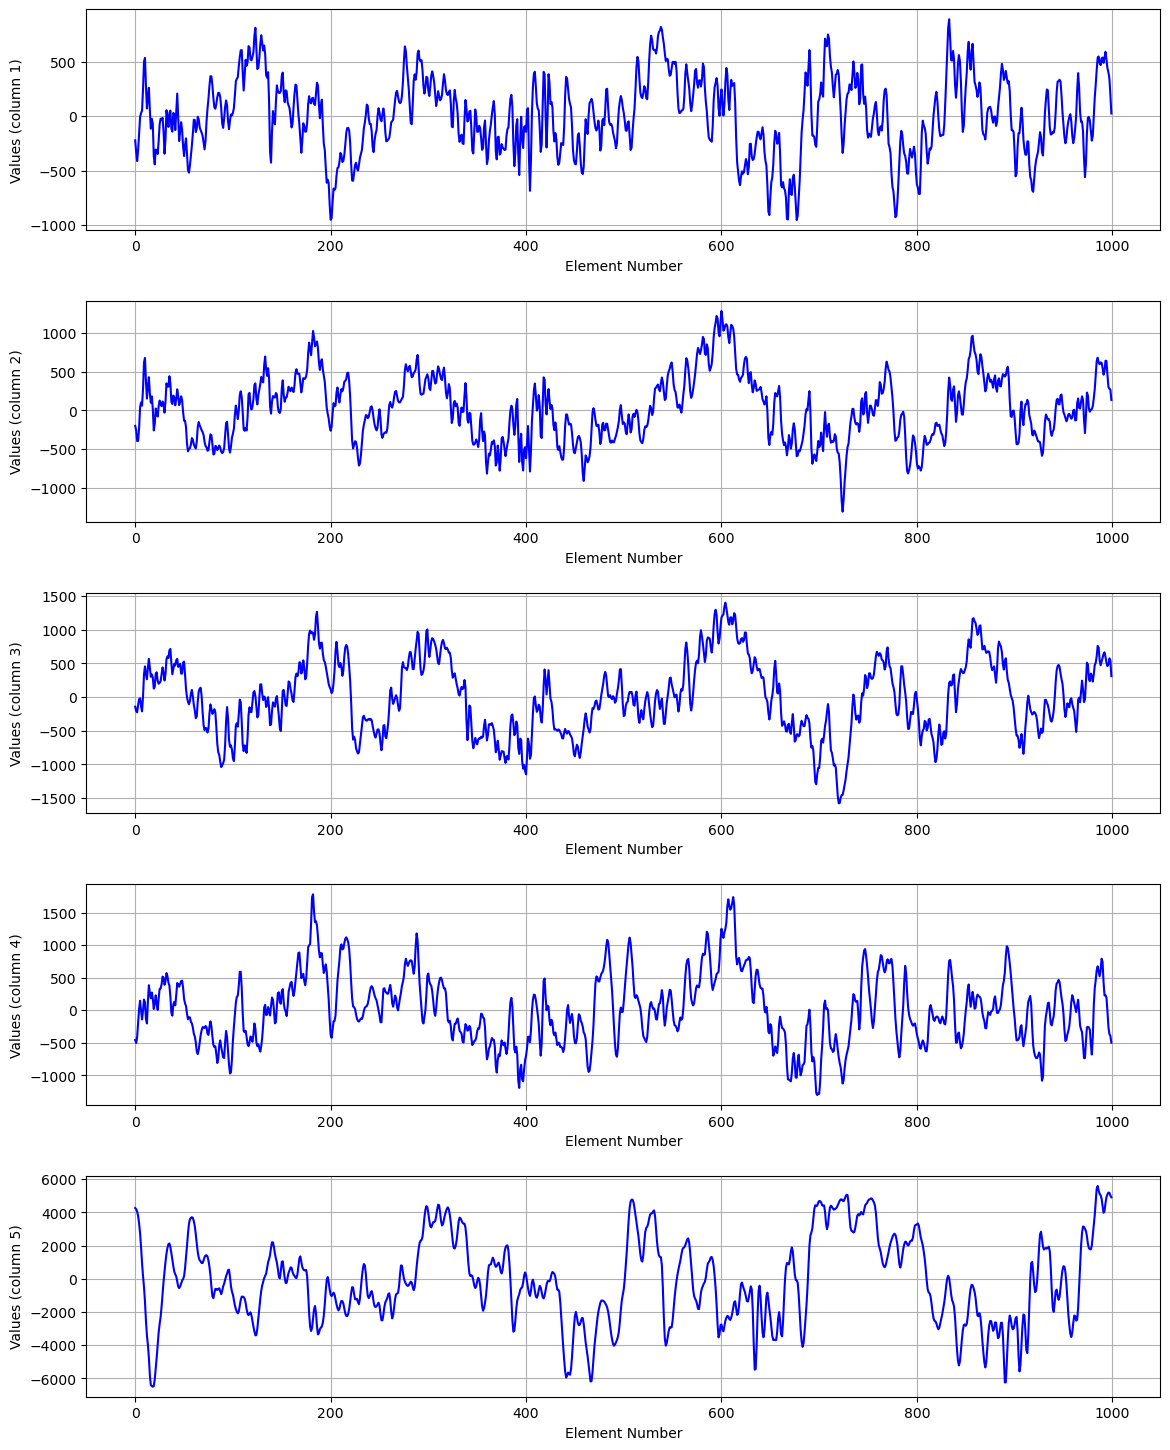

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming your array is called 'data' and has shape (2234545, 5)
# data = ... your array here

# Create figure with 5 subplots vertically stacked
fig, axes = plt.subplots(5, 1, figsize=(12, 15))
fig.tight_layout(pad=3.0)

# Plot each column of data
for i in range(5):
    axes[i].plot(traces[1000000:1001000, i], color='blue')
    axes[i].set_xlabel('Element Number')
    axes[i].set_ylabel(f'Values (column {i+1})')
    axes[i].grid(True)

plt.show()

In [39]:
%env SPECTRAL_CONNECTIVITY_ENABLE_GPU=true

env: SPECTRAL_CONNECTIVITY_ENABLE_GPU=true
ERROR! Session/line number was not unique in database. History logging moved to new session 89


In [111]:
traces = cagemate_collection.lfp_recordings[3].traces
traces = traces[100000:200000,1:]
print(traces.shape)
downsample_rate = 1000
halfbandwidth = 2
timestep = 0.5
timewindow = 1
np.isnan(traces).any()

(100000, 4)


np.False_

In [112]:
multi_t = Multitaper(
        # multitaper takes in a time_series that is time by signals (regions)
        time_series=traces,
        sampling_frequency=downsample_rate,
        time_halfbandwidth_product=halfbandwidth,
        time_window_duration=timewindow,
        time_window_step=timestep,
    )
connectivity = Connectivity.from_multitaper(multi_t)
frequencies = connectivity.frequencies
pdc = connectivity.partial_directed_coherence(keep_cupy=True)
gc = connectivity.pairwise_spectral_granger_prediction()
 
 

Maximum iterations reached. 0 of 199 converged
Maximum iterations reached. 0 of 199 converged
Maximum iterations reached. 192 of 199 converged
Maximum iterations reached. 185 of 199 converged
Maximum iterations reached. 193 of 199 converged
Maximum iterations reached. 183 of 199 converged


In [115]:
pdc.shape

(199, 500, 4, 4)

In [113]:
def plot_directional(recording, traces, gc, pdc, sampling_frequency=1000, time_halfbandwidth_product=2):
    measures = dict(
        pairwise_spectral_granger=np.nanmean(gc, axis = 0),
        partial_directed_coherence=np.nanmean(pdc, axis = 0)
    )

    n_signals = traces.shape[-1]
    signal_ind2, signal_ind1 = np.meshgrid(np.arange(n_signals), np.arange(n_signals))

    fig, axes = plt.subplots(
        n_signals, n_signals, figsize=(n_signals * 3, n_signals * 3), sharex=True
    )
    for ind1, ind2, ax in zip(signal_ind1.ravel(), signal_ind2.ravel(), axes.ravel()):
        for measure_name, measure in measures.items():
            ax.plot(
                test_rec.frequencies,
                measure[:, ind1, ind2],
                label=measure_name,
                linewidth=5,
                alpha=0.8,
            )
        ax.set_title("x{} → x{}".format(ind2 + 1, ind1 + 1), fontsize=15)
        ax.set_ylim((0, np.max([np.nanmax(np.stack(list(measures.values()))), 1.05])))

    axes[0, -1].legend()
    plt.tight_layout()

    fig, axes = plt.subplots(1, 1, figsize=(3, 3), sharex=True, sharey=True)
    axes.plot(test_rec.frequencies, np.nanmean(test_rec.power, axis = 0))
    plt.title("Power")

/scratch/local/58764897/ipykernel_404963/3121200476.py:3: RuntimeWarning: Mean of empty slice
  pairwise_spectral_granger=np.nanmean(gc, axis = 0),


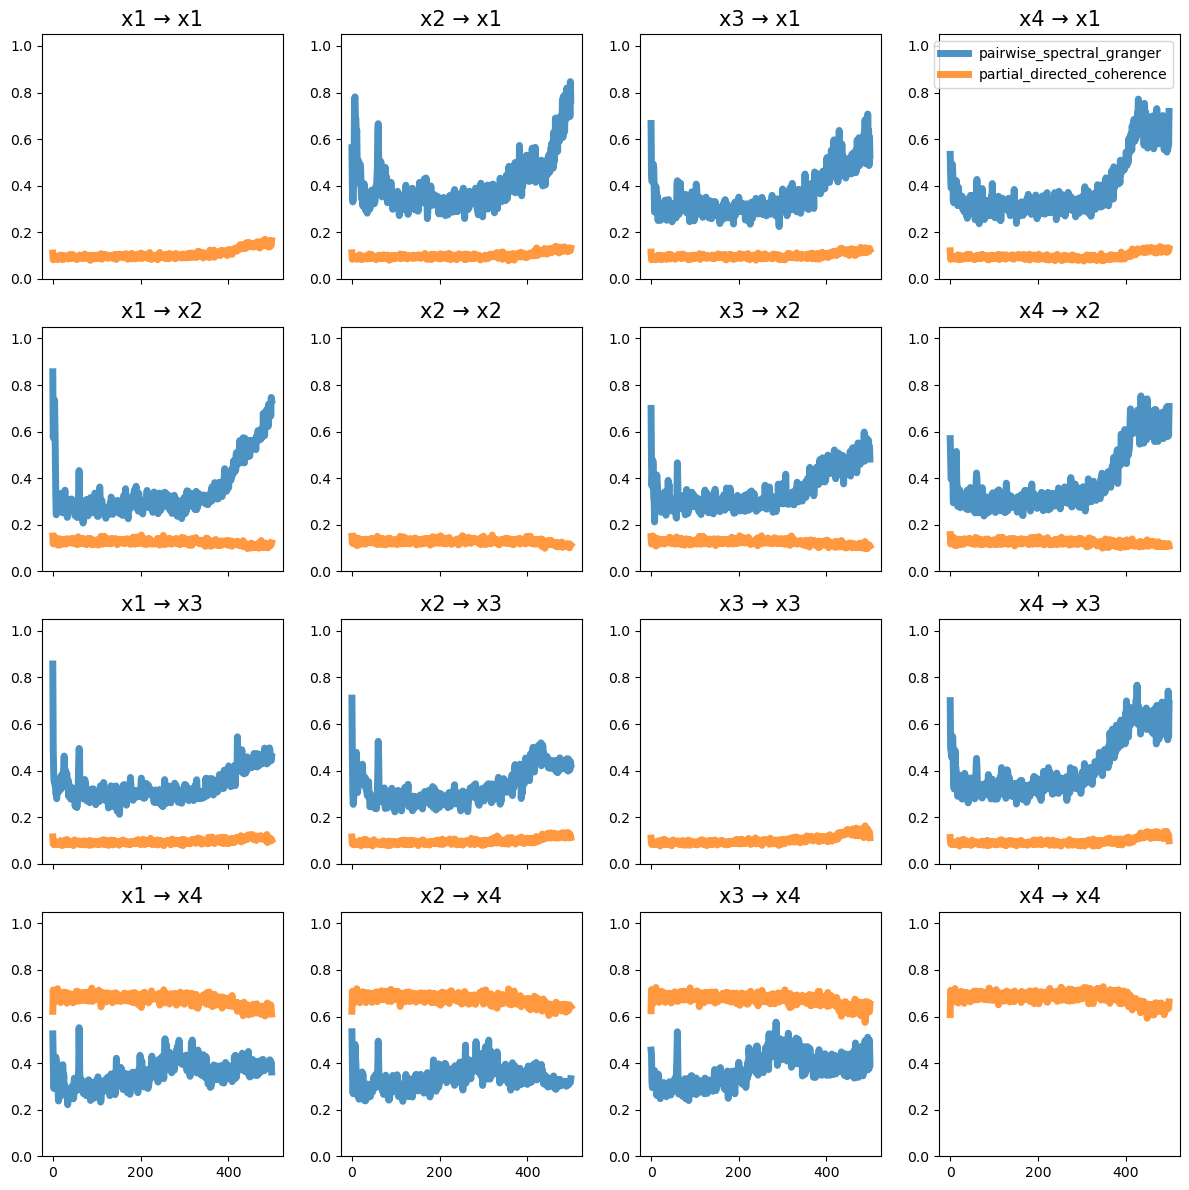

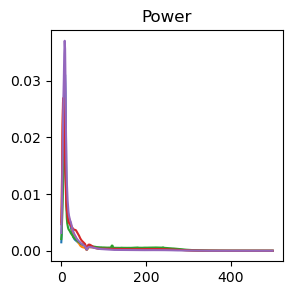

In [114]:

plot_directional(test_rec, traces, gc, pdc)

### COHERENCE AND POWER PLOTTING 

/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/Analysis.py:156: RuntimeWarning: Mean of empty slice
  event_average = np.nanmean(event_snippet, axis=0)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/Analysis.py:214: RuntimeWarning: Mean of empty slice
  event_average = np.nanmean(averages, axis=0)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/Analysis.py:217: SmallSampleWarning: After omitting NaNs, one or more axis-slices of one or more sample arguments is too small; corresponding elements of returned arrays will be NaN. See documentation for sample size requirements.
  event_sem = stats.sem(averages, axis=0, nan_policy="omit")


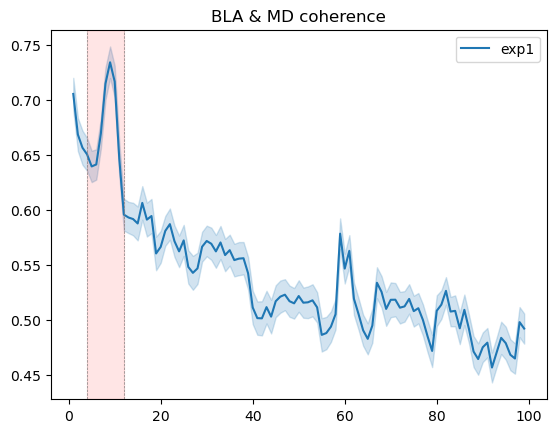

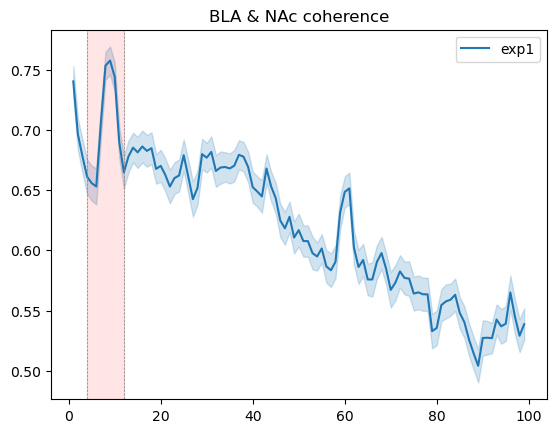

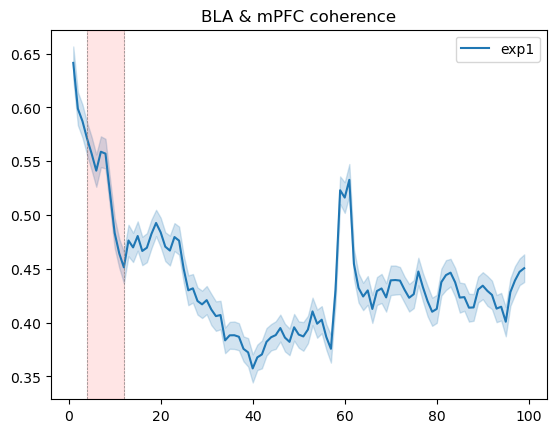

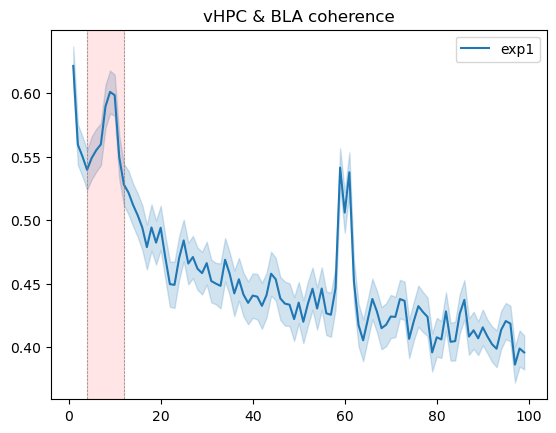

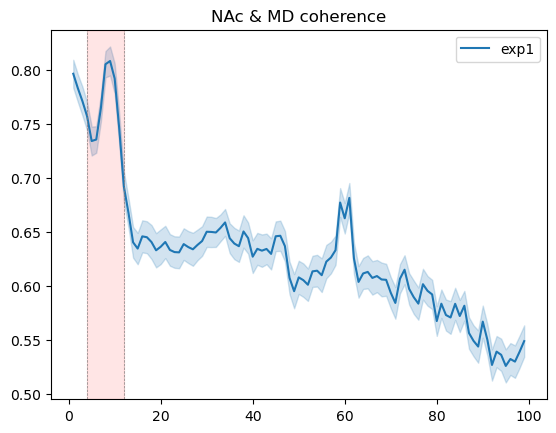

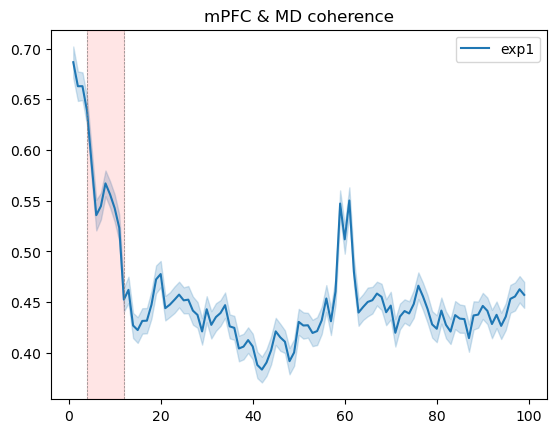

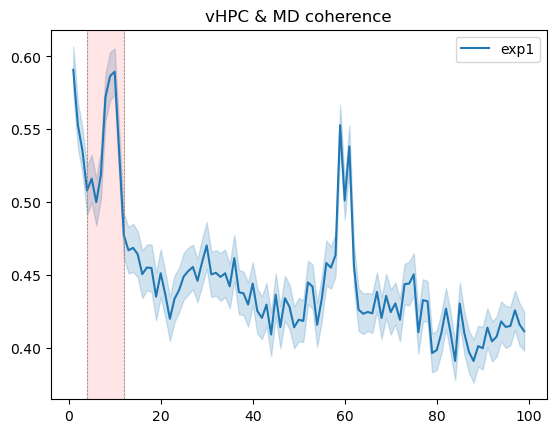

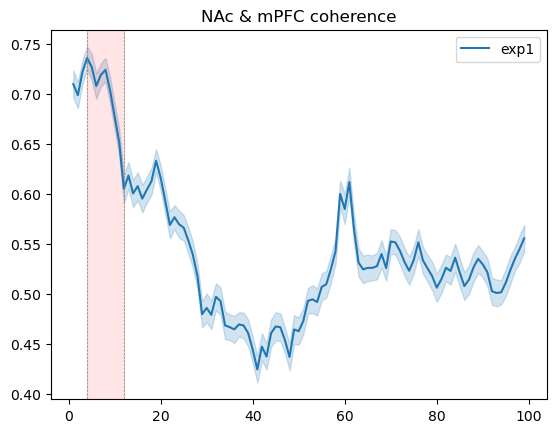

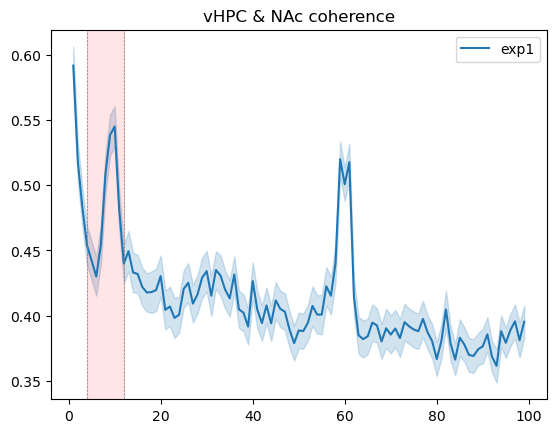

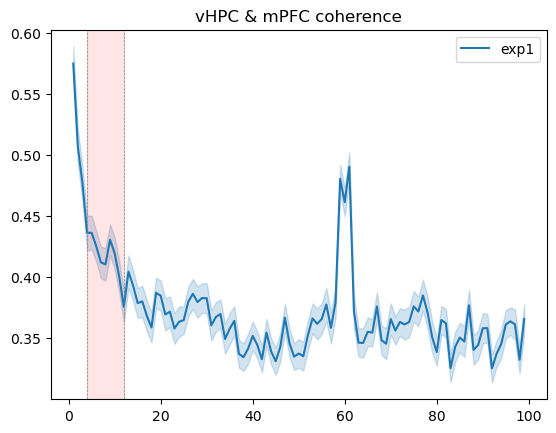

In [82]:
cagemate_averages = cagemate_analysis.average_events(events = ['exp1'], mode = 'coherence', plot = True)

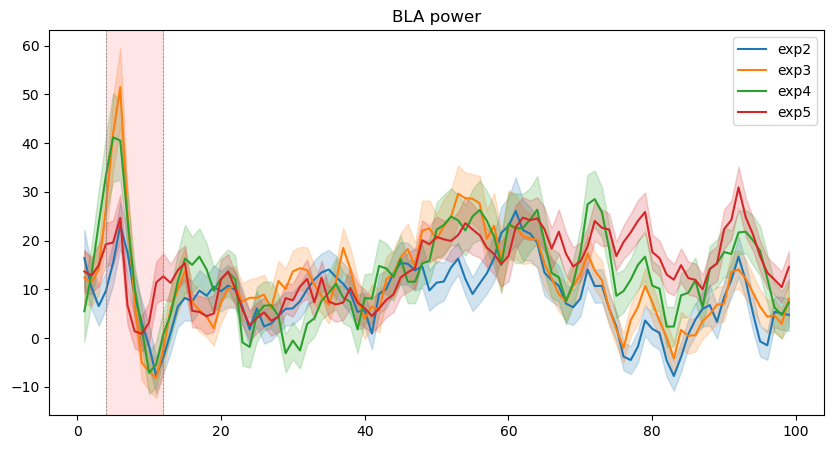

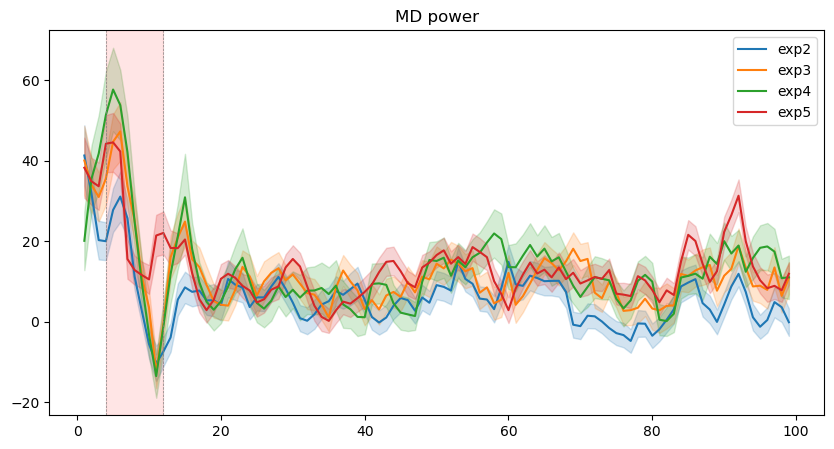

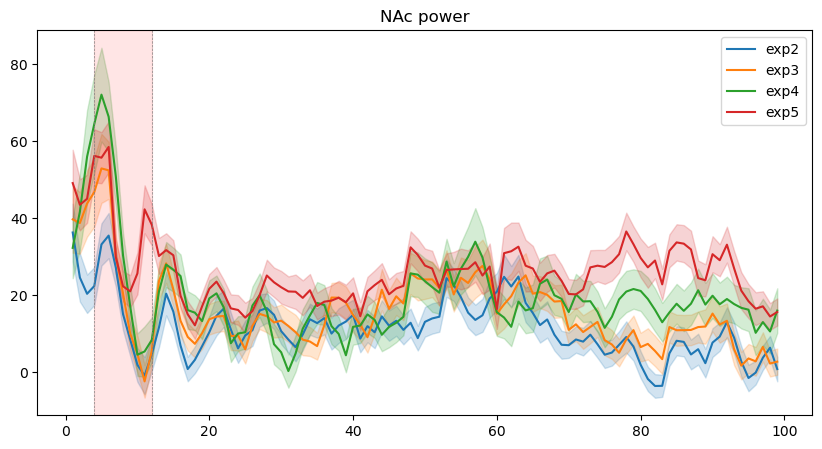

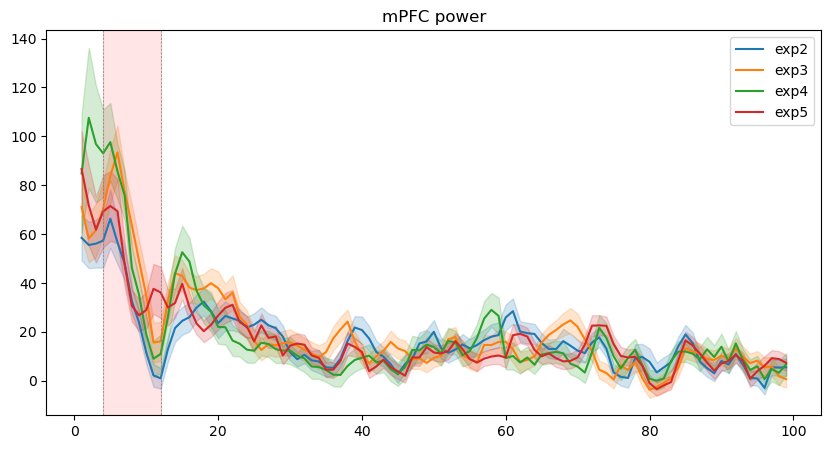

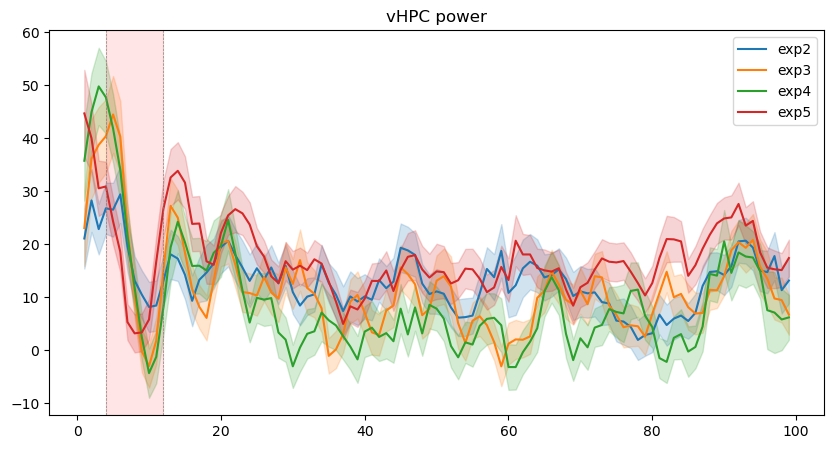

In [12]:
novel_averages = novel_analysis.average_events(events = ['exp2', 'exp3', 'exp4', 'exp5'], baseline = 'exp1', mode = 'power', plot = True)

c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\Analysis.py:156: RuntimeWarning: Mean of empty slice
  event_average = np.nanmean(event_snippet, axis=0)
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\Analysis.py:214: RuntimeWarning: Mean of empty slice
  event_average = np.nanmean(averages, axis=0)
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\Analysis.py:217: SmallSampleWarning: After omitting NaNs, one or more axis-slices of one or more sample arguments is too small; corresponding elements of returned arrays will be NaN. See documentation for sample size requirements.
  event_sem = stats.sem(averages, axis=0, nan_policy="omit")


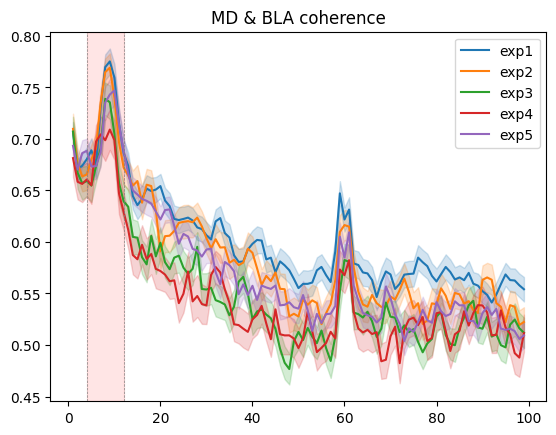

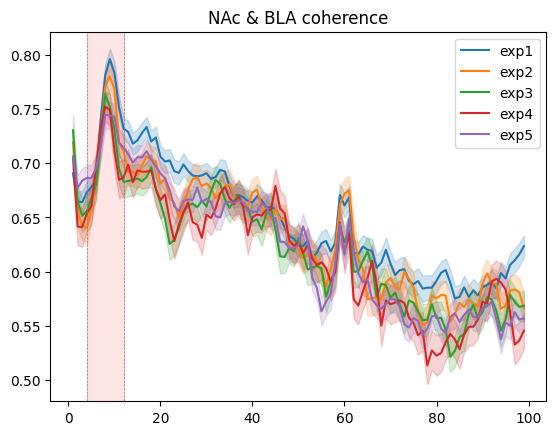

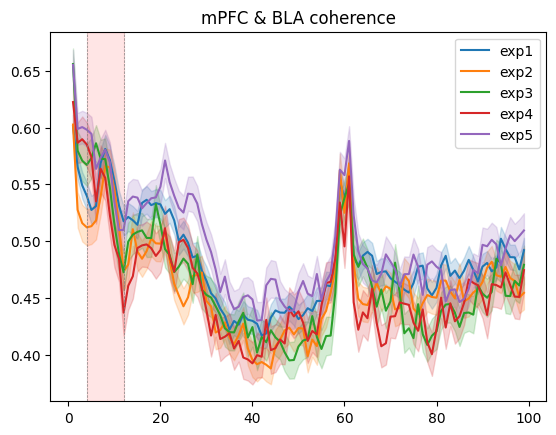

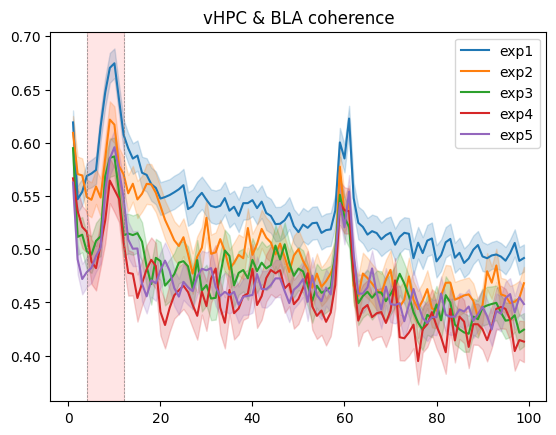

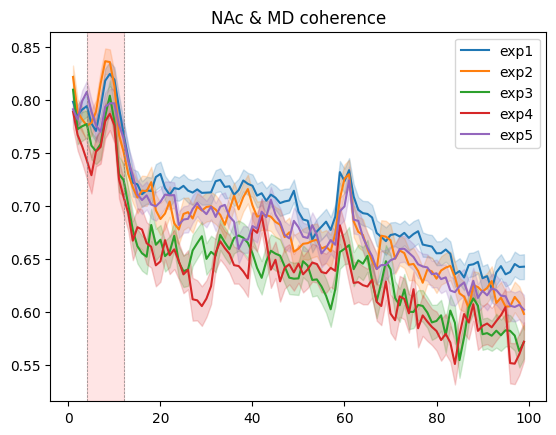

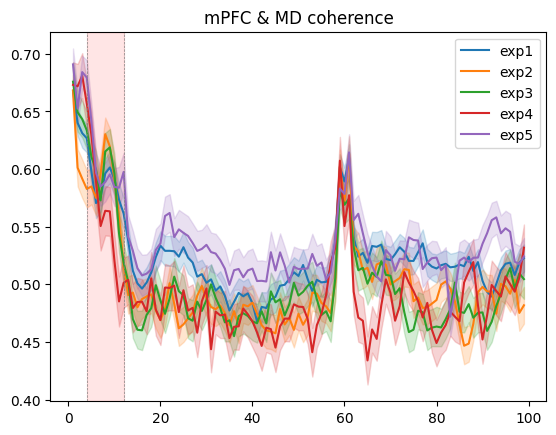

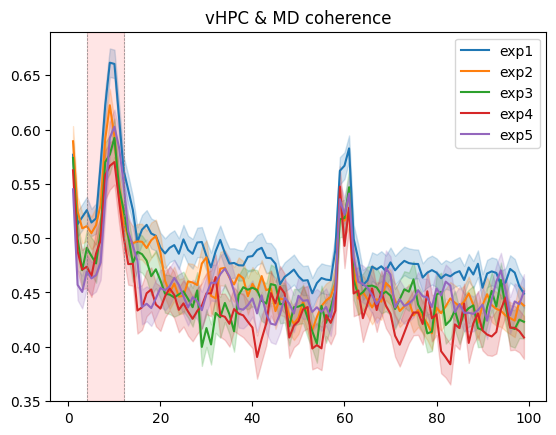

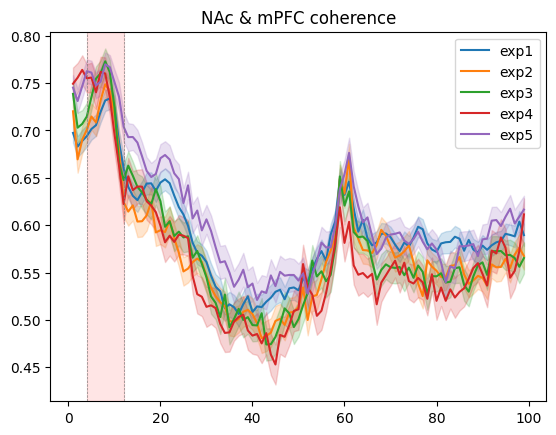

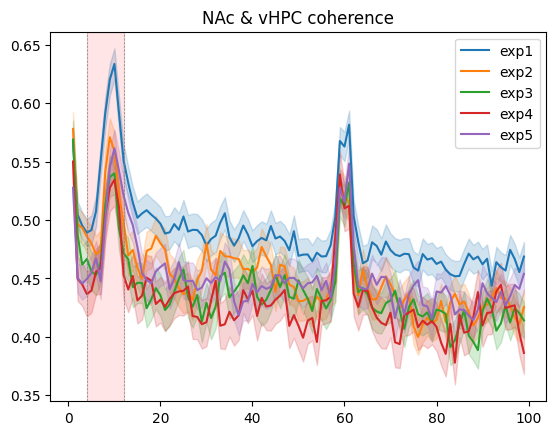

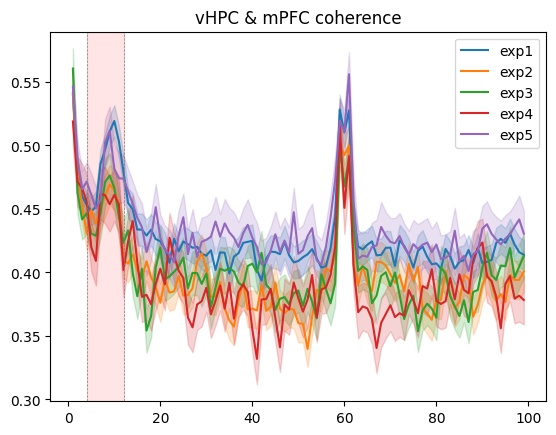

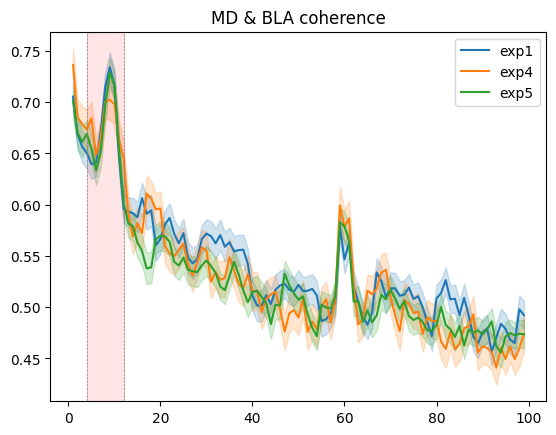

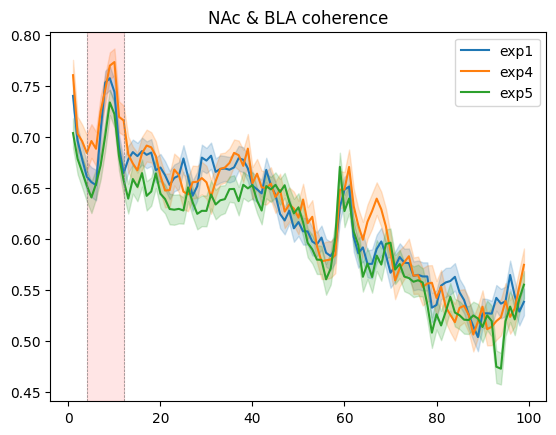

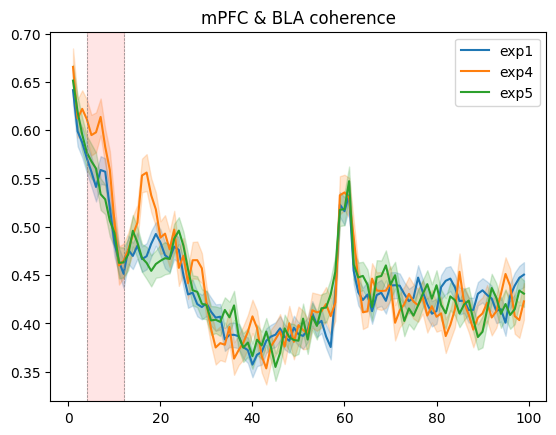

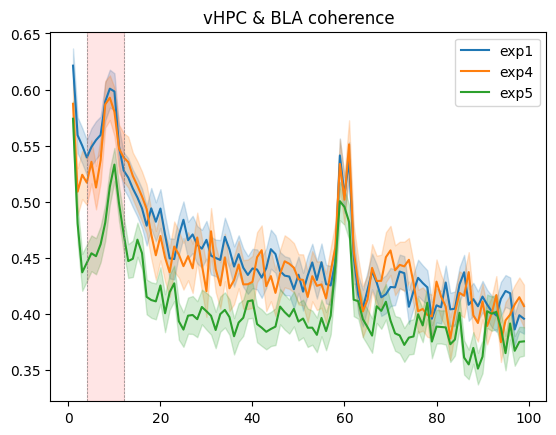

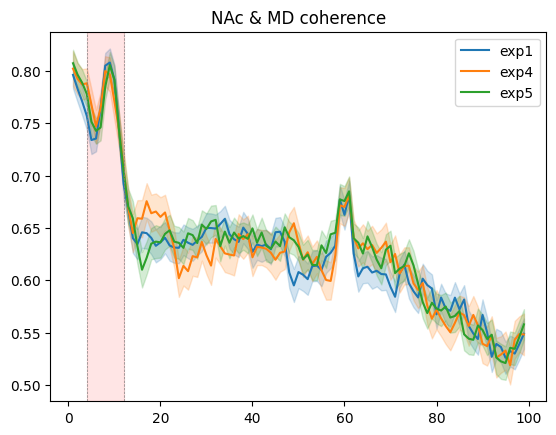

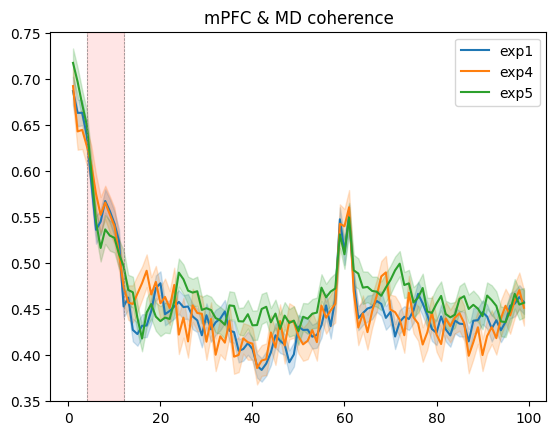

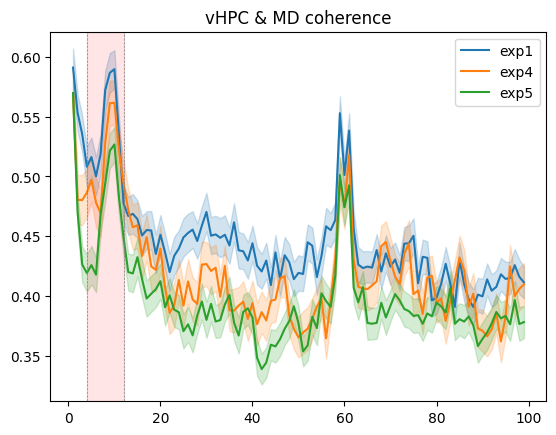

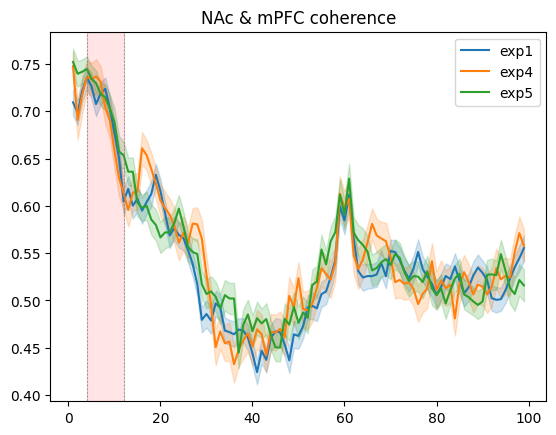

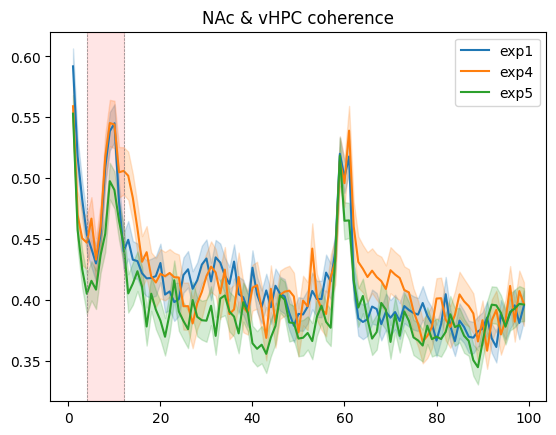

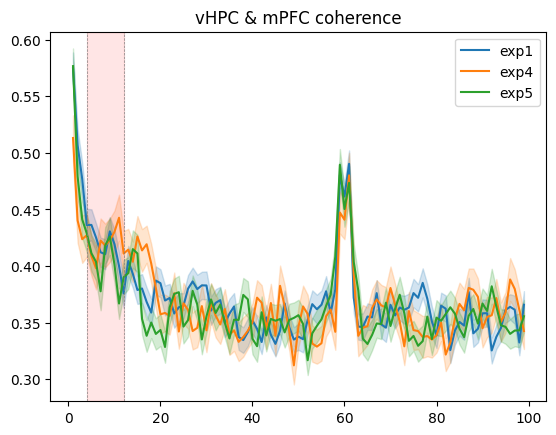

In [97]:
novel_coherence = novel_analysis.average_events(events = ['exp1', 'exp2', 'exp3','exp4', 'exp5'], mode = 'coherence', plot = True)
cagemate_coherence = cagemate_analysis.average_events(events = ['exp1', 'exp4', 'exp5'], mode = 'coherence', plot = True)

### GRANGER HEATMAPS

All set to analyze


c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\Analysis.py:156: RuntimeWarning: Mean of empty slice
  event_average = np.nanmean(event_snippet, axis=0)
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\Analysis.py:302: RuntimeWarning: Mean of empty slice
  avg_granger = np.nanmean(event_granger, axis=0)
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\Analysis.py:304: RuntimeWarning: Mean of empty slice
  avg_freq = np.nanmean(freq_granger, axis=0)
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\Analysis.py:302: RuntimeWarning: Mean of empty slice
  avg_granger = np.nanmean(event_granger, axis=0)
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\Analysis.py:304: RuntimeWarning: Mean of empty slice
  avg_freq = np.nanmean(freq_granger, axis=0)
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\Analysis.py:302: Runtim

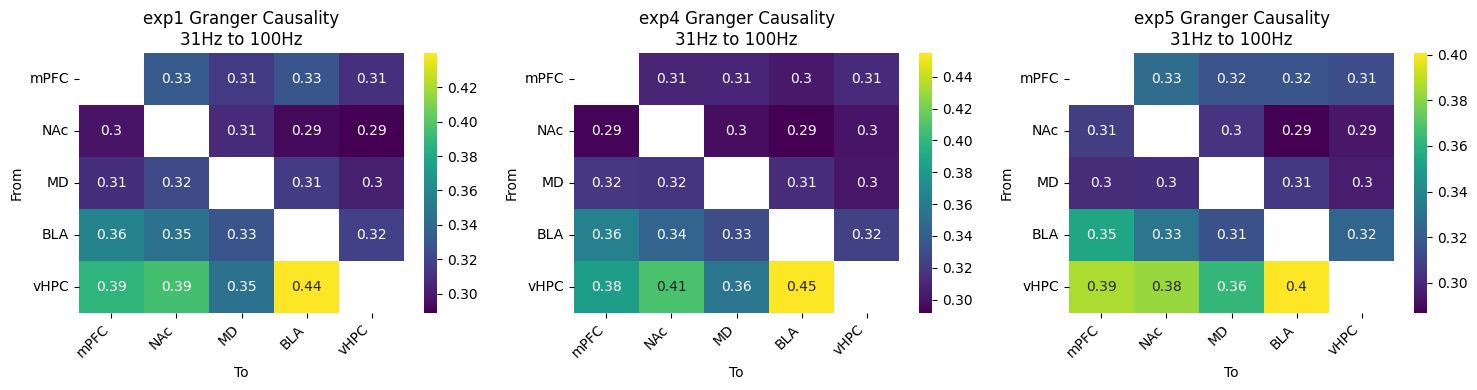

All set to analyze


c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\Analysis.py:156: RuntimeWarning: Mean of empty slice
  event_average = np.nanmean(event_snippet, axis=0)
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\Analysis.py:302: RuntimeWarning: Mean of empty slice
  avg_granger = np.nanmean(event_granger, axis=0)
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\Analysis.py:304: RuntimeWarning: Mean of empty slice
  avg_freq = np.nanmean(freq_granger, axis=0)
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\Analysis.py:302: RuntimeWarning: Mean of empty slice
  avg_granger = np.nanmean(event_granger, axis=0)
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\Analysis.py:304: RuntimeWarning: Mean of empty slice
  avg_freq = np.nanmean(freq_granger, axis=0)
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\Analysis.py:302: Runtim

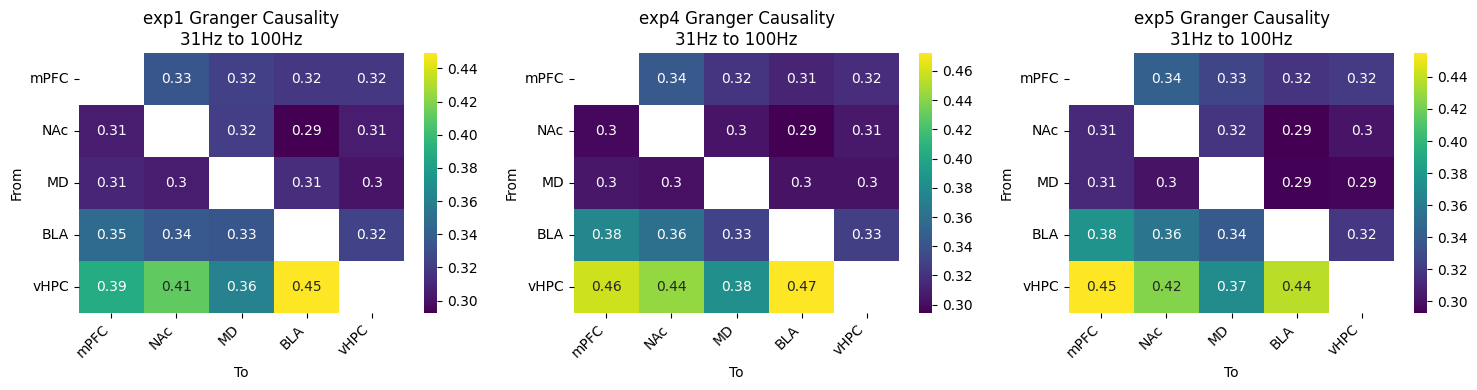

In [141]:
importlib.reload(LFP_analysis)
cagemate_analysis = LFP_analysis.LFPAnalysis(cagemate_collection.lfp_recordings)
cagemate_analysis.plot_granger_heatmap(events, freq = [31,100])
novel_analysis = LFP_analysis.LFPAnalysis(novel_collection.lfp_recordings)
novel_analysis.plot_granger_heatmap(events, freq = [31,100])


In [72]:
cagemate_analysis.coherence_pairs_dict

bidict({frozenset({'MD', 'BLA'}): (2, 3), frozenset({'NAc', 'BLA'}): (1, 3), frozenset({'mPFC', 'BLA'}): (0, 3), frozenset({'vHPC', 'BLA'}): (4, 3), frozenset({'NAc', 'MD'}): (1, 2), frozenset({'mPFC', 'MD'}): (0, 2), frozenset({'vHPC', 'MD'}): (4, 2), frozenset({'NAc', 'mPFC'}): (1, 0), frozenset({'NAc', 'vHPC'}): (1, 4), frozenset({'vHPC', 'mPFC'}): (4, 0)})

In [79]:
cagemate_analysis.coherence_pairs_dict[frozenset({'mPFC', 'BLA'})]

(0, 3)

### ACROSS RECORDING COHERENCE PLOTTING

/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/Analysis.py:156: RuntimeWarning: Mean of empty slice
  event_average = np.nanmean(event_snippet, axis=0)
/scratch/local/58692543/ipykernel_279301/2349936463.py:25: RuntimeWarning: Mean of empty slice
  event_average = np.nanmean(event_array[:, freq_range[0]:freq_range[1], pair_index[0], pair_index[1] ], axis=1)


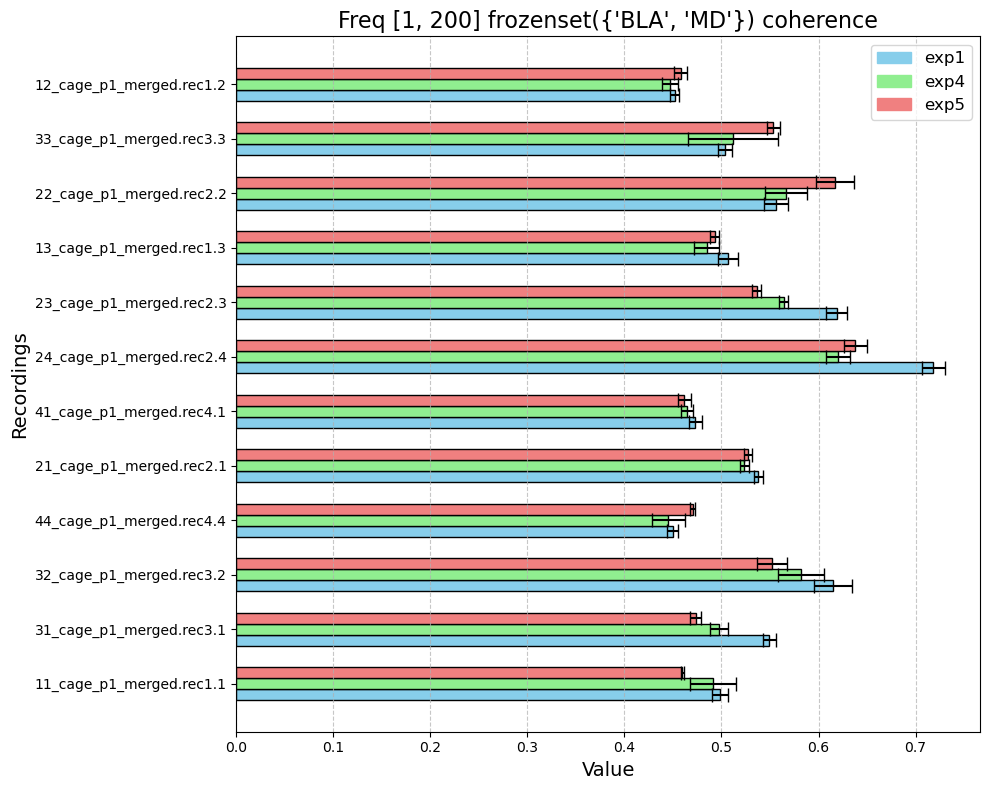

In [90]:
from scipy import stats
import matplotlib.pyplot as plt
event_averages = []
event_sems = []
recordings = []
from matplotlib.patches import Patch 
# Define the events
events = ['exp1', 'exp4', 'exp5']
coherence_pair = frozenset({'MD', 'BLA'})
pair_index = cagemate_analysis.coherence_pairs_dict[coherence_pair]
freq_range = [1, 200]

# Loop through each recording and each event
for recording in cagemate_analysis.collection:
    rec_info = recording.name + recording.subject
    recordings.append(rec_info)
    for event in events:
        event_average = cagemate_analysis.__get_event_averages__(recording,
                                                             event=event,
                                                             mode='coherence',
                                                             event_len=None,
                                                             pre_window=0,
                                                             post_window=0)
        event_array = np.array(event_average)
        event_average = np.nanmean(event_array[:, freq_range[0]:freq_range[1], pair_index[0], pair_index[1] ], axis=1)
        event_mean = np.nanmean(np.array(event_average[:]), axis=0)
        event_sem = stats.sem(np.array(event_average), axis=0, nan_policy='omit')
        event_averages.append(event_mean)
        event_sems.append(event_sem)

# Define the number of bars and their positions
num_recordings = len(cagemate_analysis.collection)
num_events = len(events)
bar_width = 0.2
x = np.arange(num_recordings)

# Define colors for each event
colors = ['skyblue', 'lightgreen', 'lightcoral']
color_map = {events[i]: colors[i] for i in range(num_events)}

# Create the bar plot
plt.figure(figsize=(10, 8))

# Plot each bar with appropriate color and error bars
for i, recording in enumerate(recordings):
    for j, event in enumerate(events):
        idx = i * num_events + j
        plt.barh(x[i] + j * bar_width, event_averages[idx], xerr=event_sems[idx], 
                 capsize=5, color=color_map[event], edgecolor='black', height=bar_width,
                 label=event if i == 0 else '')

# Add labels and title
plt.ylabel('Recordings', fontsize=14)
plt.xlabel('Value', fontsize=14)
plt.title(f'Freq {freq_range} {coherence_pair} coherence', fontsize=16)

# Set custom y-ticks
ytick_positions = x + bar_width
plt.yticks(ytick_positions, recordings)

# Add a legend
handles = [Patch(color=color, label=event) for event, color in color_map.items()]
plt.legend(handles=handles, fontsize=12)

# Customize the plot (optional)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [50]:
cagemate_analysis.brain_region_dict

bidict({'BLA': 3, 'MD': 2, 'NAc': 1, 'mPFC': 0, 'vHPC': 4})

In [31]:
len(cagemate_analysis.brain_region_dict.keys())

5

In [43]:
brain_regions = np.empty(5, dtype='<U10')

brain_regions[0] = 'mPFC'
brain_regions

array(['mPFC', '', '', '', ''], dtype='<U10')

In [107]:
cagemate_collection.brain_region_dict = cagemate_collection.lfp_recordings[0].brain_region_dict
cagemate_collection.frequencies = cagemate_collection.lfp_recordings[0].frequencies

In [117]:
novel_collection.brain_region_dict = novel_collection.lfp_recordings[0].brain_region_dict
novel_collection.frequencies = novel_collection.lfp_recordings[0].frequencies

All set to analyze


c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\LFP_analysis.py:126: RuntimeWarning: Mean of empty slice
  event_average = np.nanmean(event_snippet, axis=0)
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\LFP_analysis.py:382: RuntimeWarning: Mean of empty slice
  # calculations = [trials, frequencies, brain regions]
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\LFP_analysis.py:383: RuntimeWarning: Mean of empty slice
  delta = np.nanmean(calculations[:, 0:4, ...], axis=1)
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\LFP_analysis.py:385: RuntimeWarning: Mean of empty slice
  theta = np.nanmean(calculations[:, 4:13, ...], axis=1)
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\LFP_analysis.py:387: RuntimeWarning: Mean of empty slice
  beta = np.nanmean(calculations[:, 13:31, ...], axis=1)
c:\Users\megha\Documents\GitHub\diff_fam_social

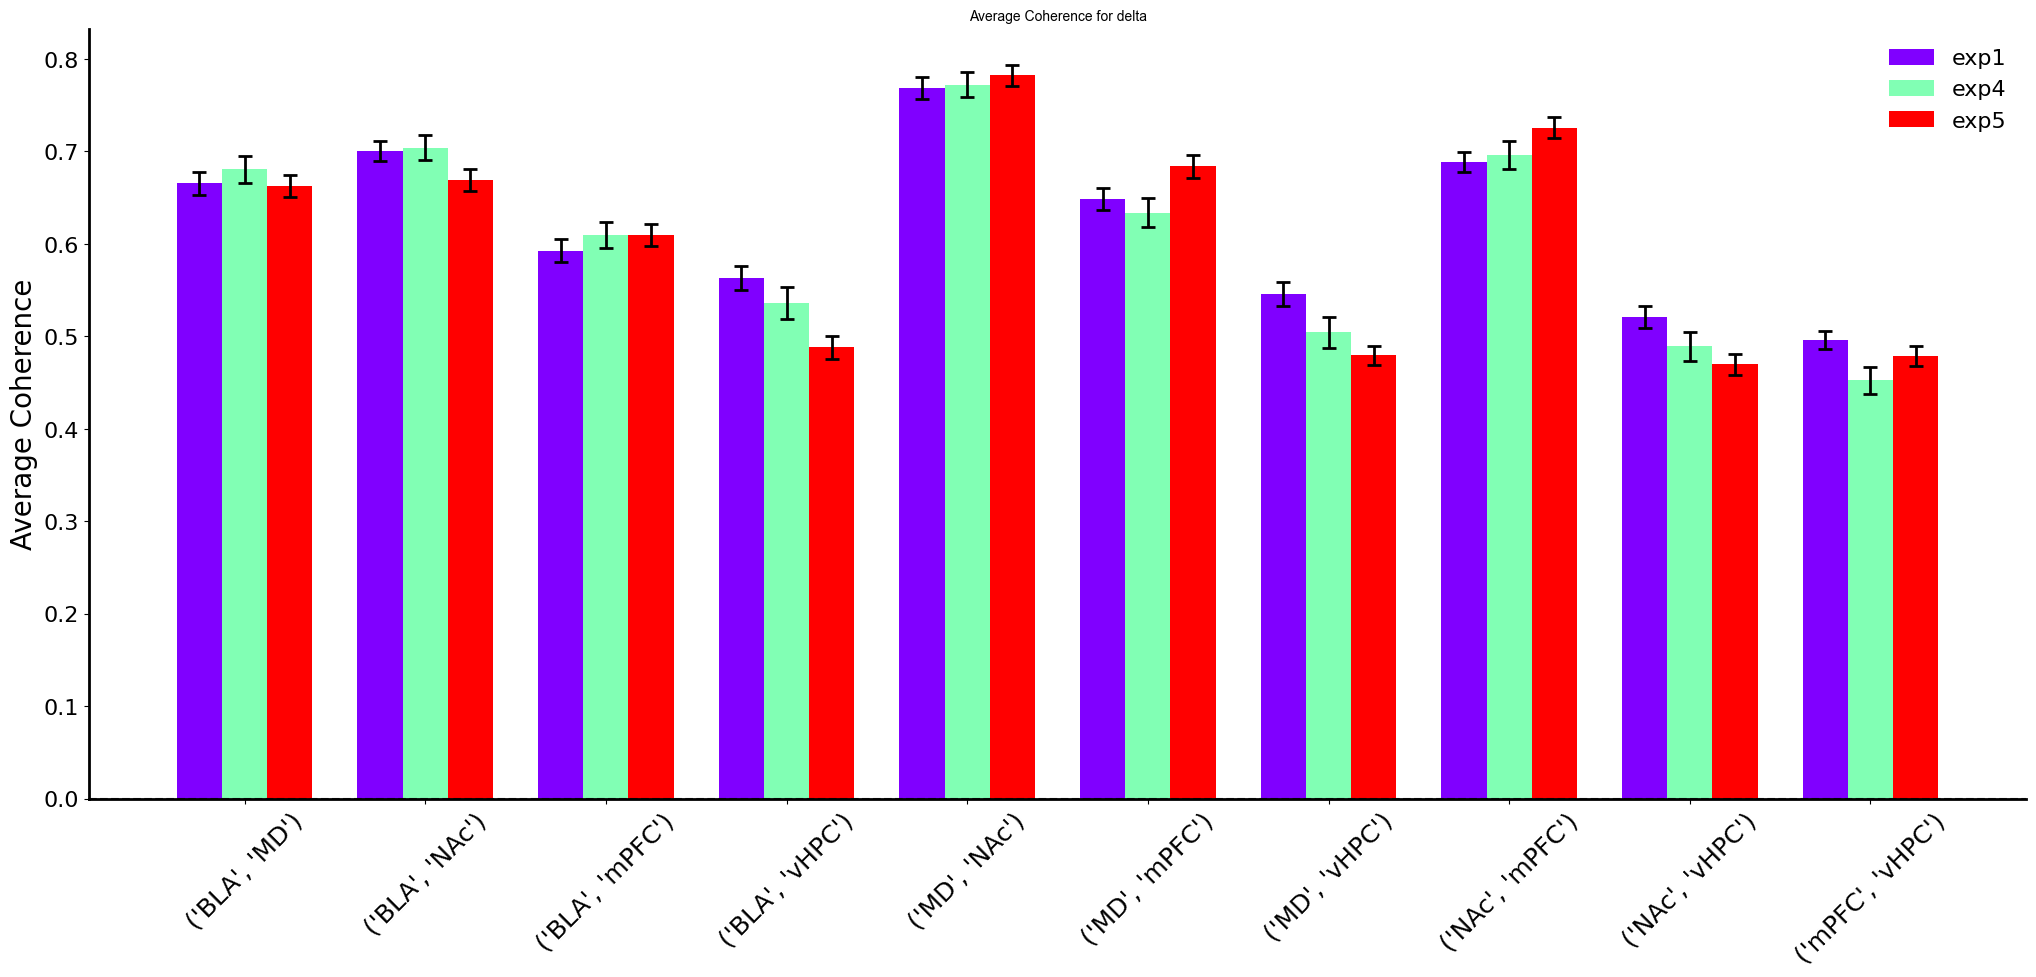

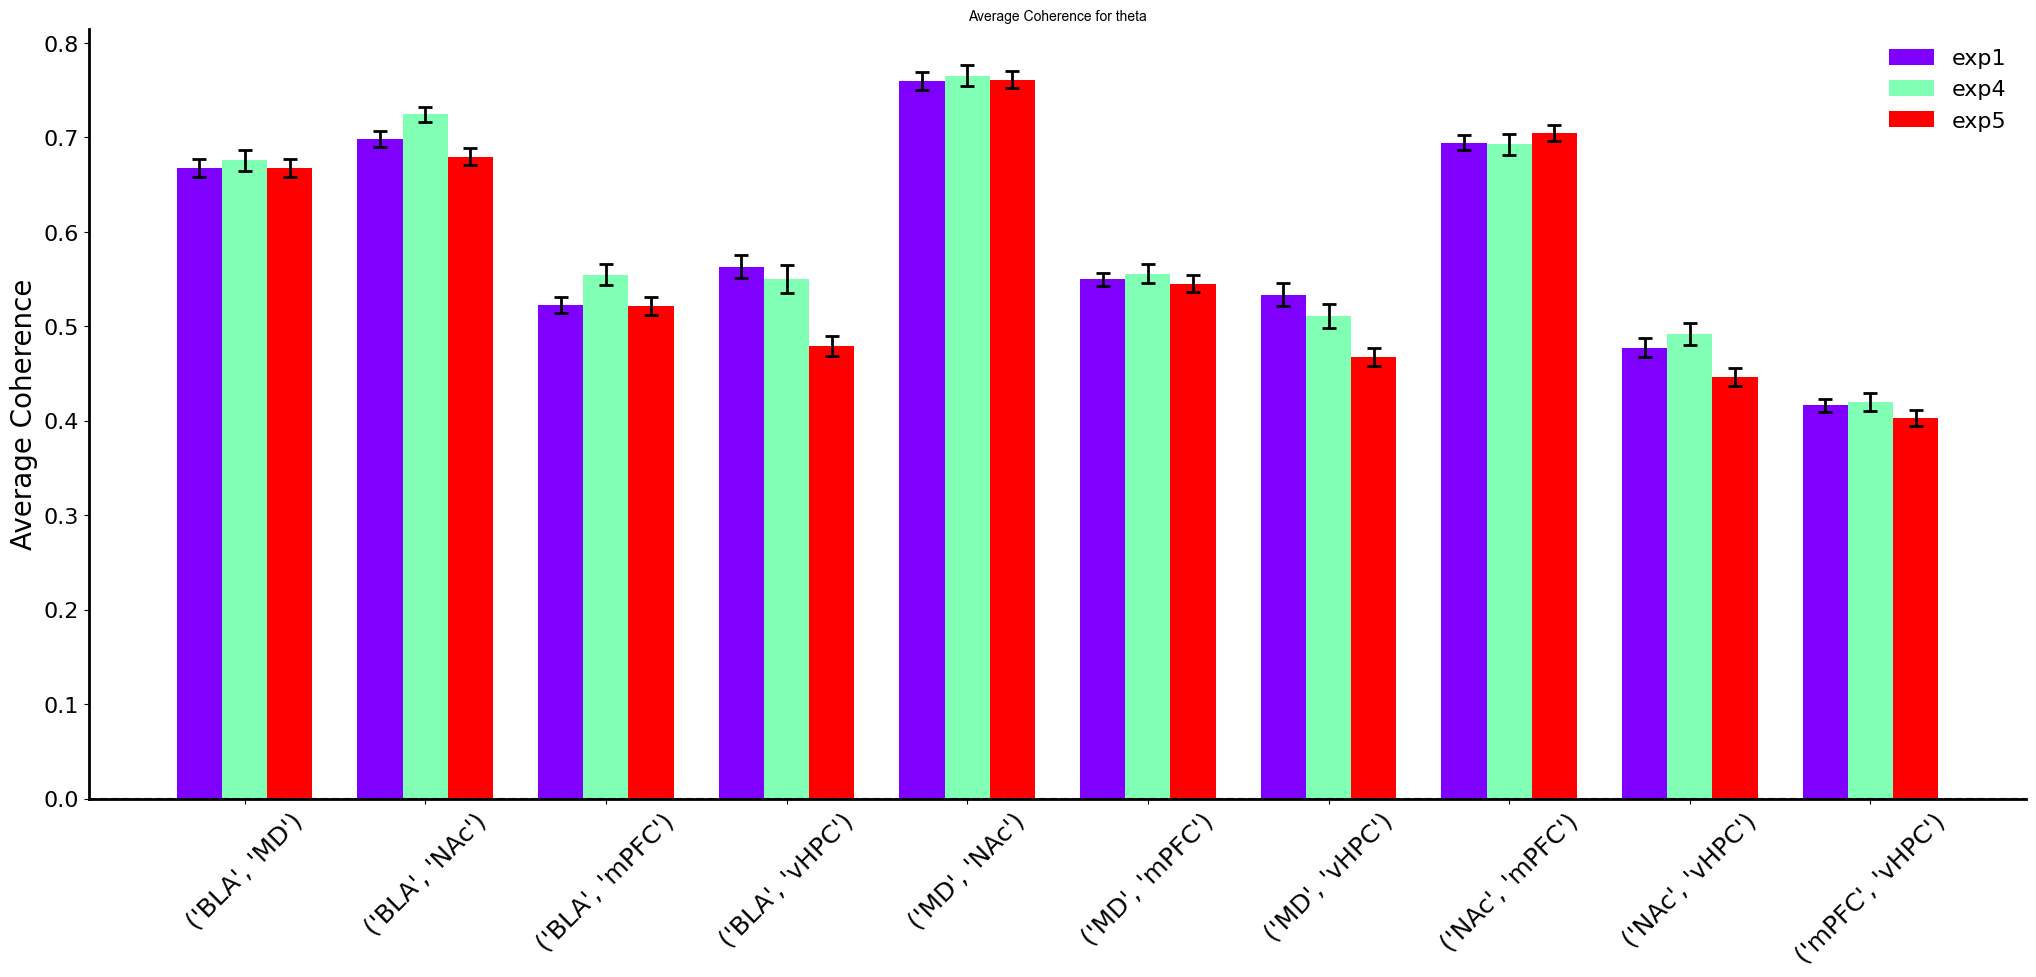

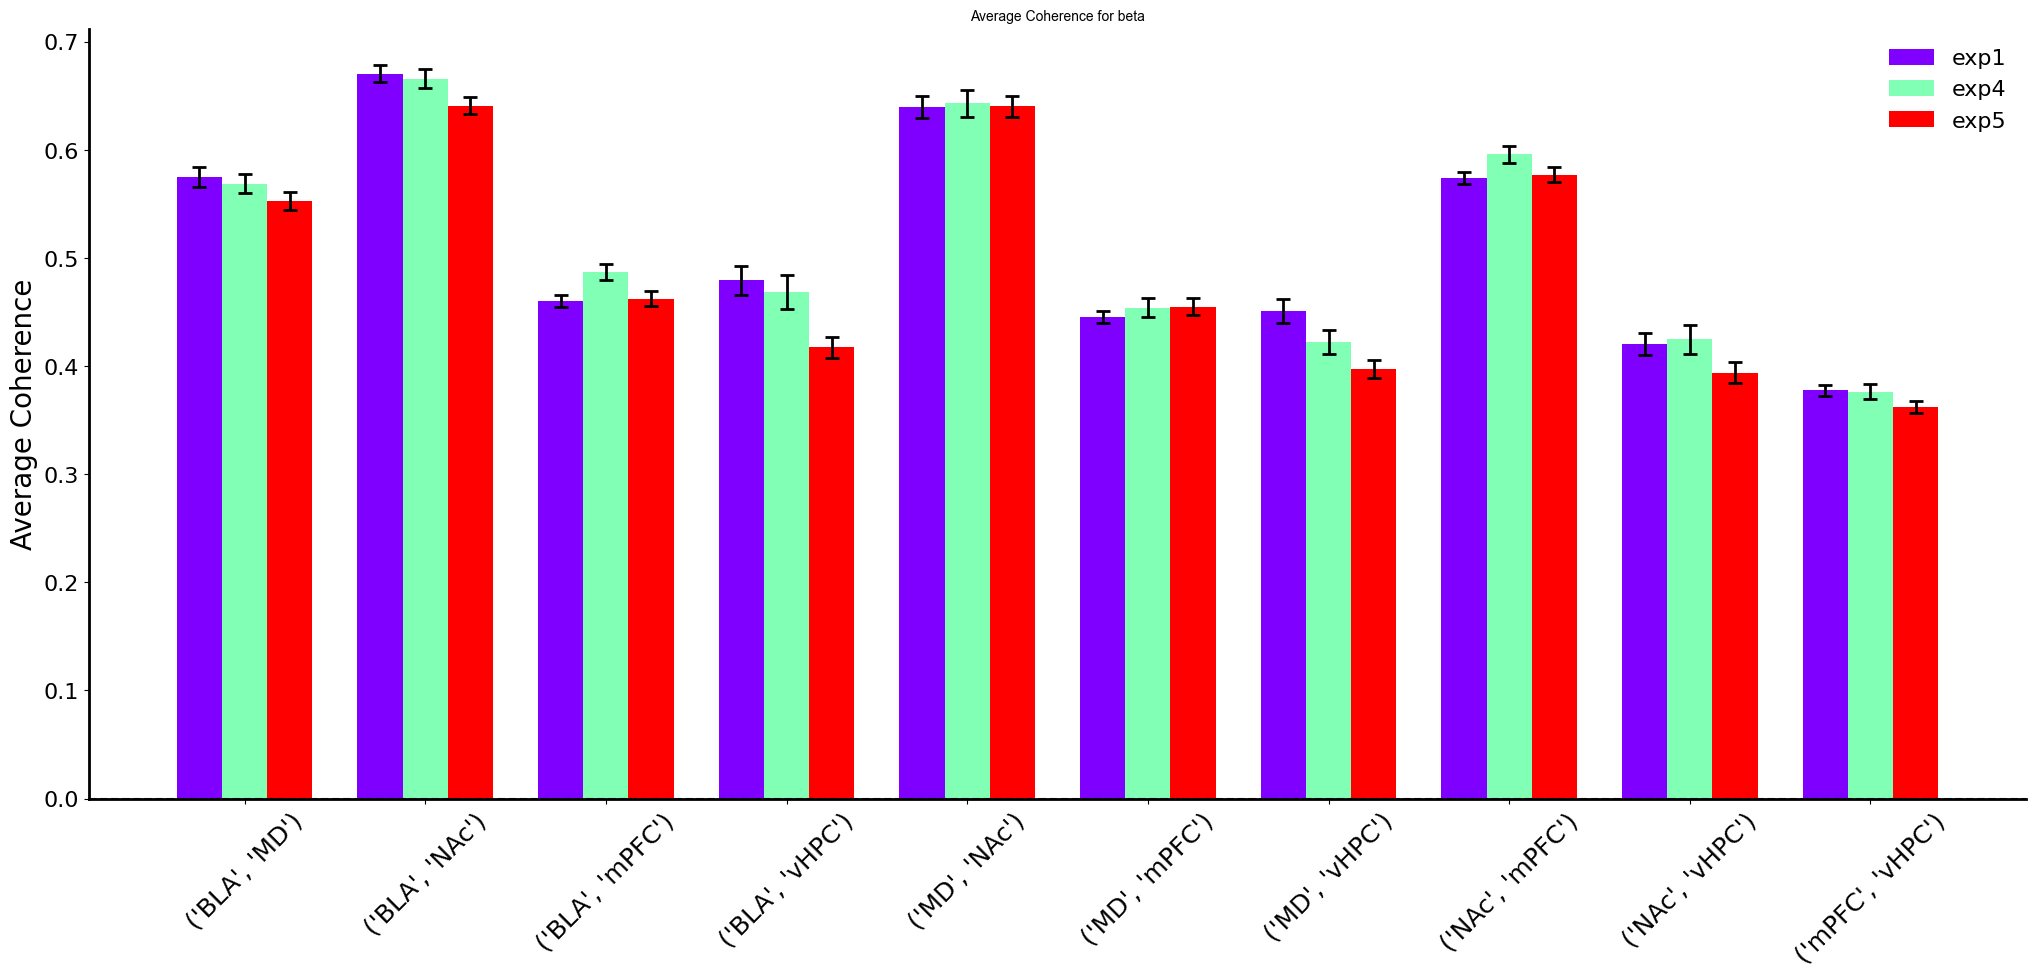

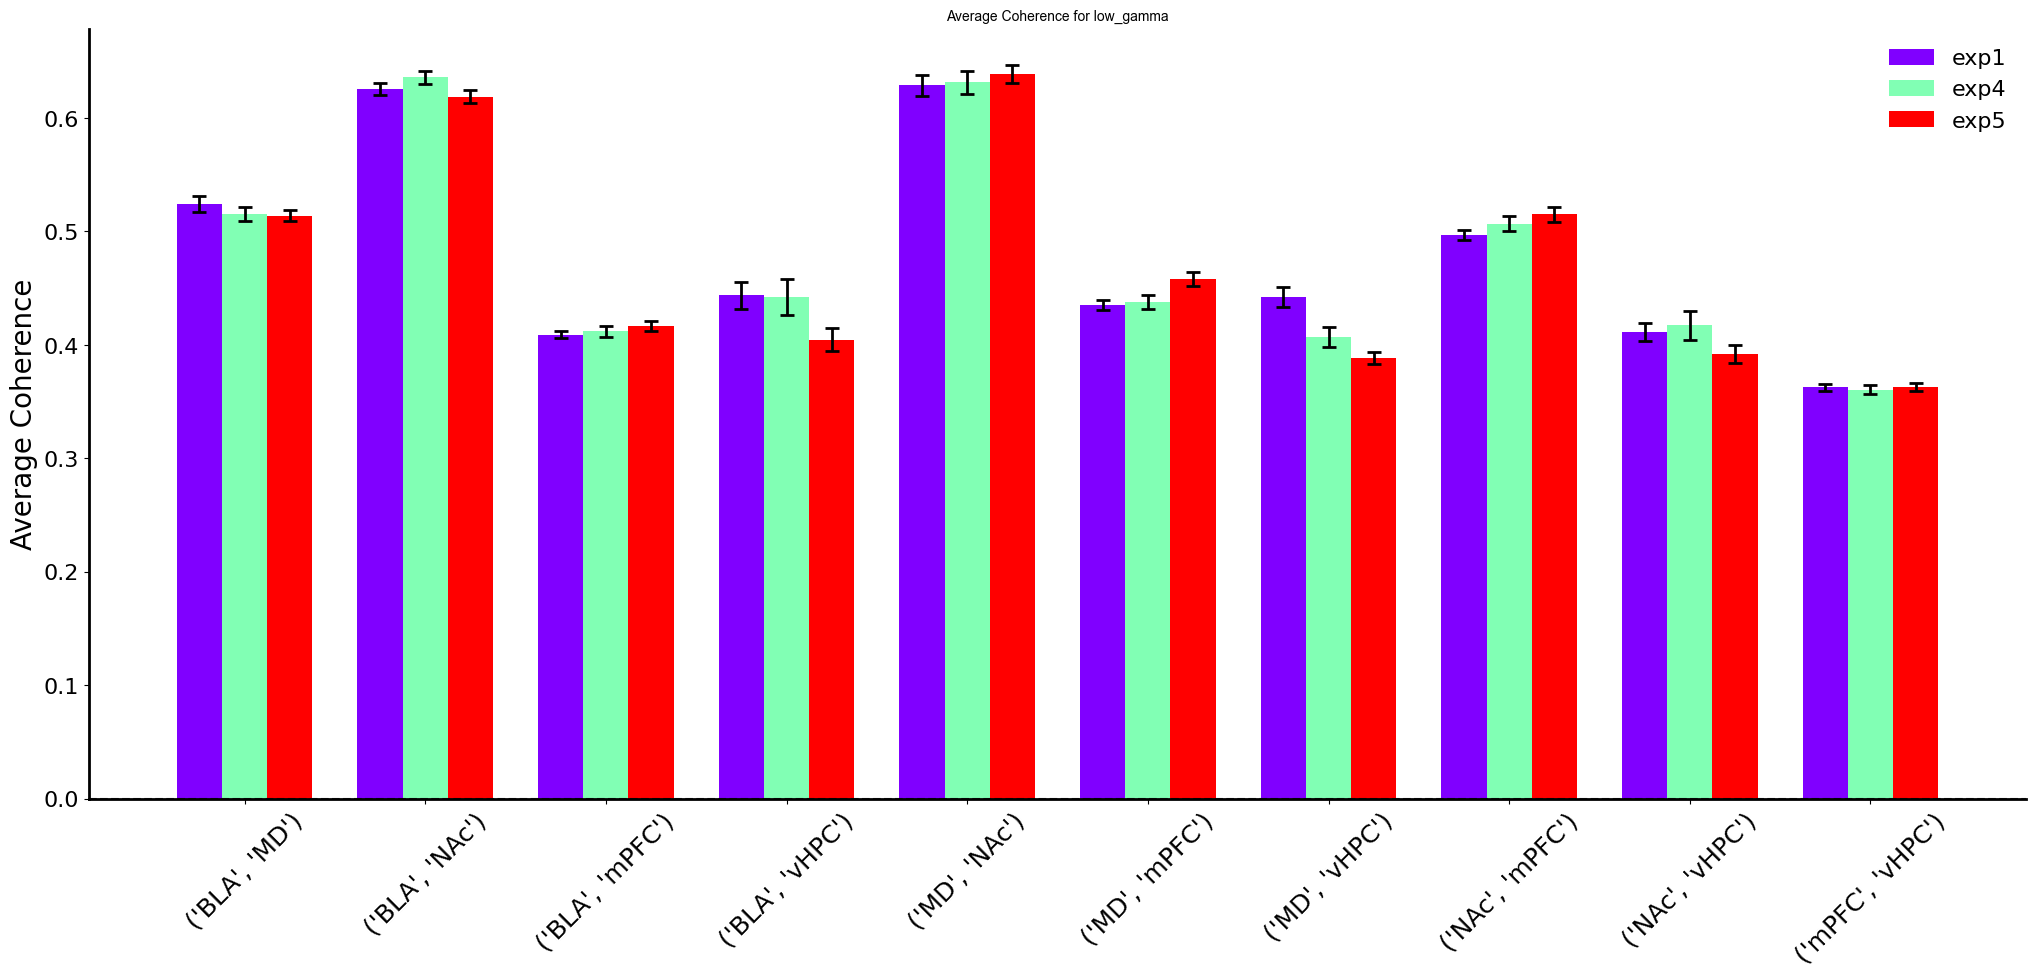

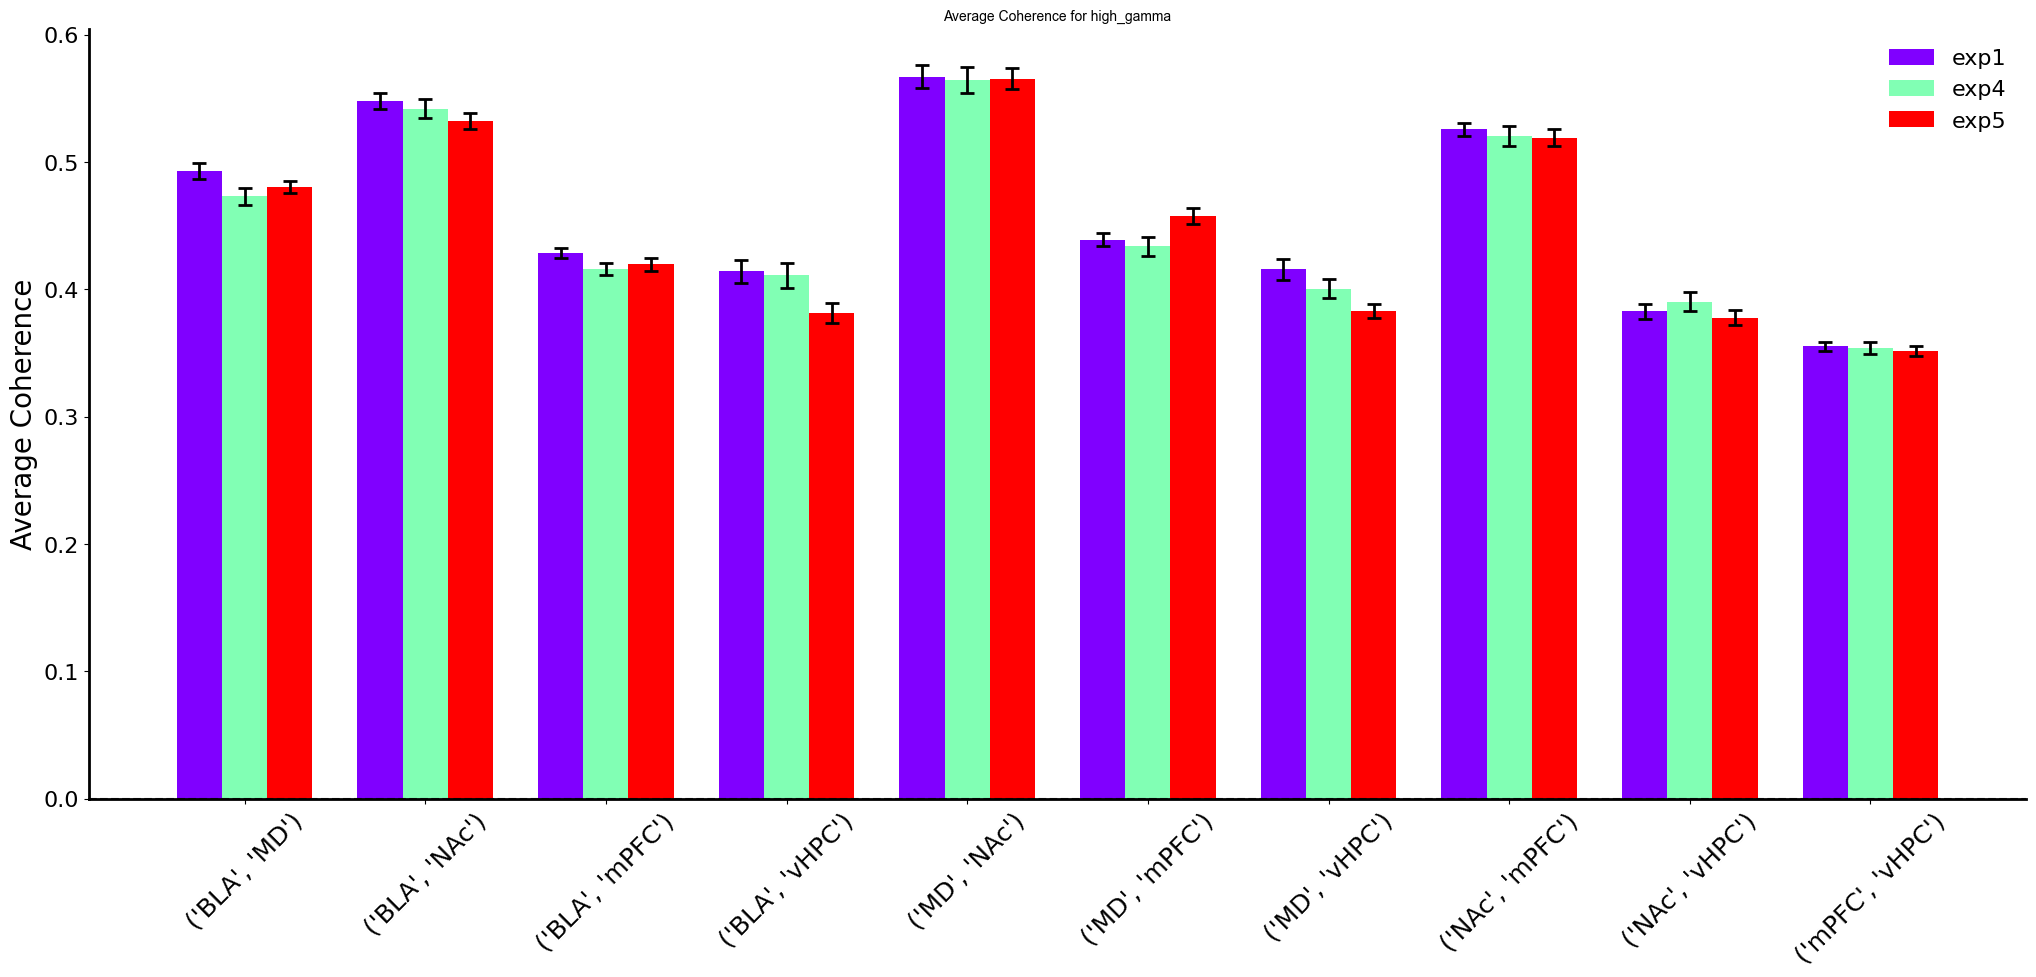

In [145]:
import lfp.lfp_analysis.LFP_analysis as lfp_tests
importlib.reload(lfp_tests)

lfp_tests.all_set(cagemate_collection)

averages = lfp_tests.plot_coherence_bar(cagemate_collection, events)


All set to analyze


c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\LFP_analysis.py:126: RuntimeWarning: Mean of empty slice
  event_average = np.nanmean(event_snippet, axis=0)
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\LFP_analysis.py:382: RuntimeWarning: Mean of empty slice
  # calculations = [trials, frequencies, brain regions]
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\LFP_analysis.py:383: RuntimeWarning: Mean of empty slice
  delta = np.nanmean(calculations[:, 0:4, ...], axis=1)
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\LFP_analysis.py:385: RuntimeWarning: Mean of empty slice
  theta = np.nanmean(calculations[:, 4:13, ...], axis=1)
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\LFP_analysis.py:387: RuntimeWarning: Mean of empty slice
  beta = np.nanmean(calculations[:, 13:31, ...], axis=1)
c:\Users\megha\Documents\GitHub\diff_fam_social

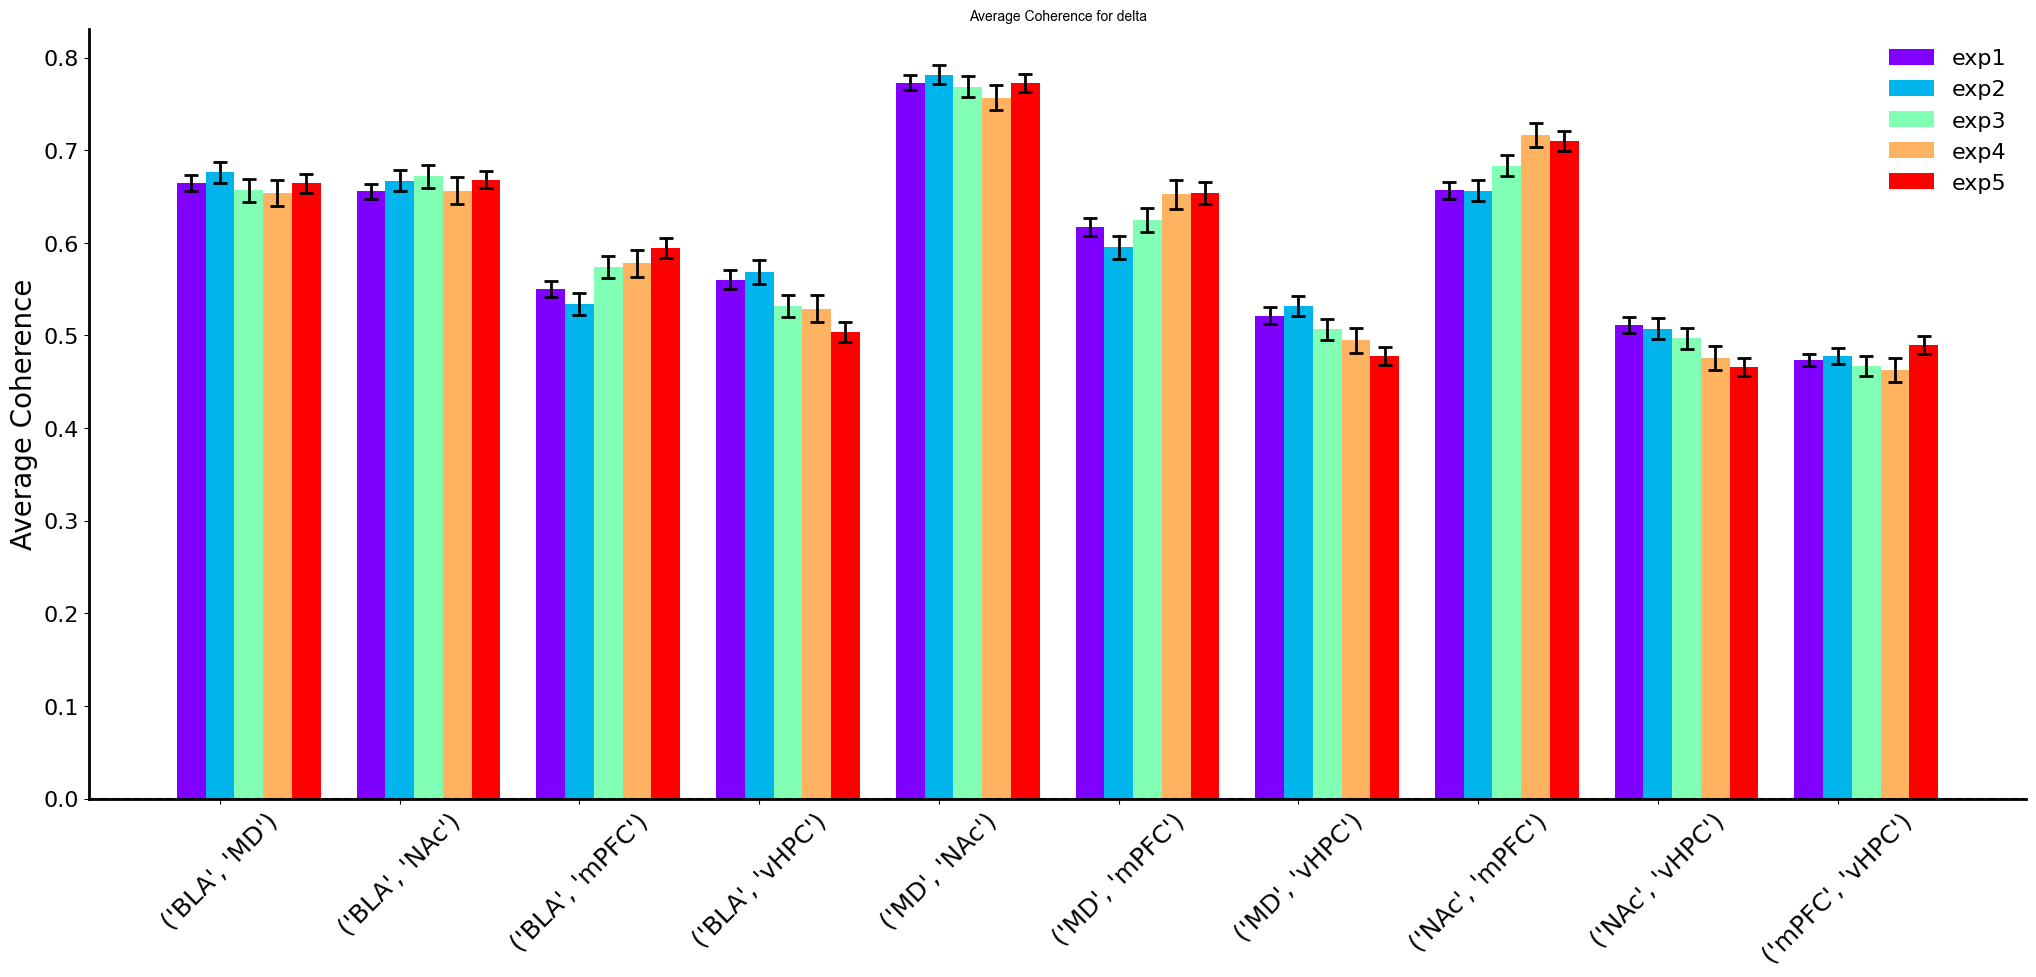

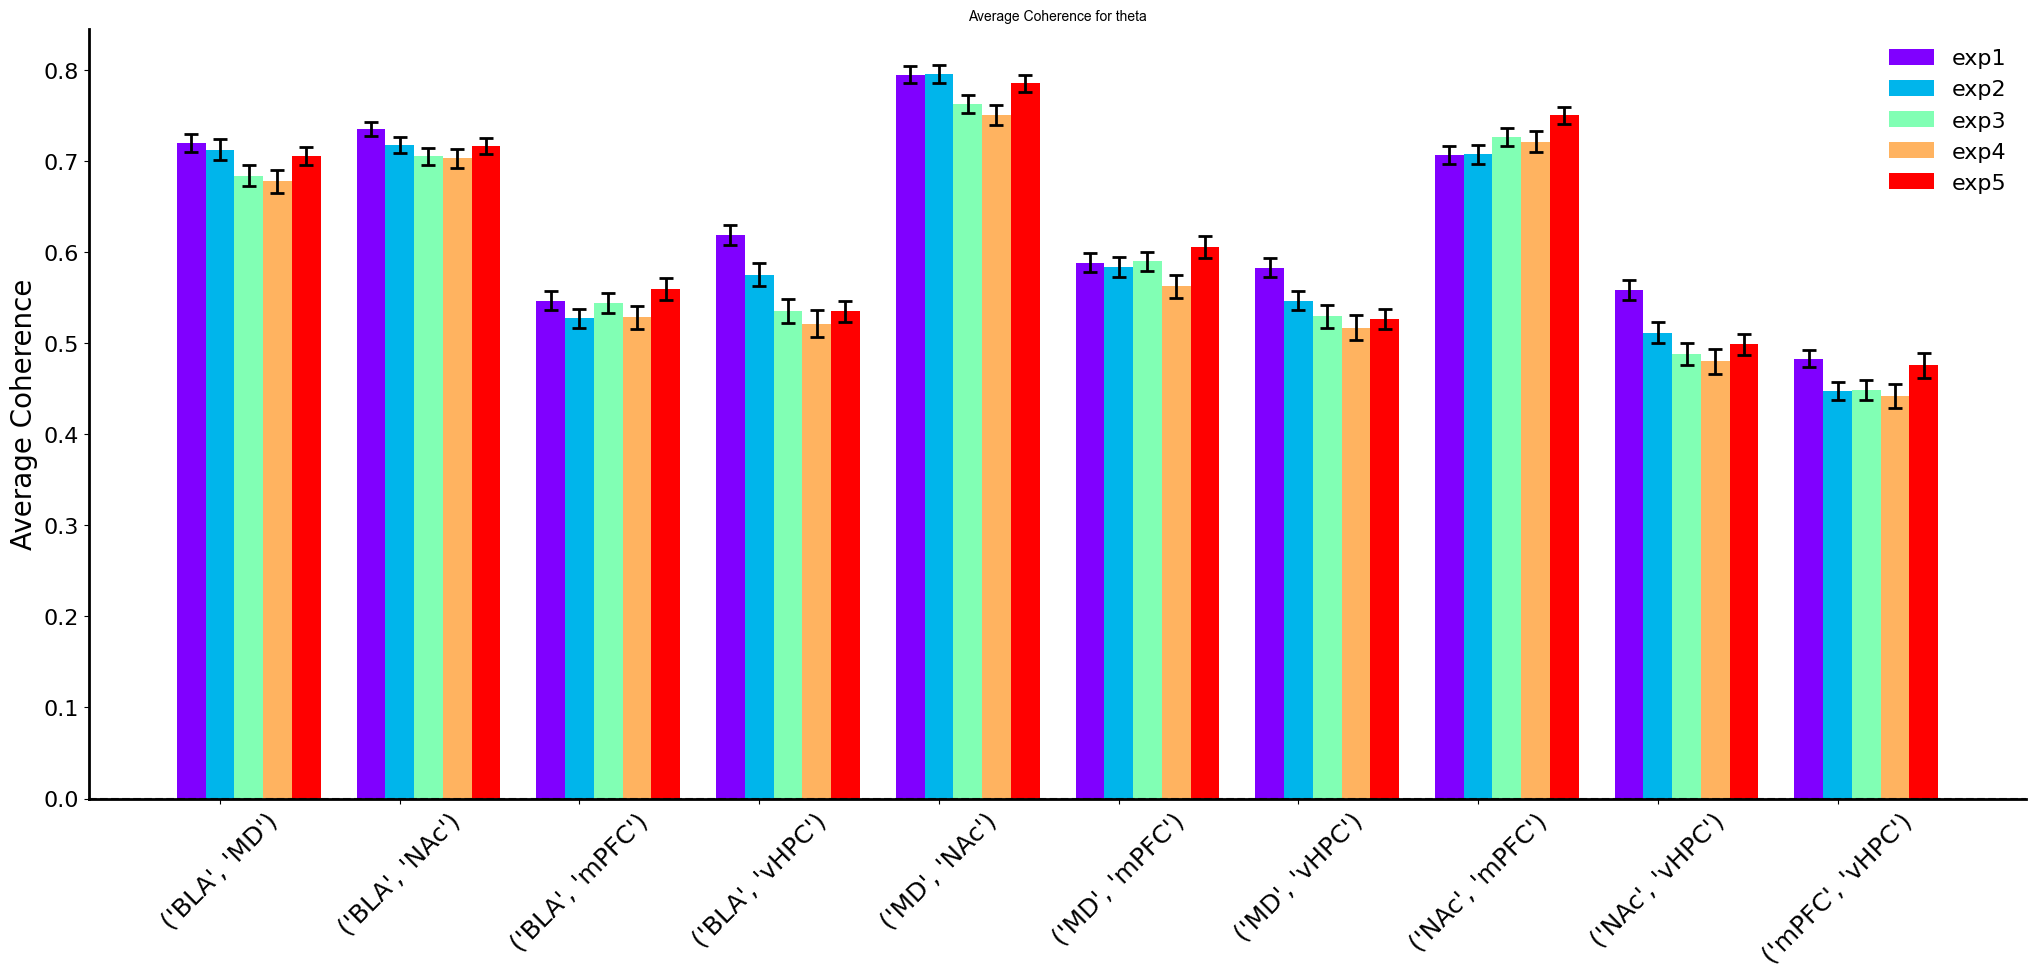

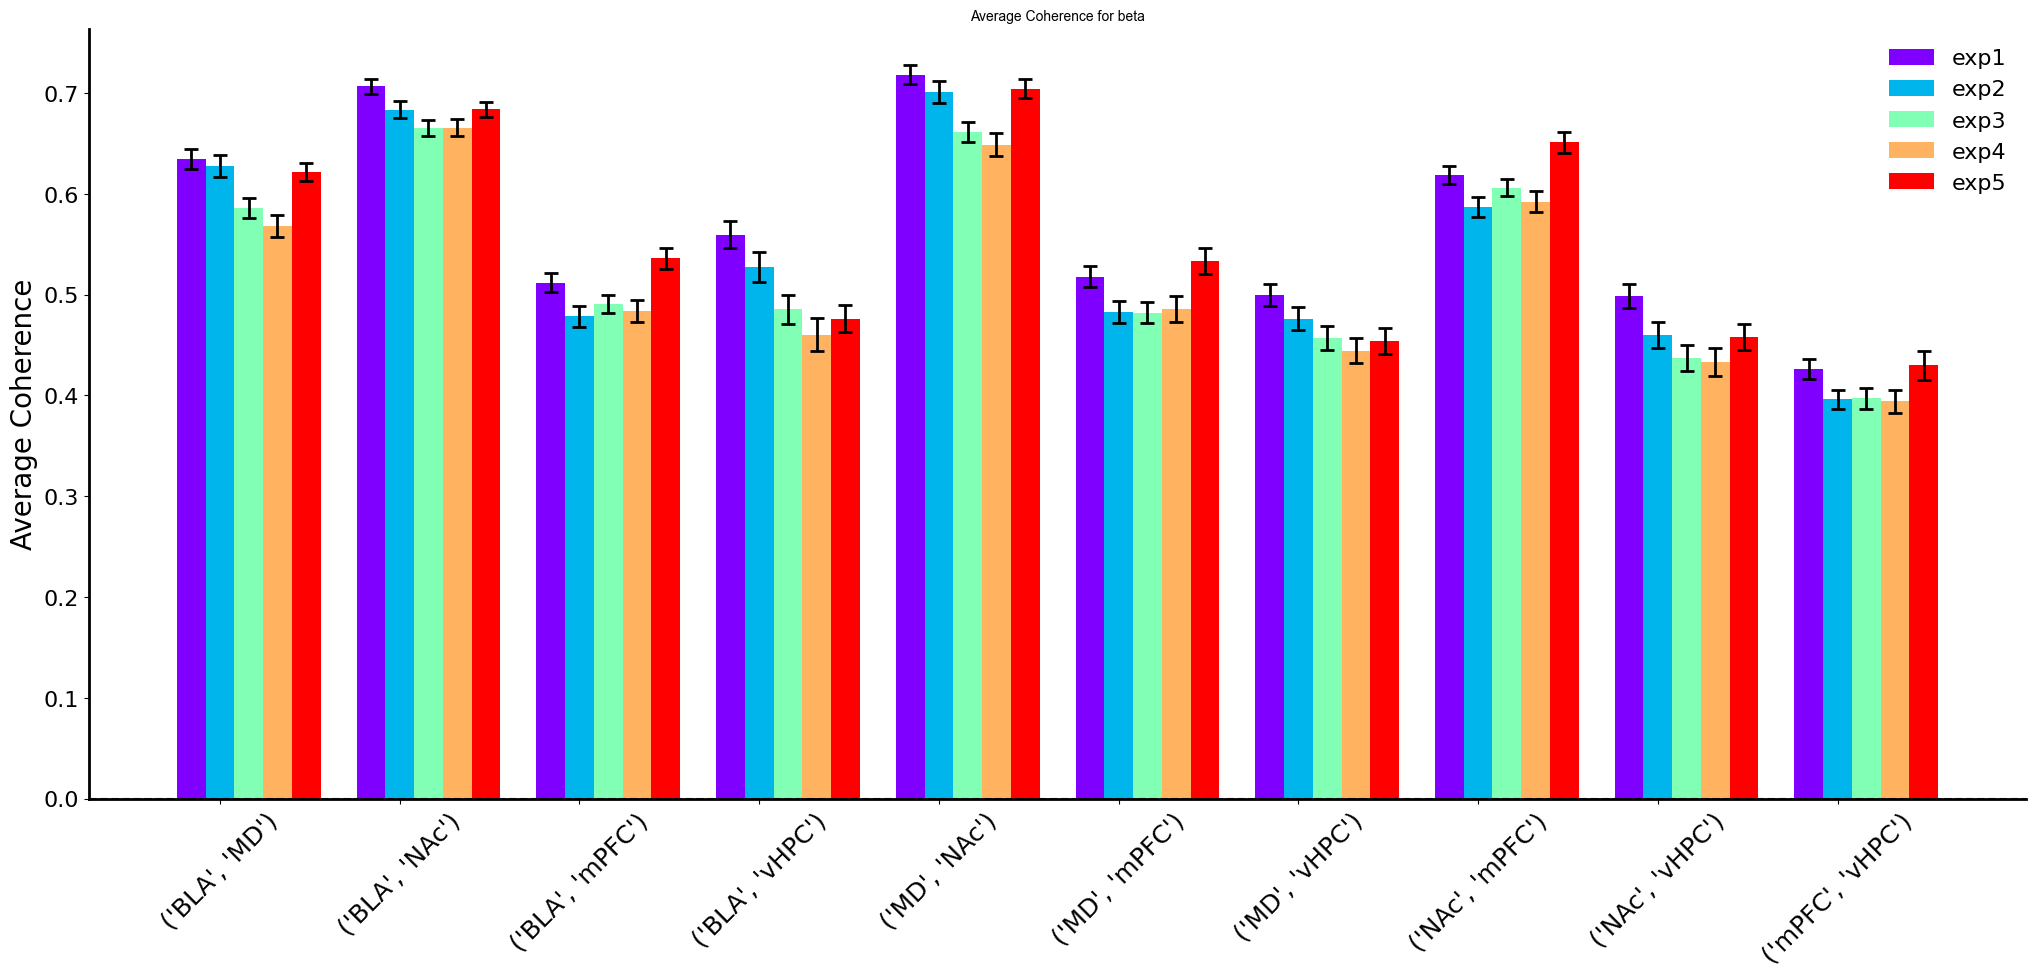

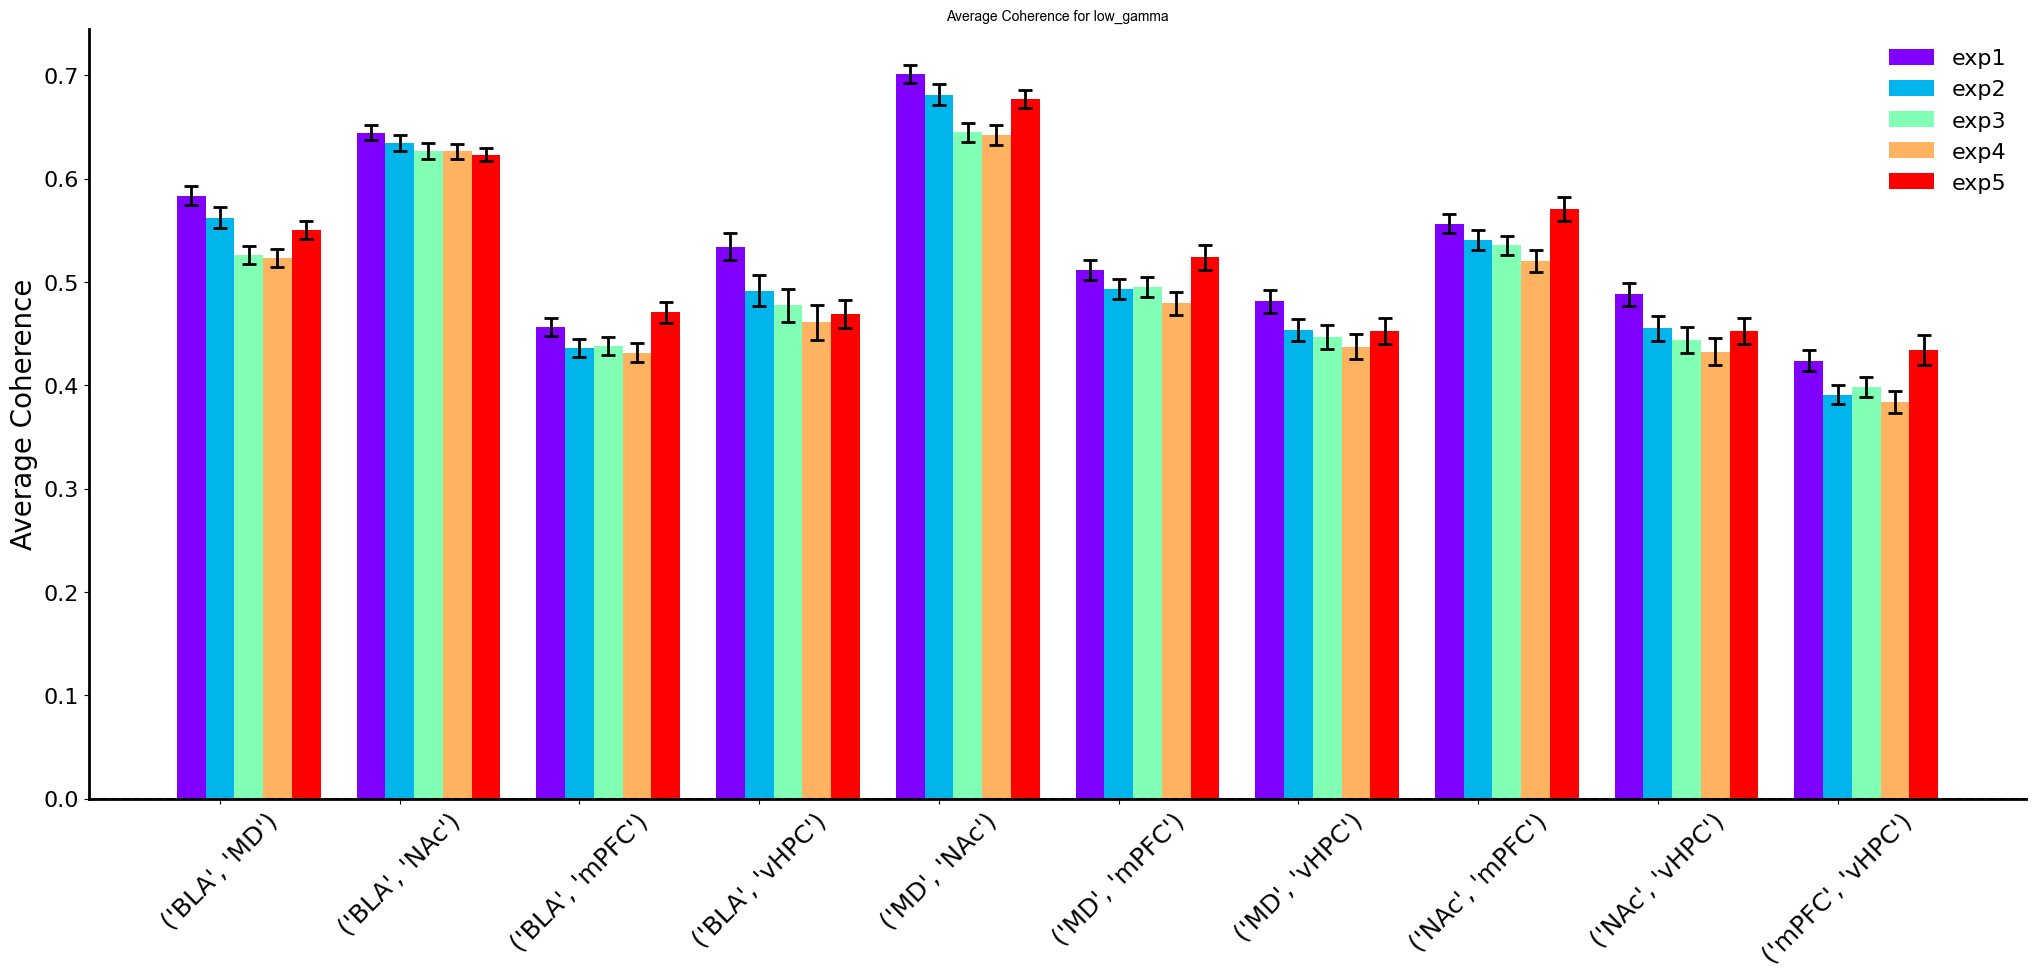

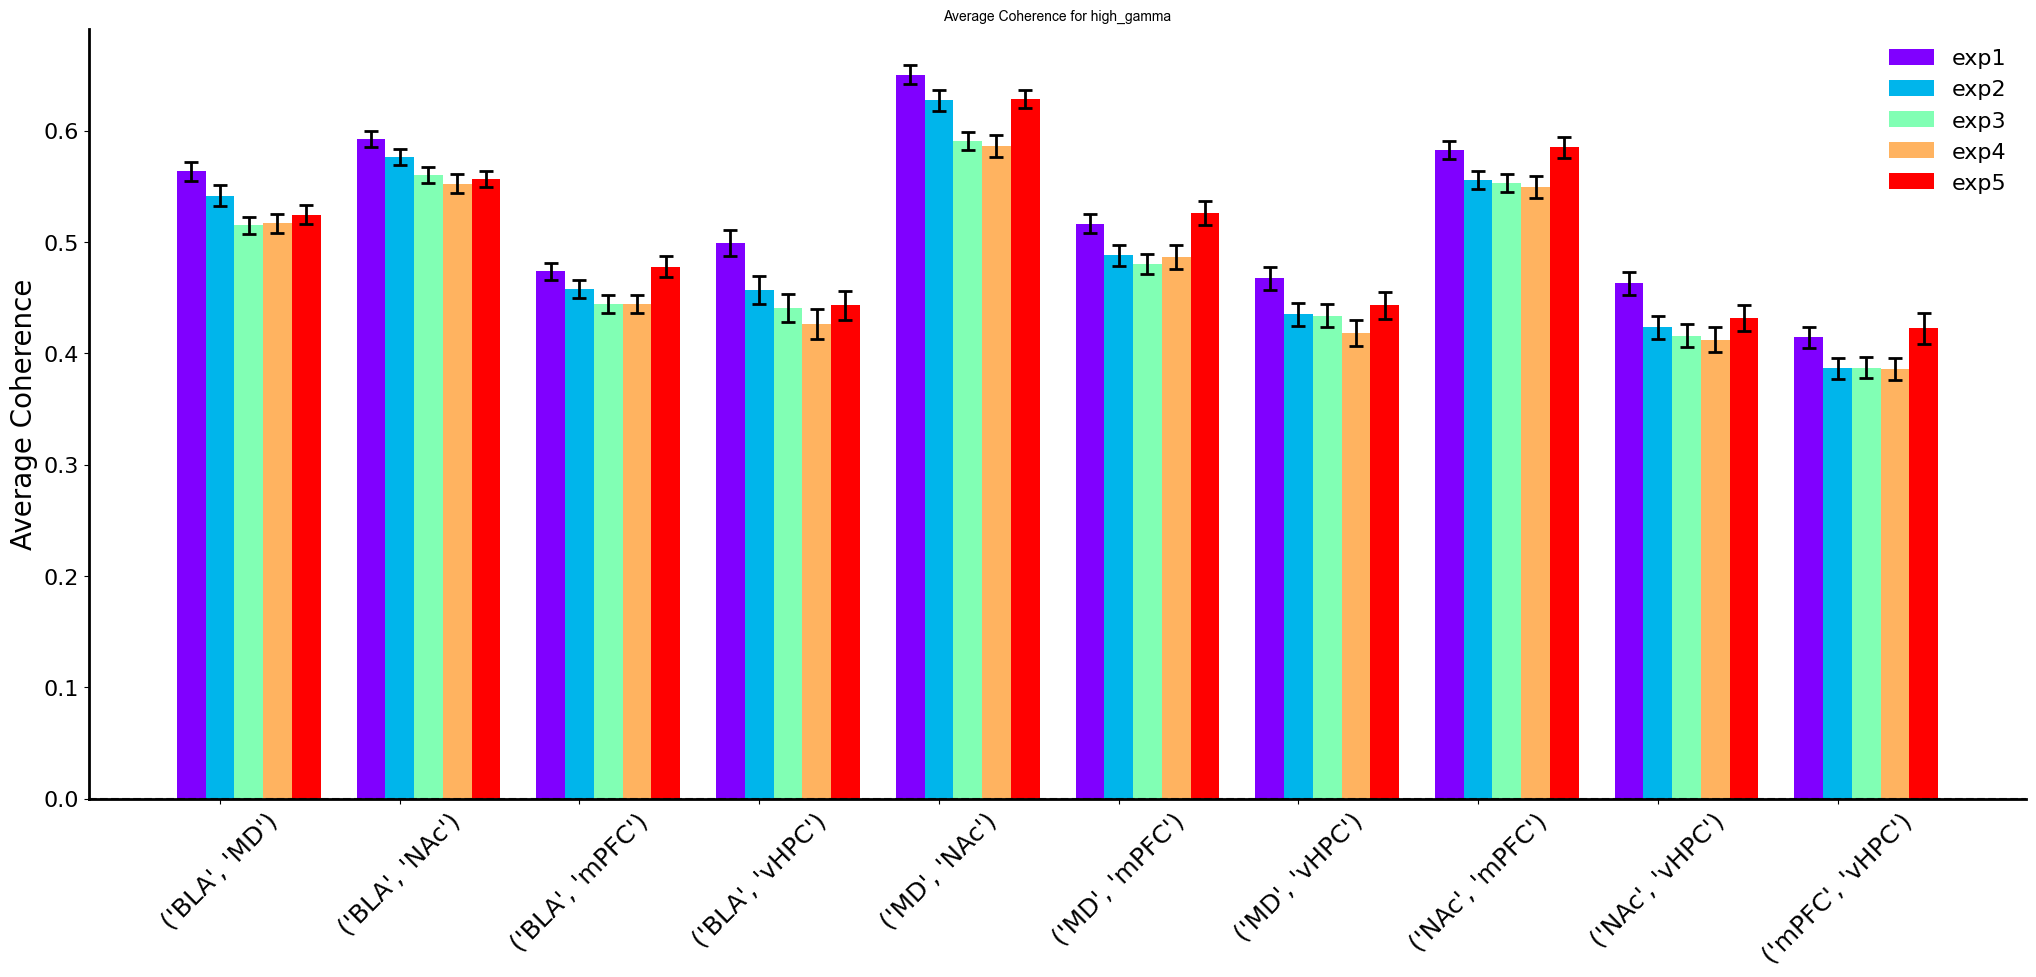

In [150]:
import lfp.lfp_analysis.LFP_analysis as lfp_tests
importlib.reload(lfp_tests)

lfp_tests.all_set(novel_collection)

averages = lfp_tests.plot_coherence_bar(novel_collection, events = ['exp1', 'exp2', 'exp3', 'exp4', 'exp5'])

In [246]:
for recording in cagemate_collection.lfp_recordings:
    print(recording.grangers.shape)


(4739, 500, 5, 5)
(4683, 500, 5, 5)
(4684, 500, 5, 5)
(4682, 500, 5, 5)
(4682, 500, 5, 5)
(4678, 500, 5, 5)
(4684, 500, 5, 5)
(4679, 500, 5, 5)
(4682, 500, 5, 5)
(4682, 500, 5, 5)
(4681, 500, 5, 5)
(4680, 500, 5, 5)


In [132]:
import lfp.lfp_analysis.LFP_analysis as lfp_tests
importlib.reload(lfp_tests)
power_averages = lfp_tests.average_events(cagemate_collection, events, mode = 'power')
banded_power1, banded_power2 = lfp_tests.band_calcs(power_averages)

data (208, 500, 5)
delta (208, 5)
data (143, 500, 5)
delta (143, 5)
data (192, 500, 5)
delta (192, 5)


c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\LFP_analysis.py:381: RuntimeWarning: Mean of empty slice
  
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\LFP_analysis.py:383: RuntimeWarning: Mean of empty slice
  
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\LFP_analysis.py:385: RuntimeWarning: Mean of empty slice
  
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\LFP_analysis.py:387: RuntimeWarning: Mean of empty slice
  
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\LFP_analysis.py:389: RuntimeWarning: Mean of empty slice
  


In [242]:
import lfp.lfp_analysis.preprocessor as prep

for recording in cagemate_collection.lfp_recordings:
    recording.plot_to_find_threshold(threshold = 4)

TypeError: filter() missing 1 required positional argument: 'threshold'

In [133]:
print(banded_power1.keys()) # events, bands
print(banded_power1['exp1'].keys())
print(banded_power1['exp1']['delta'].shape) #trials brain regions 



dict_keys(['exp1', 'exp4', 'exp5'])
dict_keys(['delta', 'theta', 'beta', 'low_gamma', 'high_gamma'])
(208, 5)


In [130]:
print(power_averages['exp1'][0].shape)

(500, 5)


### DECODER TESTING 

In [146]:
import lfp.lfp_analysis.decoders as decoders
importlib.reload(decoders)
from bidict import bidict
testing, shuffle, cb = decoders.trial_decoder(cagemate_collection, num_fold = 5, mode = 'power', events = ['exp1', 'exp5'])

testing

/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:126: RuntimeWarning: Mean of empty slice
  event_average = np.nanmean(event_snippet, axis=0)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:382: RuntimeWarning: Mean of empty slice
  delta = np.nanmean(calculations[:, 0:4, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:383: RuntimeWarning: Mean of empty slice
  theta = np.nanmean(calculations[:, 4:13, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:385: RuntimeWarning: Mean of empty slice
  beta = np.nanmean(calculations[:, 13:31, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:387: RuntimeWarning: Mean of empty slice
  low_gamma = np.nanmean(calculations[:, 31:71, ...],

EVALS LOG
OrderedDict([('train', OrderedDict([('auc', [(np.float64(0.9570493153001417), 0.0060589914730294755)])])), ('test', OrderedDict([('auc', [(np.float64(0.7860189874310541), 0.04433571263214429)])]))])
0.7860189874310541
Round 1: Best iteration = 1, Best score = 0.7860
EVALS LOG
OrderedDict([('train', OrderedDict([('auc', [(np.float64(0.9570493153001417), 0.0060589914730294755), (np.float64(0.9804531747265699), 0.007610733190408876)])])), ('test', OrderedDict([('auc', [(np.float64(0.7860189874310541), 0.04433571263214429), (np.float64(0.8049958385645164), 0.04227640084104915)])]))])
0.8049958385645164
Round 2: Best iteration = 1, Best score = 0.7860
EVALS LOG
OrderedDict([('train', OrderedDict([('auc', [(np.float64(0.9570493153001417), 0.0060589914730294755), (np.float64(0.9804531747265699), 0.007610733190408876), (np.float64(0.9911773557881768), 0.0025356779832250865)])])), ('test', OrderedDict([('auc', [(np.float64(0.7860189874310541), 0.04433571263214429), (np.float64(0.80499

train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.961147       0.007917       0.762079      0.063698
1        0.981979       0.005249       0.798808      0.041502
2        0.992445       0.002827       0.824095      0.031534
3        0.995356       0.002509       0.836422      0.024340
4        0.997582       0.001721       0.848198      0.031156
5        0.998552       0.001010       0.853012      0.026505
6        0.999366       0.000637       0.860339      0.030796
7        0.999632       0.000398       0.865223      0.028613
8        0.999859       0.000195       0.871103      0.024012
9        0.999922       0.000094       0.876237      0.021503

In [172]:
cb.best_model.cvfolds[0].bst.dump_model("wut.json", dump_format="json")

In [135]:
testing, shuffle = decoders.trial_decoder(cagemate_collection, num_fold = 5, mode = 'power', events = ['exp1', 'exp4'])

testing

EVALS LOG
OrderedDict([('train', OrderedDict([('auc', [(np.float64(0.9488089292452562), 0.008275464557325038)])])), ('test', OrderedDict([('auc', [(np.float64(0.7308371666580846), 0.0668418562306059)])]))])


/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:126: RuntimeWarning: Mean of empty slice
  event_average = np.nanmean(event_snippet, axis=0)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:382: RuntimeWarning: Mean of empty slice
  delta = np.nanmean(calculations[:, 0:4, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:383: RuntimeWarning: Mean of empty slice
  theta = np.nanmean(calculations[:, 4:13, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:385: RuntimeWarning: Mean of empty slice
  beta = np.nanmean(calculations[:, 13:31, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:387: RuntimeWarning: Mean of empty slice
  low_gamma = np.nanmean(calculations[:, 31:71, ...],

KeyError: 'validation'

In [233]:
testing, shuffle = decoders.trial_decoder(novel_collection, num_fold = 5, mode = 'power', events = ['exp1', 'exp4'])
testing

c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\LFP_analysis.py:126: RuntimeWarning: Mean of empty slice
  event_average = np.nanmean(event_snippet, axis=0)
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\LFP_analysis.py:382: RuntimeWarning: Mean of empty slice
  delta = np.nanmean(calculations[:, 0:4, ...], axis=1)
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\LFP_analysis.py:383: RuntimeWarning: Mean of empty slice
  theta = np.nanmean(calculations[:, 4:13, ...], axis=1)
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\LFP_analysis.py:385: RuntimeWarning: Mean of empty slice
  beta = np.nanmean(calculations[:, 13:31, ...], axis=1)
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\LFP_analysis.py:387: RuntimeWarning: Mean of empty slice
  low_gamma = np.nanmean(calculations[:, 31:71, ...], axis=1)
c:\Users\megha\Documents\GitHub\diff_fam_

train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.963271       0.004275       0.815899      0.036925
1        0.988100       0.002871       0.861678      0.031732
2        0.993887       0.001126       0.884156      0.042350
3        0.997375       0.000458       0.889529      0.037700
4        0.998705       0.000447       0.888871      0.031039

In [224]:
testing, shuffle = decoders.trial_decoder(novel_collection, num_fold = 5, mode = 'coherence', events = events)
testing

c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\LFP_analysis.py:126: RuntimeWarning: Mean of empty slice
  event_average = np.nanmean(event_snippet, axis=0)
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\LFP_analysis.py:382: RuntimeWarning: Mean of empty slice
  # calculations = [trials, frequencies, brain regions]
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\LFP_analysis.py:383: RuntimeWarning: Mean of empty slice
  delta = np.nanmean(calculations[:, 0:4, ...], axis=1)
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\LFP_analysis.py:385: RuntimeWarning: Mean of empty slice
  theta = np.nanmean(calculations[:, 4:13, ...], axis=1)
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\lfp_analysis\LFP_analysis.py:387: RuntimeWarning: Mean of empty slice
  beta = np.nanmean(calculations[:, 13:31, ...], axis=1)
c:\Users\megha\Documents\GitHub\diff_fam_social

train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.900090       0.009196       0.629310      0.008127
1        0.951432       0.007857       0.655463      0.025446
2        0.976141       0.004834       0.676680      0.037165
3        0.988038       0.003534       0.677760      0.038878
4        0.994840       0.001654       0.691589      0.039700

In [181]:
import numpy as np
from itertools import combinations, product
def __reshape_data__(data, mode):
    stacked_bands = np.stack(data, axis=0)
    print(stacked_bands.shape)
    # stacked bands = [band, trials, regions]
    # what i want = [trials, bandxregions]
    if mode != "coherence":
        if mode == "power":
            reshaped_bands = np.transpose(stacked_bands, (1, 0, 2))
            features = list(product(range(stacked_bands.shape[0]), range(stacked_bands.shape[2])))
            reshaped_bands = reshaped_bands.reshape(reshaped_bands.shape[0], -1)
    if mode == 'coherence':
        reshaped_bands, features = __reshape_coherence_data__(stacked_bands)
    if mode == "granger":
        reshaped_bands, features = __reshape_granger_data__(stacked_bands)
    return reshaped_bands, features



def __reshape_coherence_data__(stacked_bands):
    n_bands, n_trials, n_regions, _ = stacked_bands.shape
    # Get indices for upper triangle (excluding diagonal)
    region_pairs = list(combinations(range(n_regions), 2))
    # Initialize output array
    # Shape will be [trials, bands * number_of_unique_pairs]
    n_pairs = len(region_pairs)
    reshaped = np.zeros((n_trials, n_bands * n_pairs))
    feature_indices = []
    # Fill the array
    for band in range(n_bands):
        for pair_idx, (i, j) in enumerate(region_pairs):
            # Get position in final array
            output_idx = band * n_pairs + pair_idx
            reshaped[:, output_idx] = stacked_bands[band, :, i, j]
            feature_indices.append(tuple([band, i, j]))
    return reshaped, feature_indices

def __reshape_granger_data__(stacked_bands):
    n_bands, n_trials, n_regions, _ = stacked_bands.shape
    # Get off-diagonal indices
    region_pairs = [(i, j) for i, j in product(range(n_regions), range(n_regions)) if i != j]
    print(region_pairs)
    # Initialize output array
    n_pairs = len(region_pairs)
    reshaped = np.zeros((n_trials, n_bands * n_pairs))
    feature_indices = []
    
    # Fill the array
    for band in range(n_bands):
        for pair_idx, (i, j) in enumerate(region_pairs):
            output_idx = band * n_pairs + pair_idx
            reshaped[:, output_idx] = stacked_bands[band, :, i, j]
            feature_indices.append(tuple([band, i, j]))
            
    return reshaped, feature_indices

def create_test_datasets():
    # Common parameters
    n_bands = 2
    n_regions = 3
    n_trials = 4

    # 1. Power data: shape [bands, trials, regions]
    power_data = np.array([
        # Band 1
        [[0.5, 0.7, 0.9],   # Trial 1, [region1, region2, region3]
         [0.6, 0.8, 1.0],   # Trial 2
         [0.4, 0.9, 1.1],   # Trial 3
         [0.5, 0.7, 1.2]],  # Trial 4
        
        # Band 2
        [[1.1, 1.3, 1.5],   # Trial 1
         [1.2, 1.4, 1.6],   # Trial 2
         [1.0, 1.5, 1.7],   # Trial 3
         [1.1, 1.3, 1.8]]   # Trial 4
    ])

    # 2. Coherence data: shape [bands, trials, regions, regions] (symmetric)
    coherence_data = np.array([
        # Band 1
        [[[1.0, 0.3, 0.4],    # Trial 1
          [0.3, 1.0, 0.5],
          [0.4, 0.5, 1.0]],
         [[1.0, 0.4, 0.5],    # Trial 2
          [0.4, 1.0, 0.6],
          [0.5, 0.6, 1.0]],
         [[1.0, 0.5, 0.6],    # Trial 3
          [0.5, 1.0, 0.7],
          [0.6, 0.7, 1.0]],
         [[1.0, 0.6, 0.7],    # Trial 4
          [0.6, 1.0, 0.8],
          [0.7, 0.8, 1.0]]],
        
        # Band 2
        [[[1.0, 0.6, 0.7],    # Trial 1
          [0.6, 1.0, 0.8],
          [0.7, 0.8, 1.0]],
         [[1.0, 0.7, 0.8],    # Trial 2
          [0.7, 1.0, 0.9],
          [0.8, 0.9, 1.0]],
         [[1.0, 0.8, 0.9],    # Trial 3
          [0.8, 1.0, 1.0],
          [0.9, 1.0, 1.0]],
         [[1.0, 0.9, 1.0],    # Trial 4
          [0.9, 1.0, 1.1],
          [1.0, 1.1, 1.0]]]
    ])

    # 3. Granger data: shape [bands, trials, regions, regions] (non-symmetric)
    granger_data = np.array([
        # Band 1
        [[[0.0, 0.3, 0.4],    # Trial 1
          [0.5, 0.0, 0.6],
          [0.7, 0.8, 0.0]],
         [[0.0, 0.4, 0.5],    # Trial 2
          [0.6, 0.0, 0.7],
          [0.8, 0.9, 0.0]],
         [[0.0, 0.5, 0.6],    # Trial 3
          [0.7, 0.0, 0.8],
          [0.9, 1.0, 0.0]],
         [[0.0, 0.6, 0.7],    # Trial 4
          [0.8, 0.0, 0.9],
          [1.0, 1.1, 0.0]]],
        
        # Band 2
        [[[0.0, 0.7, 0.8],    # Trial 1
          [0.9, 0.0, 1.0],
          [1.1, 1.2, 0.0]],
         [[0.0, 0.8, 0.9],    # Trial 2
          [1.0, 0.0, 1.1],
          [1.2, 1.3, 0.0]],
         [[0.0, 0.9, 1.0],    # Trial 3
          [1.1, 0.0, 1.2],
          [1.3, 1.4, 0.0]],
         [[0.0, 1.0, 1.1],    # Trial 4
          [1.2, 0.0, 1.3],
          [1.4, 1.5, 0.0]]]
    ])

    return power_data, coherence_data, granger_data

# Create and verify the shapes
power, coherence, granger = create_test_datasets()
print("Power shape:", power.shape)        # Should be (2, 4, 3)
print("Coherence shape:", coherence.shape) # Should be (2, 4, 3, 3)
print("Granger shape:", granger.shape)

# Create and verify the shapes
power, coherence, granger = create_test_datasets()
print("Power shape:", power.shape)        # Should be (2, 3, 2)
print("Coherence shape:", coherence.shape) # Should be (2, 3, 2, 2)
print("Granger shape:", granger.shape)    # Should be (2, 3, 2, 2)

Power shape: (2, 4, 3)
Coherence shape: (2, 4, 3, 3)
Granger shape: (2, 4, 3, 3)
Power shape: (2, 4, 3)
Coherence shape: (2, 4, 3, 3)
Granger shape: (2, 4, 3, 3)


Note: you may need to restart the kernel to use updated packages.


In [183]:
print(granger) #bands, trials, regions
new_data, features = __reshape_data__(granger, mode = 'granger')
print(new_data.shape, new_data, features)

[[[[0.  0.3 0.4]
   [0.5 0.  0.6]
   [0.7 0.8 0. ]]

  [[0.  0.4 0.5]
   [0.6 0.  0.7]
   [0.8 0.9 0. ]]

  [[0.  0.5 0.6]
   [0.7 0.  0.8]
   [0.9 1.  0. ]]

  [[0.  0.6 0.7]
   [0.8 0.  0.9]
   [1.  1.1 0. ]]]


 [[[0.  0.7 0.8]
   [0.9 0.  1. ]
   [1.1 1.2 0. ]]

  [[0.  0.8 0.9]
   [1.  0.  1.1]
   [1.2 1.3 0. ]]

  [[0.  0.9 1. ]
   [1.1 0.  1.2]
   [1.3 1.4 0. ]]

  [[0.  1.  1.1]
   [1.2 0.  1.3]
   [1.4 1.5 0. ]]]]
(2, 4, 3, 3)
[(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1)]
(4, 12) [[0.3 0.4 0.5 0.6 0.7 0.8 0.7 0.8 0.9 1.  1.1 1.2]
 [0.4 0.5 0.6 0.7 0.8 0.9 0.8 0.9 1.  1.1 1.2 1.3]
 [0.5 0.6 0.7 0.8 0.9 1.  0.9 1.  1.1 1.2 1.3 1.4]
 [0.6 0.7 0.8 0.9 1.  1.1 1.  1.1 1.2 1.3 1.4 1.5]] [(0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 2), (0, 2, 0), (0, 2, 1), (1, 0, 1), (1, 0, 2), (1, 1, 0), (1, 1, 2), (1, 2, 0), (1, 2, 1)]


In [249]:
for recording in cagemate_collection.lfp_recordings: 
    print(np.nanmin(recording.grangers[:,40,0,3]))

1.591355082197765e-05
0.00012701375038925988
8.979370935691122e-06
0.00010898327756958537
6.421806018508391e-06
3.048054183540927e-05
4.138416713317383e-05
0.0002979919716672441
0.0002702310203428482
4.231678692256935e-05
2.9876907127857066e-05
3.792118253187482e-05


In [256]:
#TODO see if power has more or less nans than traces , does a whole window became nan if there sone nan
# find nan in trace, see if corresponding time bin in power also has nans 


In [257]:
for recording in cagemate_collection.lfp_recordings: 
    #print(np.nanmax(recording.grangers[:,40,0,3]))
    x = recording.grangers[:,:,:,:]
    print('over 1', (x > 1).mean() * 100)
    print('under 1', (x < 0).mean() * 100 )
    print(recording.traces()

SyntaxError: incomplete input (377234900.py, line 6)

### TOP FEATURE DECODING

In [17]:
import lfp.lfp_analysis.decoders as decoders
import importlib
importlib.reload(decoders)

events = ['exp1', 'exp4', 'exp5']

features= decoders.calc_top_feat_trial_decoder(novel_collection, num_features = 10, num_fold = 5, mode = ['power', 'coherence', 'granger'], events = events)


/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:126: RuntimeWarning: Mean of empty slice
  event_average = np.nanmean(event_snippet, axis=0)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:382: RuntimeWarning: Mean of empty slice
  delta = np.nanmean(calculations[:, 0:4, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:383: RuntimeWarning: Mean of empty slice
  theta = np.nanmean(calculations[:, 4:13, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:385: RuntimeWarning: Mean of empty slice
  beta = np.nanmean(calculations[:, 13:31, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:387: RuntimeWarning: Mean of empty slice
  low_gamma = np.nanmean(calculations[:, 31:71, ...],

In [18]:
features

{'exp1': [[5, 14, 64, 24, 129, 19, 11, 50, 10, 23],
  ['theta_mPFC',
   'beta_vHPC',
   'low_gamma_BLA_vHPC',
   'high_gamma_vHPC',
   'beta_fromBLA_toMD',
   'low_gamma_vHPC',
   'beta_NAc',
   'beta_NAc_BLA',
   'beta_mPFC',
   'high_gamma_BLA']],
 'exp4': [[5, 91, 64, 71, 41, 111, 15, 45, 105, 99],
  ['theta_mPFC',
   'delta_fromvHPC_tomPFC',
   'low_gamma_BLA_vHPC',
   'high_gamma_NAc_vHPC',
   'theta_NAc_vHPC',
   'theta_fromvHPC_tomPFC',
   'low_gamma_mPFC',
   'beta_mPFC_NAc',
   'theta_fromMD_toBLA',
   'theta_fromNAc_tomPFC']],
 'exp5': [[118, 66, 10, 64, 39, 128, 62, 156, 171, 7],
  ['beta_frommPFC_tovHPC',
   'high_gamma_mPFC_MD',
   'beta_mPFC',
   'low_gamma_BLA_vHPC',
   'theta_NAc_MD',
   'beta_fromBLA_toNAc',
   'low_gamma_MD_BLA',
   'high_gamma_frommPFC_toMD',
   'high_gamma_fromvHPC_tomPFC',
   'theta_MD']]}

In [19]:
cagemate_features= decoders.calc_top_feat_trial_decoder(cagemate_collection, num_features = 10, num_fold = 5, mode = ['power', 'coherence', 'granger'], events = events)


/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:126: RuntimeWarning: Mean of empty slice
  event_average = np.nanmean(event_snippet, axis=0)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:382: RuntimeWarning: Mean of empty slice
  delta = np.nanmean(calculations[:, 0:4, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:383: RuntimeWarning: Mean of empty slice
  theta = np.nanmean(calculations[:, 4:13, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:385: RuntimeWarning: Mean of empty slice
  beta = np.nanmean(calculations[:, 13:31, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:387: RuntimeWarning: Mean of empty slice
  low_gamma = np.nanmean(calculations[:, 31:71, ...],

In [20]:
cagemate_features

{'exp1': [[0, 21, 1, 17, 29, 26, 54, 67, 166, 19],
  ['delta_mPFC',
   'high_gamma_NAc',
   'delta_NAc',
   'low_gamma_MD',
   'delta_NAc_MD',
   'delta_mPFC_MD',
   'beta_BLA_vHPC',
   'high_gamma_mPFC_BLA',
   'high_gamma_fromMD_tovHPC',
   'low_gamma_vHPC']],
 'exp4': [[111, 131, 5, 47, 153, 72, 139, 77, 97, 137],
  ['theta_fromvHPC_tomPFC',
   'beta_fromvHPC_tomPFC',
   'theta_mPFC',
   'beta_mPFC_BLA',
   'low_gamma_fromvHPC_toMD',
   'high_gamma_MD_BLA',
   'low_gamma_fromNAc_tomPFC',
   'delta_frommPFC_toBLA',
   'theta_frommPFC_toBLA',
   'low_gamma_frommPFC_toBLA']],
 'exp5': [[21, 5, 39, 70, 19, 99, 17, 14, 89, 165],
  ['high_gamma_NAc',
   'theta_mPFC',
   'theta_NAc_MD',
   'high_gamma_NAc_BLA',
   'low_gamma_vHPC',
   'theta_fromNAc_tomPFC',
   'low_gamma_MD',
   'beta_vHPC',
   'delta_fromBLA_toMD',
   'high_gamma_fromMD_toBLA']]}

In [11]:
import lfp.lfp_analysis.decoders as decoders
import importlib
importlib.reload(decoders)
events = ['exp1', 'exp4']

novel_results= decoders.trial_decoder(novel_collection, num_fold = 5, mode = ['power', 'coherence', 'granger'], events = events)


/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:126: RuntimeWarning: Mean of empty slice
  event_average = np.nanmean(event_snippet, axis=0)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:382: RuntimeWarning: Mean of empty slice
  delta = np.nanmean(calculations[:, 0:4, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:383: RuntimeWarning: Mean of empty slice
  theta = np.nanmean(calculations[:, 4:13, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:385: RuntimeWarning: Mean of empty slice
  beta = np.nanmean(calculations[:, 13:31, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:387: RuntimeWarning: Mean of empty slice
  low_gamma = np.nanmean(calculations[:, 31:71, ...],

In [330]:
print(novel_results.results['exp1'].avg_auc)
novel_results.results['exp1'].get_feature_imp().head(10)

0.9126096491228071


Feature    Fold 1    Fold 2    Fold 3    Fold 4  \
62            low_gamma_MD_BLA  0.068656  0.122464  0.163962  0.113224   
15              low_gamma_mPFC  0.013075  0.029755  0.091137  0.016443   
5                   theta_mPFC  0.024692  0.040192  0.025201  0.036152   
91       delta_fromvHPC_tomPFC  0.002916  0.051163  0.006629  0.014284   
6                    theta_NAc  0.028130  0.007236  0.020946  0.009515   
172  high_gamma_fromvHPC_toNAc  0.005989  0.014012  0.002618  0.020935   
111      theta_fromvHPC_tomPFC  0.006893  0.074579  0.000000  0.000736   
162  high_gamma_fromNAc_tovHPC  0.005054  0.018878  0.000000  0.057950   
36               theta_mPFC_MD  0.007684  0.011452  0.039472  0.002093   
123         beta_fromMD_tomPFC  0.064248  0.003347  0.000000  0.000000   

       Fold 5  Average Weight  
62   0.059121        0.105485  
15   0.027776        0.035637  
5    0.040859        0.033419  
91   0.014147        0.017828  
6    0.018458        0.016857  
172  0.040680        0.016847  
111  0.001872        0.016816  
162  0.001857        0.016748  
36   0.019576        0.016056  
123  0.012425        0.016004

In [331]:
cagemate_results= decoders.trial_decoder(cagemate_collection, num_fold = 5, mode = ['power', 'coherence', 'granger'], events = events)


/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:126: RuntimeWarning: Mean of empty slice
  event_average = np.nanmean(event_snippet, axis=0)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:382: RuntimeWarning: Mean of empty slice
  delta = np.nanmean(calculations[:, 0:4, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:383: RuntimeWarning: Mean of empty slice
  theta = np.nanmean(calculations[:, 4:13, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:385: RuntimeWarning: Mean of empty slice
  beta = np.nanmean(calculations[:, 13:31, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:387: RuntimeWarning: Mean of empty slice
  low_gamma = np.nanmean(calculations[:, 31:71, ...],

In [332]:
print(cagemate_results.results['exp1'].avg_auc)
cagemate_results.results['exp1'].get_feature_imp().head(10)

0.7768830492668052


Feature    Fold 1    Fold 2    Fold 3    Fold 4  \
0                   delta_mPFC  0.012287  0.009471  0.001500  0.064707   
5                   theta_mPFC  0.024454  0.027122  0.022937  0.025403   
62            low_gamma_MD_BLA  0.005217  0.038664  0.009540  0.043286   
10                   beta_mPFC  0.031756  0.004343  0.022715  0.046129   
170  high_gamma_fromBLA_tovHPC  0.023721  0.034148  0.009540  0.002628   
172  high_gamma_fromvHPC_toNAc  0.016139  0.068525  0.003259  0.002471   
40               theta_NAc_BLA  0.002695  0.010963  0.048450  0.018544   
94        delta_fromvHPC_toBLA  0.004478  0.001015  0.006816  0.041508   
130        beta_fromBLA_tovHPC  0.009794  0.033599  0.013848  0.015736   
43               theta_MD_vHPC  0.018929  0.018315  0.003901  0.028557   

       Fold 5  Average Weight  
0    0.052244        0.028042  
5    0.031011        0.026185  
62   0.033201        0.025982  
10   0.024004        0.025789  
170  0.023695        0.018747  
172  0.002222        0.018523  
40   0.000000        0.016130  
94   0.023097        0.015383  
130  0.000000        0.014596  
43   0.002203        0.014381

In [25]:
for recording in novel_collection.lfp_recordings:
    novel = np.concatenate([recording.behavior_dict['exp1'], recording.behavior_dict['exp5']], axis = 0)
    recording.behavior_dict['novel'] = novel
    not_novel = np.concatenate([recording.behavior_dict['exp3'], recording.behavior_dict['exp4']], axis = 0)
    recording.behavior_dict['not_novel'] = not_novel
for recording in cagemate_collection.lfp_recordings:
    novel = np.concatenate([recording.behavior_dict['exp1'], recording.behavior_dict['exp5']], axis = 0)
    recording.behavior_dict['novel'] = novel
    not_novel = np.concatenate([recording.behavior_dict['exp3'], recording.behavior_dict['exp4']], axis = 0)
    recording.behavior_dict['not_novel'] = not_novel

In [62]:
import lfp.lfp_analysis.LFP_analysis as lfpa
reload(lfpa)
novel_power_averages = lfpa.average_events(novel_collection, events = ['novel'], mode = 'power', plot = False)
cagemate_power_averages = lfpa.average_events(cagemate_collection, events = ['novel'], mode = 'power', plot = False
                            )

/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:382: RuntimeWarning: Mean of empty slice
  calculations = np.array(calculations)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:383: RuntimeWarning: Mean of empty slice
  # calculations = [trials, frequencies, brain regions]
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:385: RuntimeWarning: Mean of empty slice
  theta = np.nanmean(calculations[:, 4:13, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:387: RuntimeWarning: Mean of empty slice
  beta = np.nanmean(calculations[:, 13:31, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:389: RuntimeWarning: Mean of empty slice
  low_gamma = np.nanmean(calculations[:, 31:71, ...], axis=1)


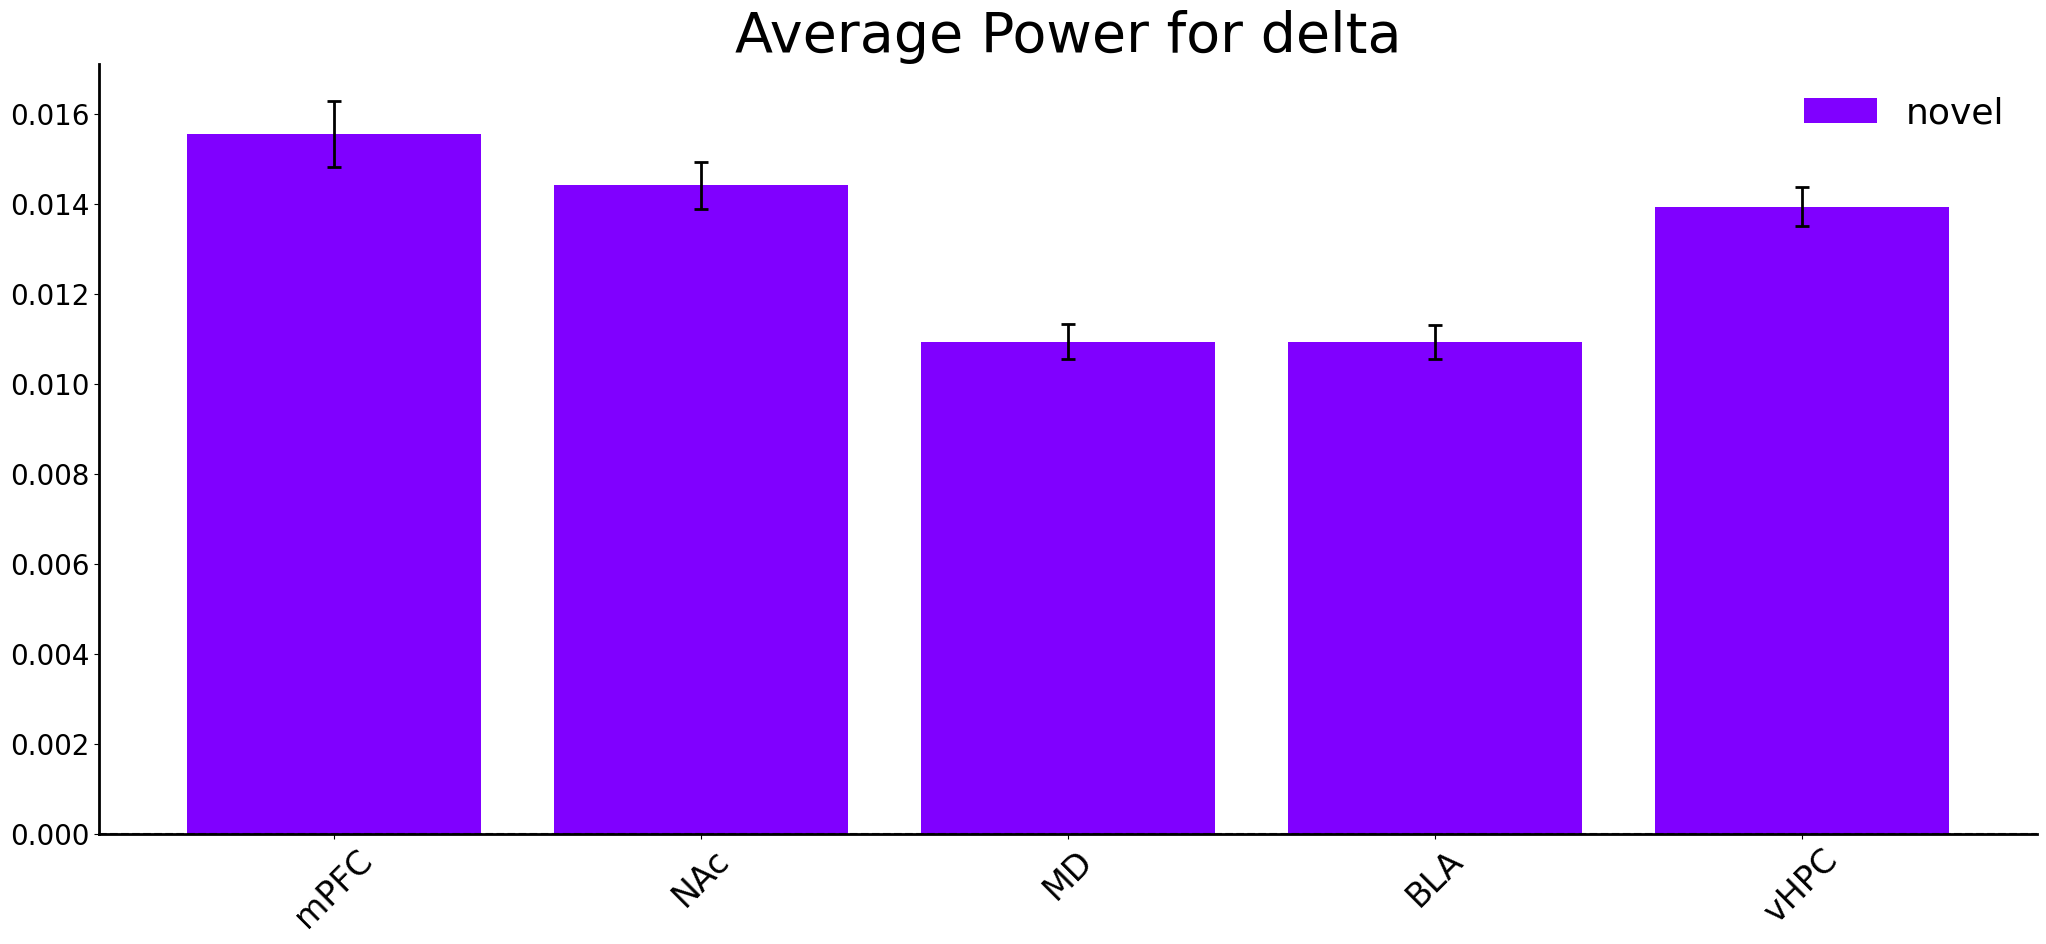

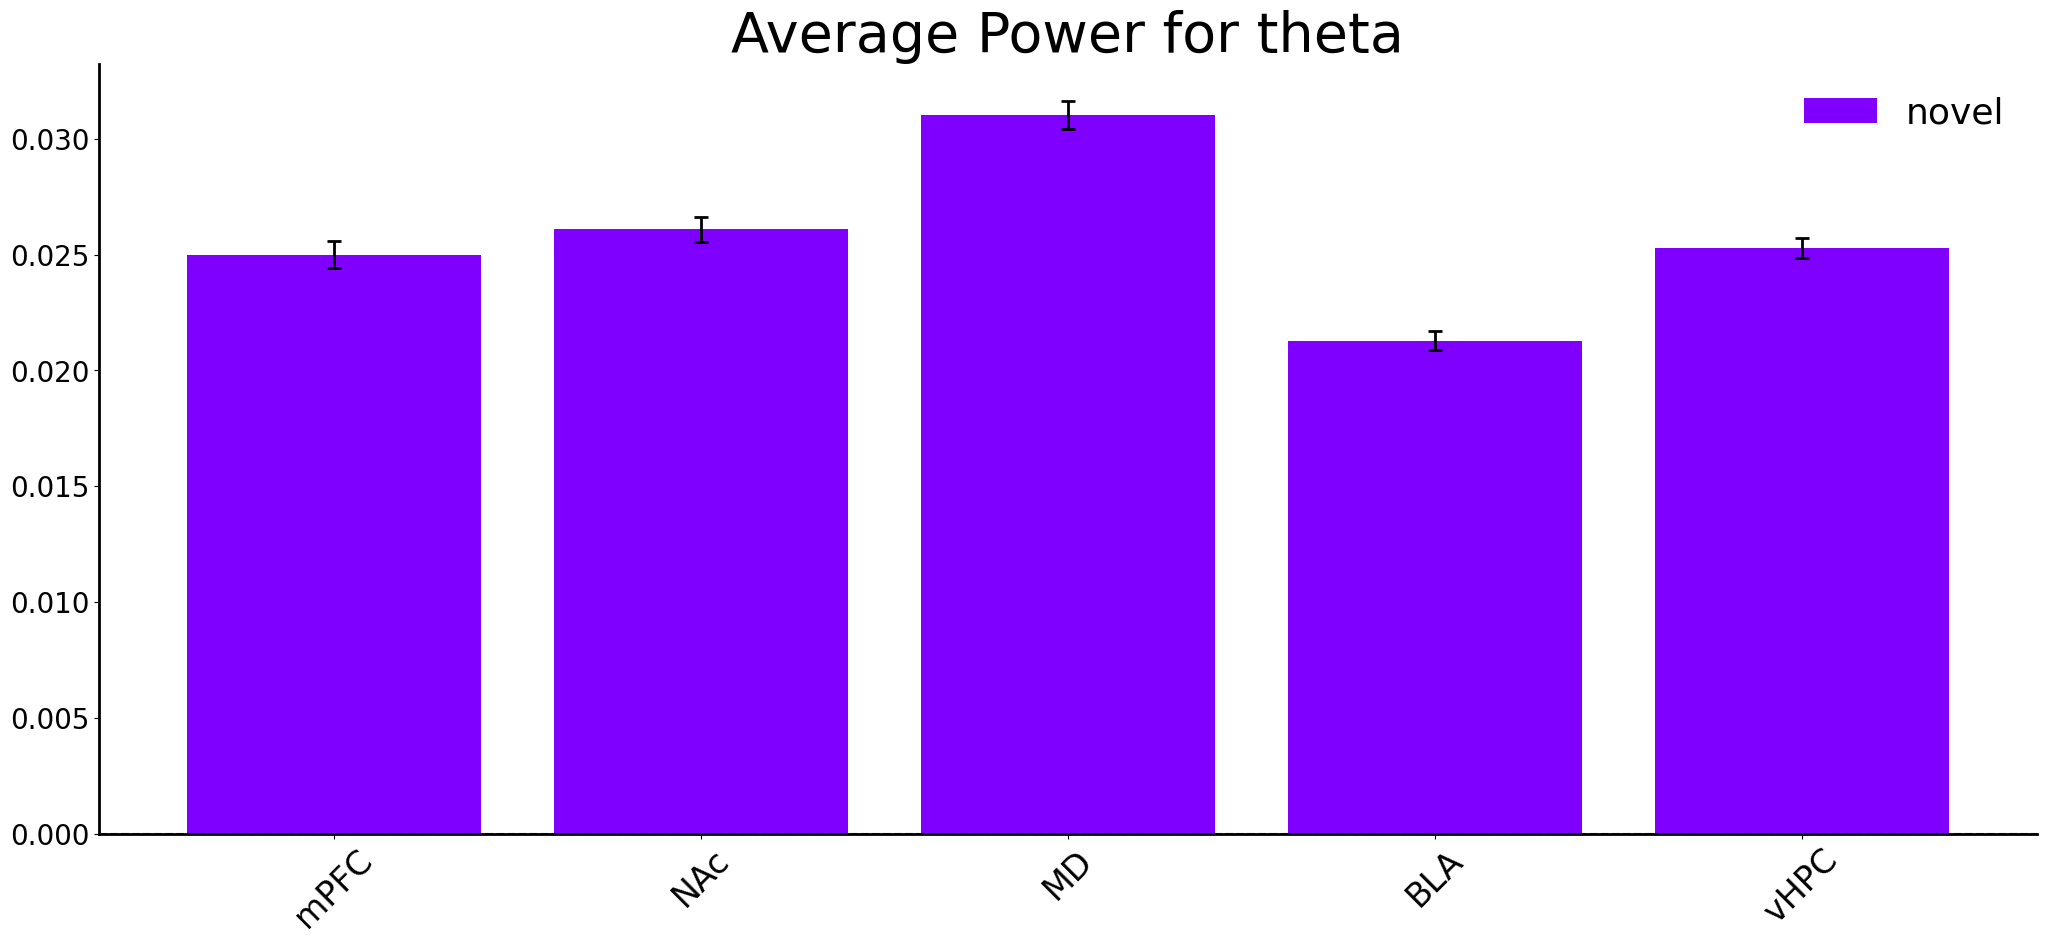

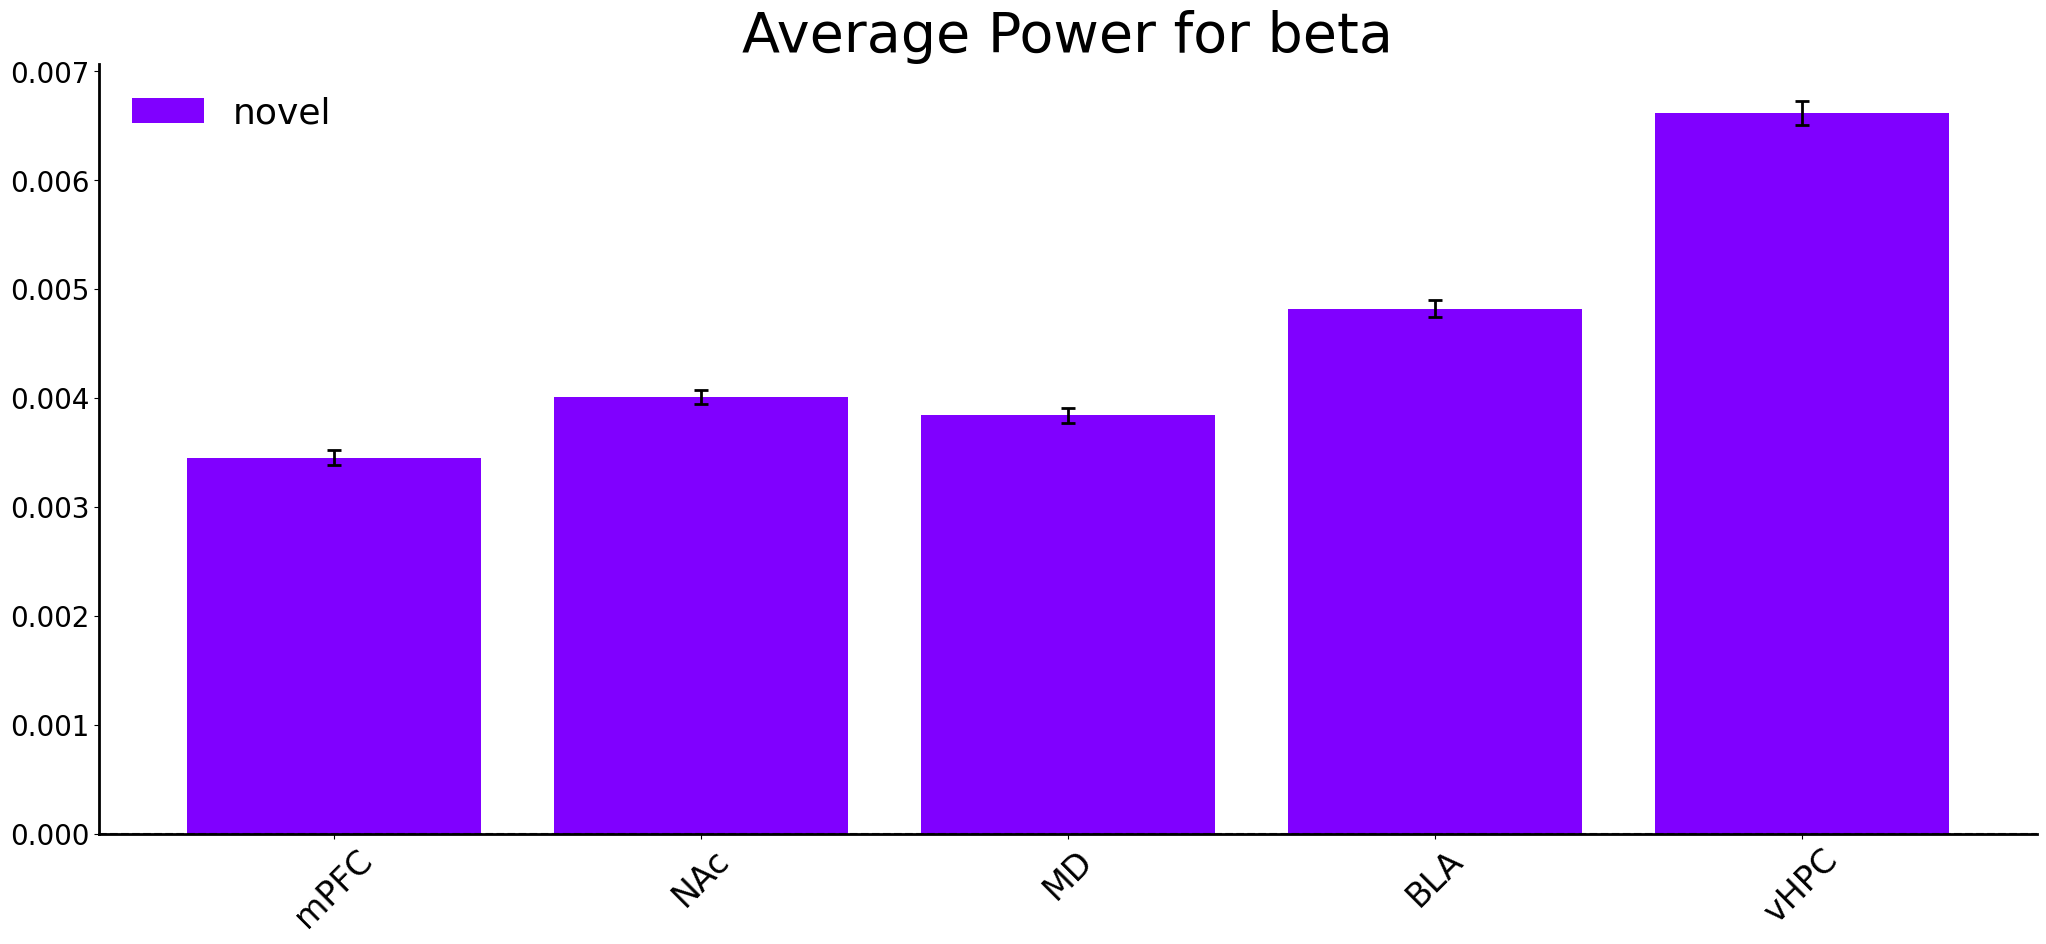

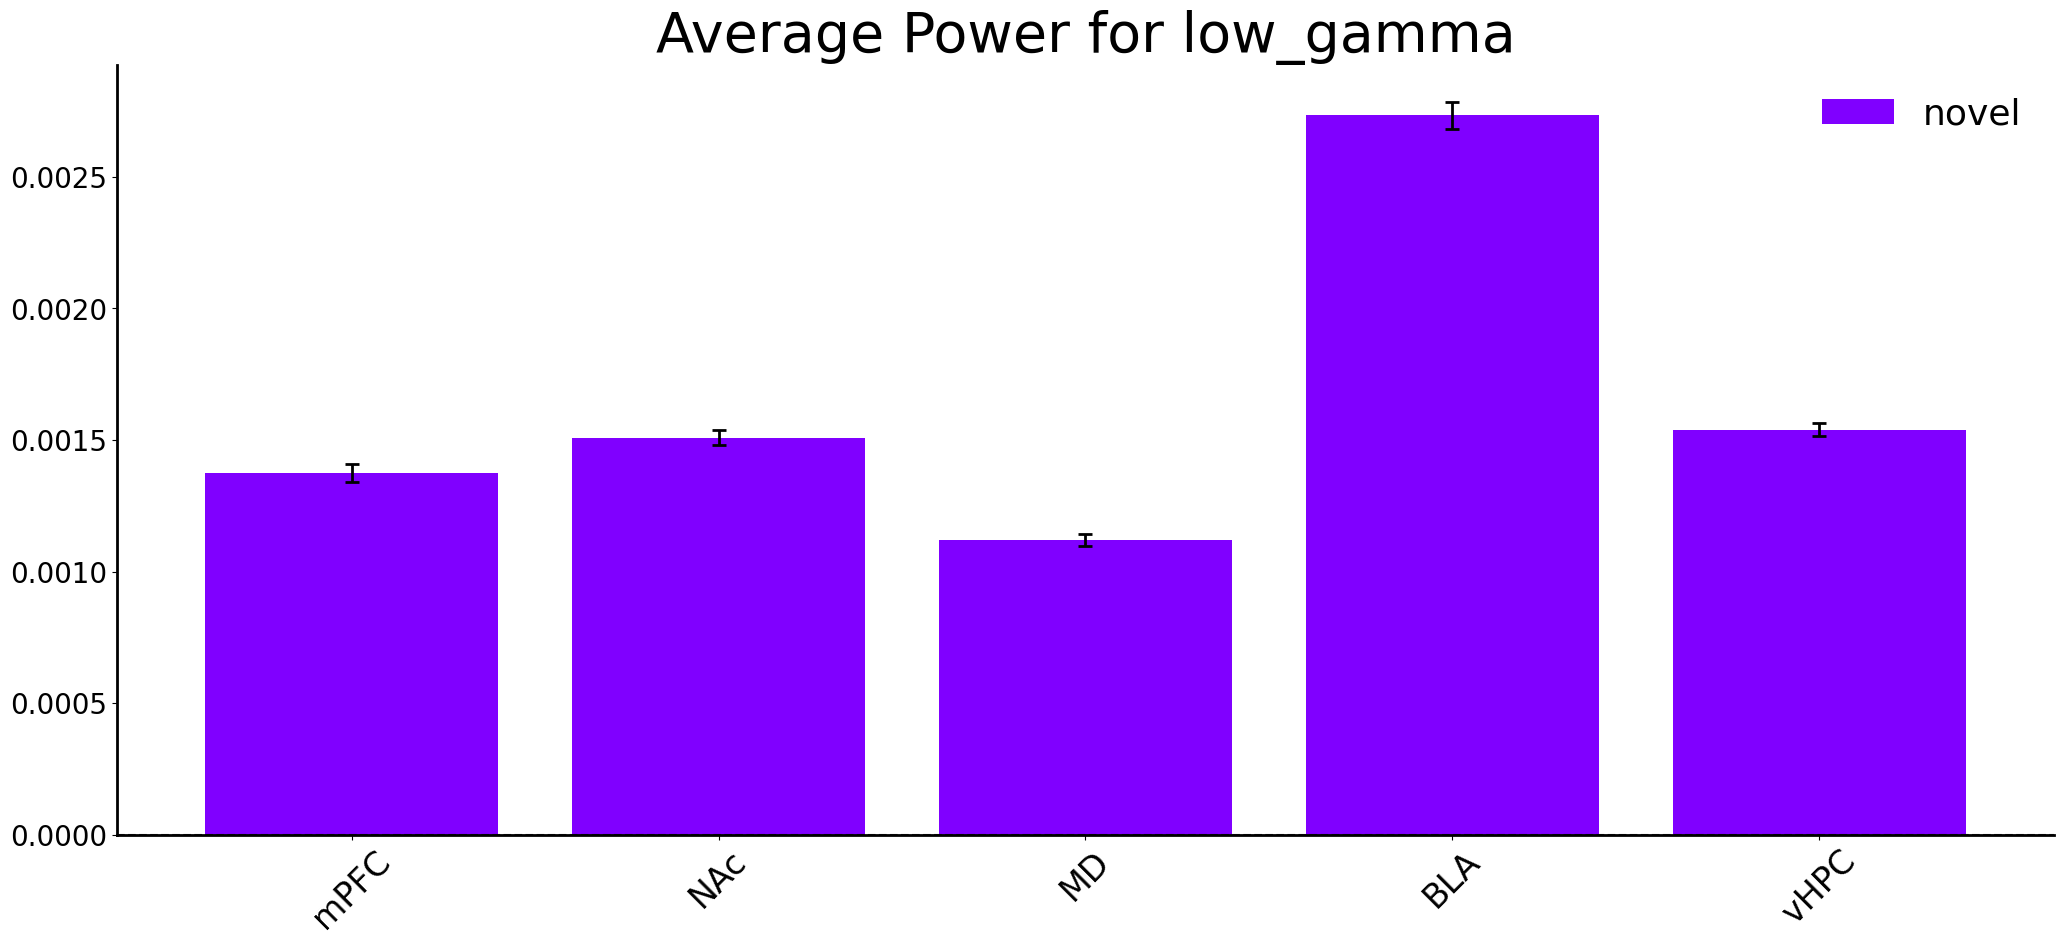

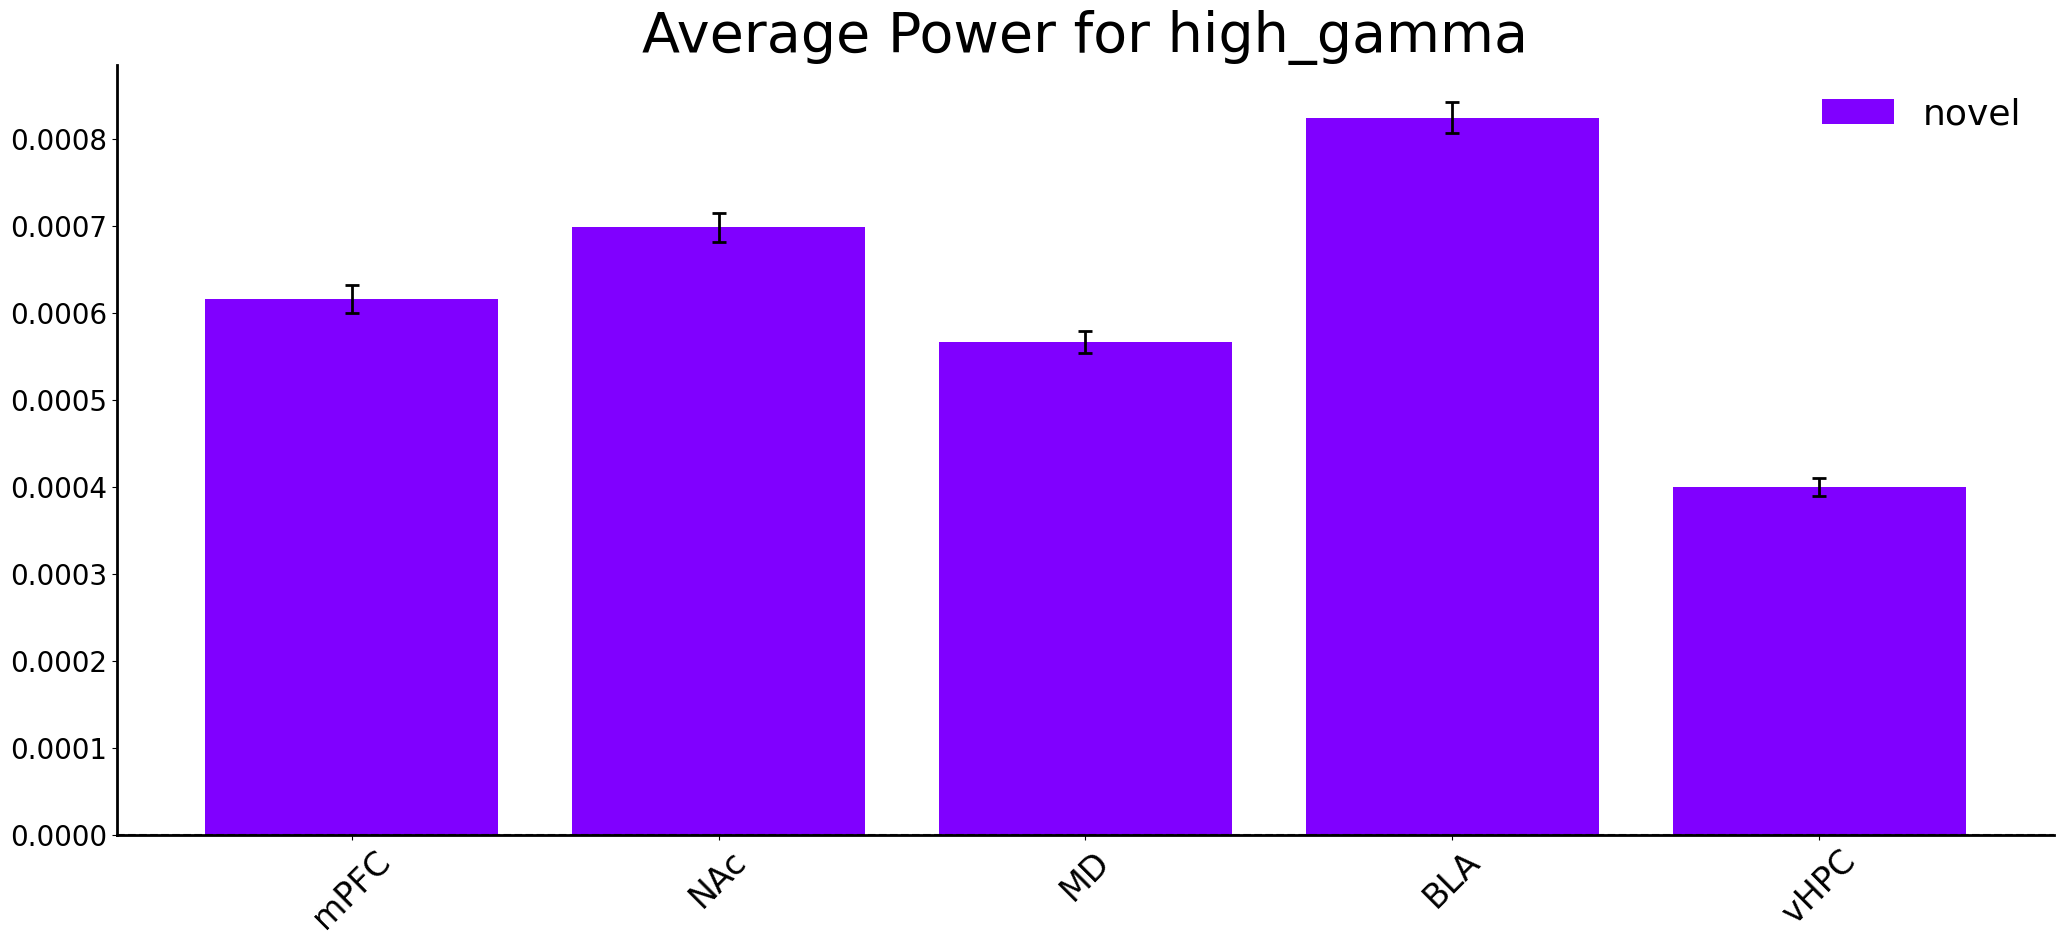

In [50]:
from scipy import stats
from matplotlib import cm

def plot_averages(powers, lfp_collection):
    events = powers.keys()
    [unflipped, flipped] = lfpa.band_calcs(powers)
    brain_regions = np.empty(len(lfp_collection.brain_region_dict.keys()), dtype="<U10")
    for i in range(len(lfp_collection.brain_region_dict.keys())):
        brain_regions[i] = lfp_collection.brain_region_dict.inverse[i]
    avg_values = {key: {subset: {event: [] for event in events} for subset in brain_regions} for key in flipped.keys()}
    sem_values = {key: {subset: {event: [] for event in events} for subset in brain_regions} for key in flipped.keys()}
    for key in flipped.keys():
        for i, subset in enumerate(brain_regions):
            for event in powers.keys():
                avg_values[key][subset][event] = np.nanmean(flipped[key][event][:, i])
                sem_values[key][subset][event] = stats.sem(flipped[key][event][:, i], nan_policy="omit")

    # Adjust bar width and spacing based on number of events
    total_width = 0.8  # Total width available for each group of bars
    bar_width = total_width / len(events)  # Width of each bar
    col = cm.rainbow(np.linspace(0, 1, len(events)))

    # Spacing between groups of bars
    group_spacing = 1  # Increased for better separation between brain regions

    sorted_avg_values = {key: {subset: avg_values[key][subset] for subset in brain_regions} for key in flipped.keys()}
    sorted_sem_values = {key: {subset: sem_values[key][subset] for subset in brain_regions} for key in flipped.keys()}

    # Create a separate plot for each key
    for key in flipped.keys():
        plt.figure(figsize=(25, 10))
        x = np.arange(len(brain_regions)) * group_spacing  # x-axis positions for subsets

        for i, subset in enumerate(brain_regions):
            for k, event in enumerate(events):
                # Center the group of bars and space them evenly
                center = x[i]
                offset = (k - (len(events) - 1) / 2) * bar_width
                position = center + offset

                plt.bar(
                    position,
                    sorted_avg_values[key][subset][event],
                    width=bar_width,
                    yerr=sorted_sem_values[key][subset][event],
                    capsize=5,
                    linewidth=2,
                    error_kw={"elinewidth": 2, "capthick": 2},
                    color=col[k],
                    label=event if i == 0 else "",
                )

        plt.yticks(fontsize=20)
        plt.xticks(x, brain_regions, fontsize=24, rotation=45)
        plt.axhline(y=0, color="black", linestyle="--", alpha=0.8)
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.gca().spines["bottom"].set_linewidth(2)
        plt.gca().spines["left"].set_linewidth(2)
        plt.title(f"Average Power for {key}", fontsize=40)
        plt.legend(fontsize=26, frameon=False)
        plt.subplots_adjust(hspace=0.5)
        plt.show()
        
plot_averages(cagemate_power_averages, cagemate_collection)

/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:382: RuntimeWarning: Mean of empty slice
  calculations = np.array(calculations)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:383: RuntimeWarning: Mean of empty slice
  # calculations = [trials, frequencies, brain regions]
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:385: RuntimeWarning: Mean of empty slice
  theta = np.nanmean(calculations[:, 4:13, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:387: RuntimeWarning: Mean of empty slice
  beta = np.nanmean(calculations[:, 13:31, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:389: RuntimeWarning: Mean of empty slice
  low_gamma = np.nanmean(calculations[:, 31:71, ...], axis=1)


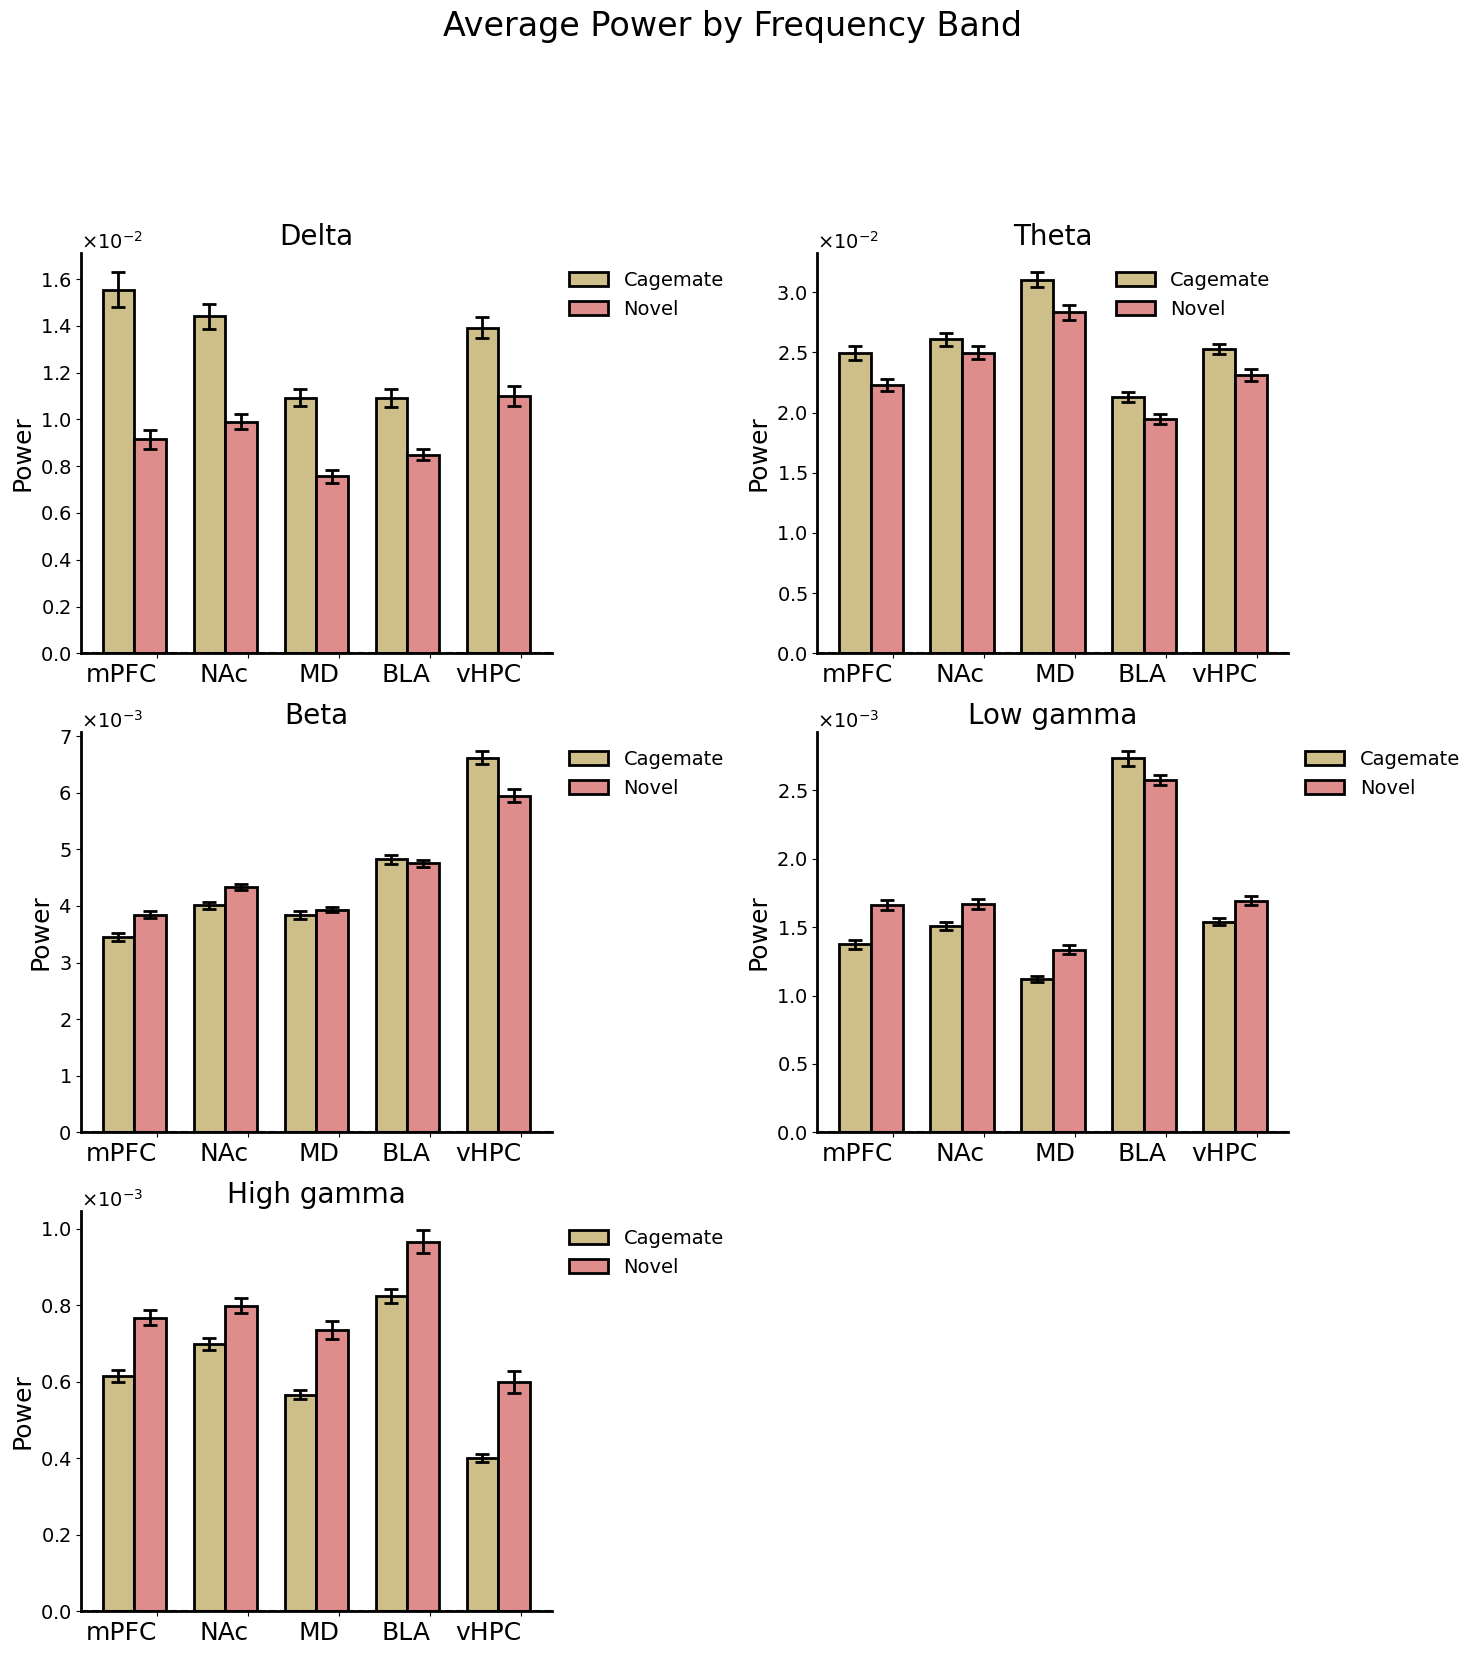

In [133]:
from matplotlib.ticker import ScalarFormatter
def plot_averages(power_dict, lfp_collection,colors, bar_width = None):
    # Get the single event (assuming one event in all conditions)
    first_condition = list(power_dict.keys())[0]
    #event = list(power_dict[first_condition].keys())[0]
   
    # Process data for each condition
    condition_data = {}
    for condition, powers in power_dict.items():
        [unflipped, flipped] = lfpa.band_calcs(powers)
        brain_regions = np.empty(len(lfp_collection.brain_region_dict.keys()), dtype="<U10")
        for i in range(len(lfp_collection.brain_region_dict.keys())):
            brain_regions[i] = lfp_collection.brain_region_dict.inverse[i]
            
        avg_values = {key: {subset: [] for subset in brain_regions} for key in flipped.keys()}
        sem_values = {key: {subset: [] for subset in brain_regions} for key in flipped.keys()}
    
        event = list(unflipped.keys())[0]
        
        for key in flipped.keys():
            for i, subset in enumerate(brain_regions):
                avg_values[key][subset] = np.nanmean(flipped[key][event][:, i])
                sem_values[key][subset] = stats.sem(flipped[key][event][:, i], nan_policy="omit")
                    
        condition_data[condition] = {'avg': avg_values, 'sem': sem_values}
    
    # Plotting
    # Calculate number of subplots needed (one per frequency band)
    freq_bands = list(flipped.keys())
    n_bands = len(freq_bands)
    n_rows = (n_bands + 1) // 2  # 2 plots per row, rounded up
    
    
   
    
    # Plotting parameters
    if bar_width is None:
        bar_width = 0.35
    conditions = list(power_dict.keys())
    fig, axs = plt.subplots(n_rows, 2, figsize=(7.5*len(conditions), 5*n_rows))
    fig.suptitle(f"Average Power by Frequency Band", fontsize=24, y = 1.1)
    axs = axs.ravel()  # Flatten axes array for easier indexing
    for i, band in enumerate(freq_bands):
        ax = axs[i]
        x = np.arange(len(brain_regions))
        
        for j, condition in enumerate(conditions):
            positions = x + (j - len(conditions)/2 + 0.5) * bar_width
            ax.bar(positions,
                  [condition_data[condition]['avg'][band][region] for region in brain_regions],
                  width=bar_width,
                  yerr=[condition_data[condition]['sem'][band][region] for region in brain_regions],
                  capsize=5,
                  linewidth=2,
                  error_kw={"elinewidth": 2, "capthick": 2},
                  label=condition,
                  color=colors[j],
                  edgecolor = 'black')  # Add hatching for second condition
        
        ax.set_title(band, fontsize=20)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_linewidth(2)
        ax.spines['left'].set_linewidth(2)
        ax.axhline(y=0, color="black", linestyle="--", alpha=0.8)
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.set_xticks(x+.25)
        ax.set_xticklabels(brain_regions, rotation=0, ha='right', fontsize = 18)
        ax.set_ylabel('Power', fontsize = 18)
        #if i == 0:  # Add legend to first subplot
        ax.legend(fontsize=14, frameon=False, bbox_to_anchor = (1,1))
        ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        ax.yaxis.get_offset_text().set_fontsize(14) 
    # Remove empty subplots
    for i in range(len(freq_bands), len(axs)):
        fig.delaxes(axs[i])
        
    plt.tight_layout()
    plt.show()
    
power_dict = {
    'Cagemate': cagemate_power_averages,
    'Novel': novel_power_averages
}
plot_averages(power_dict, cagemate_collection, colors = ['#CDBE8A','#DF8C8C'] )

In [69]:
novel_coherences = lfpa.average_events(novel_collection, events = ['novel'], mode = 'coherence', plot = False)
cagemate_coherences = lfpa.average_events(cagemate_collection, events = ['novel'], mode = 'coherence', plot = False)

/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:126: RuntimeWarning: Mean of empty slice
  event_average = np.nanmean(event_snippet, axis=0)


/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:382: RuntimeWarning: Mean of empty slice
  calculations = np.array(calculations)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:383: RuntimeWarning: Mean of empty slice
  # calculations = [trials, frequencies, brain regions]
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:385: RuntimeWarning: Mean of empty slice
  theta = np.nanmean(calculations[:, 4:13, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:387: RuntimeWarning: Mean of empty slice
  beta = np.nanmean(calculations[:, 13:31, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:389: RuntimeWarning: Mean of empty slice
  low_gamma = np.nanmean(calculations[:, 31:71, ...], axis=1)


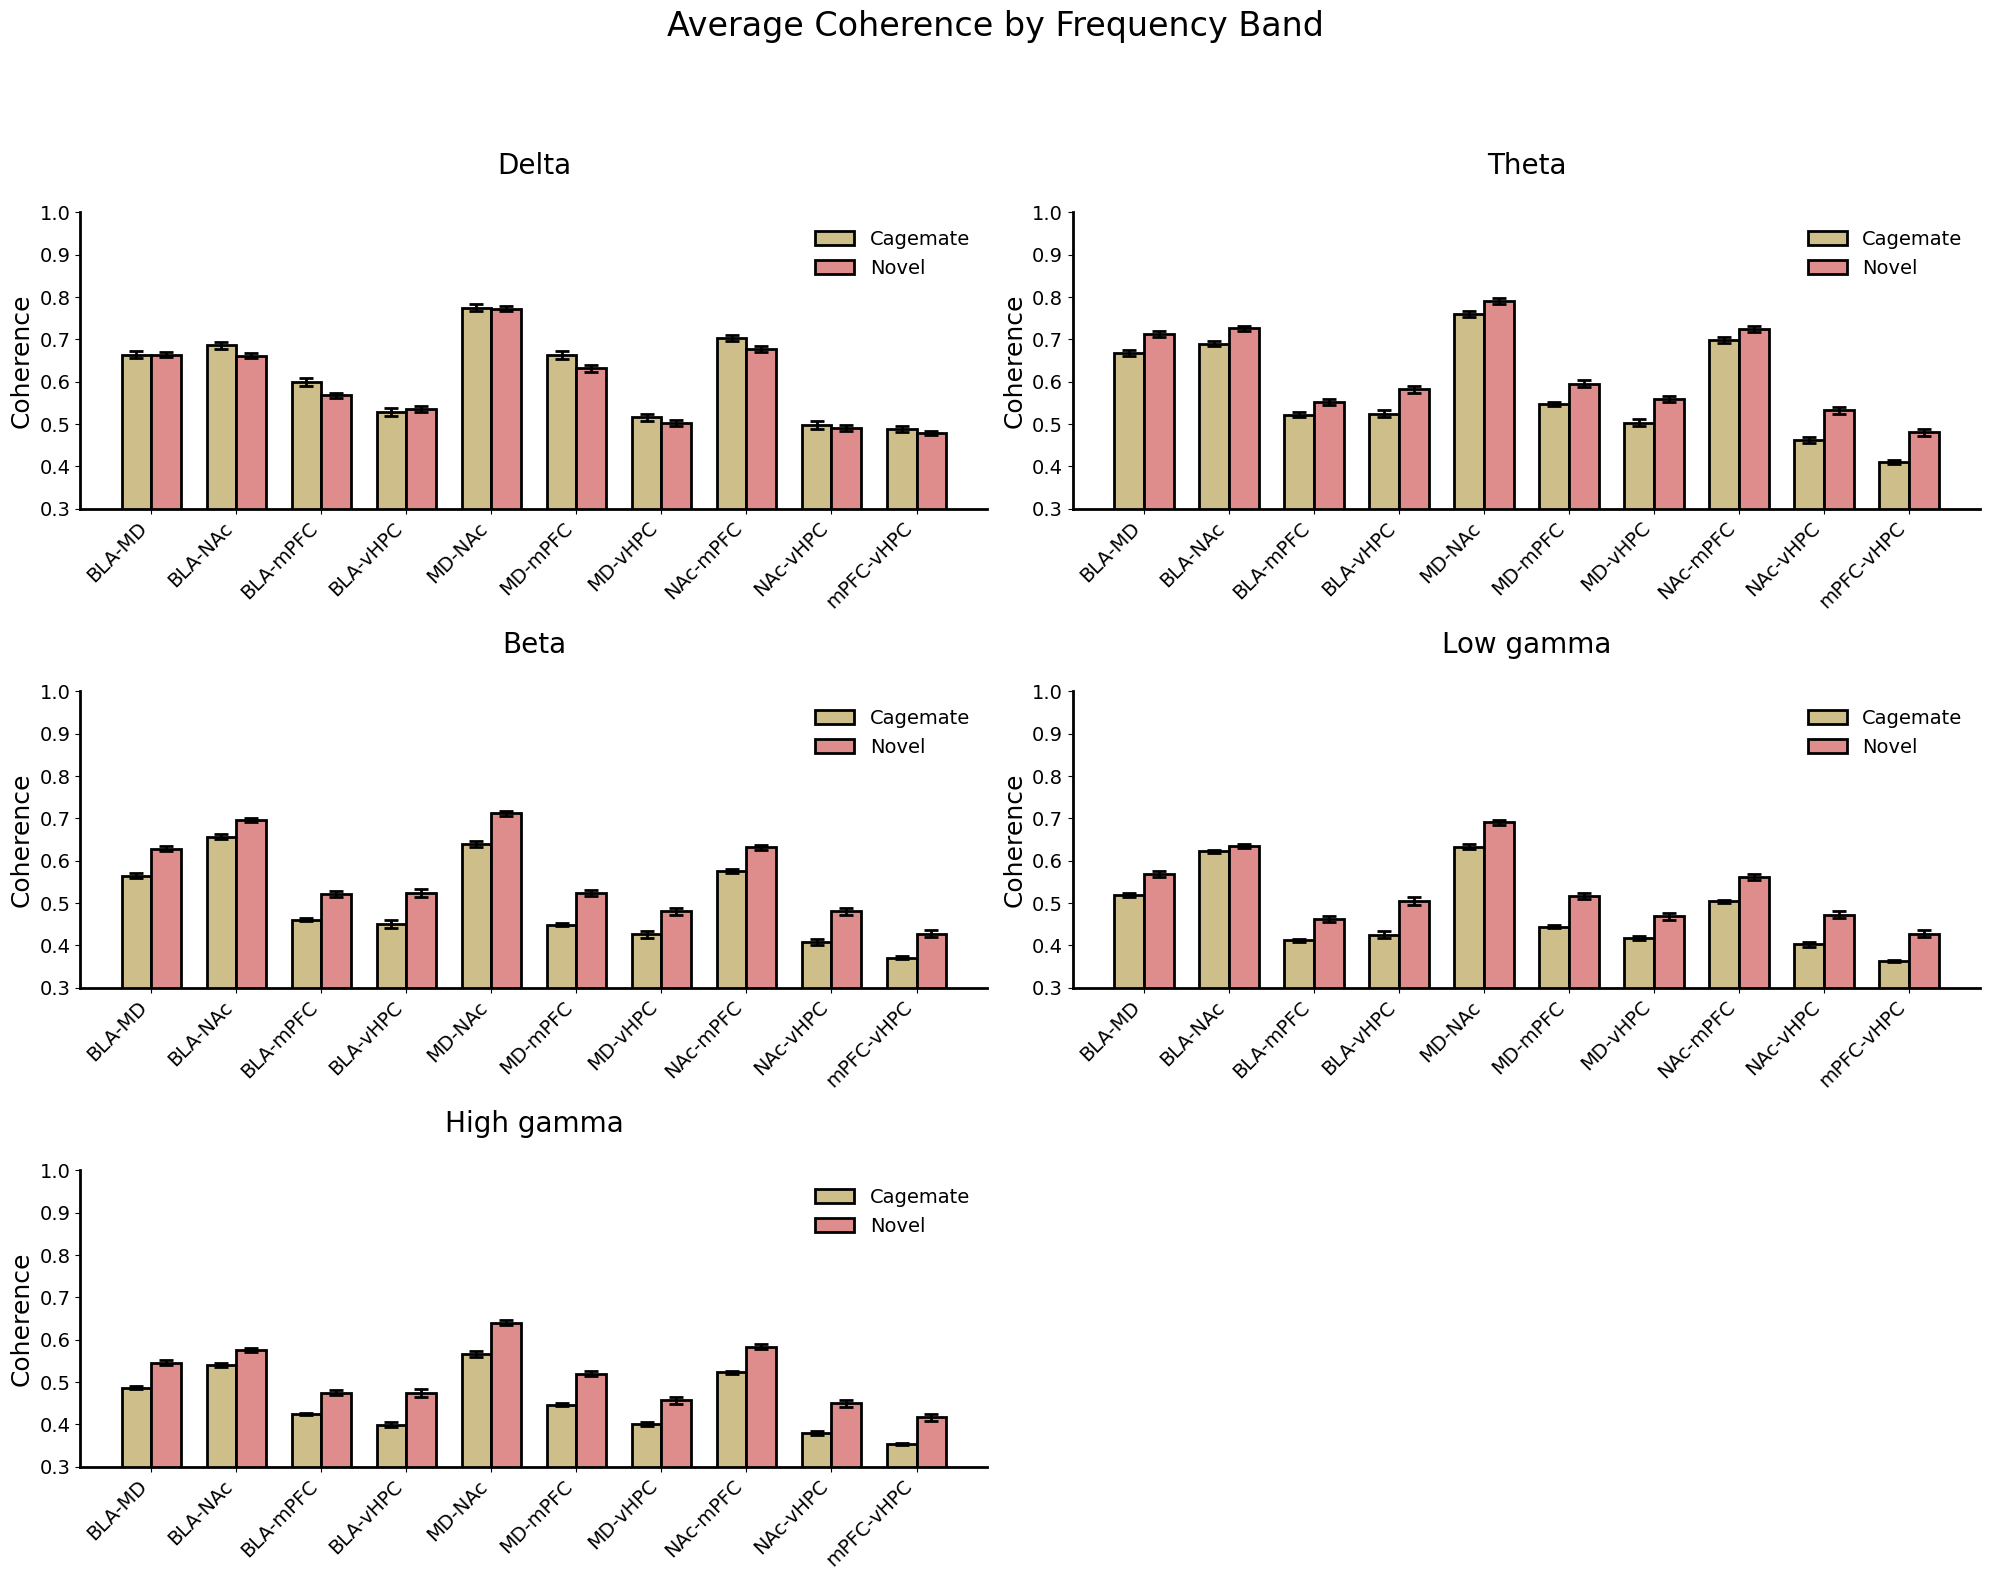

In [158]:
from itertools import combinations

def plot_coherence_bar(coherence_dict, lfp_collection, colors, bar_width = None):
    # Get the single event (assuming one event in all conditions)
    first_condition = list(coherence_dict.keys())[0]
    event = list(coherence_dict[first_condition].keys())[0]
    
    # Get brain region pairs
    region_dict = lfp_collection.brain_region_dict
    brain_regions = list(combinations(list((region_dict.keys())), 2))
    
    # Process data for each condition
    condition_data = {}
    for condition, coherences in coherence_dict.items():
        [unflipped, flipped] = lfpa.band_calcs(coherences)
        
        avg_values = {key: {subset: [] for subset in brain_regions} for key in flipped.keys()}
        sem_values = {key: {subset: [] for subset in brain_regions} for key in flipped.keys()}
        event = list(unflipped.keys())[0]
        
        for key in flipped.keys():
            for i, subset in enumerate(brain_regions):
                pair_index_1 = region_dict[brain_regions[i][0]]
                pair_index_2 = region_dict[brain_regions[i][1]]
                avg_values[key][subset] = np.nanmean(flipped[key][event][:, pair_index_1, pair_index_2])
                sem_values[key][subset] = stats.sem(
                    flipped[key][event][:, pair_index_1, pair_index_2], 
                    nan_policy="omit"
                )
                    
        condition_data[condition] = {'avg': avg_values, 'sem': sem_values}
    
    # Plotting
    # Calculate number of subplots needed (one per frequency band)
    freq_bands = list(flipped.keys())
    n_bands = len(freq_bands)
    n_rows = (n_bands + 1) // 2  # 2 plots per row, rounded up
    conditions = list(coherence_dict.keys())
    fig, axs = plt.subplots(n_rows, 2, figsize=(10*len(conditions), 5*n_rows))
    fig.suptitle(f"Average Coherence by Frequency Band", fontsize=24, y =1.05)
    axs = axs.ravel()  # Flatten axes array for easier indexing
    
    # Plotting parameters
    if bar_width is None:
        bar_width = 0.35
    
    
    for i, band in enumerate(freq_bands):
        ax = axs[i]
        x = np.arange(len(brain_regions))
        
        for j, condition in enumerate(conditions):
            positions = x + (j - len(conditions)/2 + 0.5) * bar_width
            ax.bar(positions,
                  [condition_data[condition]['avg'][band][region] for region in brain_regions],
                  width=bar_width,
                  yerr=[condition_data[condition]['sem'][band][region] for region in brain_regions],
                  capsize=5,
                  linewidth=2,
                  error_kw={"elinewidth": 2, "capthick": 2},
                  label=condition,
                  color=colors[j],
                  edgecolor = 'black')  # Add hatching for second condition
        
        ax.set_title(band, fontsize=20, y = 1.1)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_linewidth(2)
        ax.spines['left'].set_linewidth(2)
        ax.axhline(y=0, color="black", linestyle="--", alpha=0.8)
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.set_xticks(x)
        # Format brain region pair labels
        region_labels = [f"{pair[0]}-{pair[1]}" for pair in brain_regions]
        ax.set_xticklabels(region_labels, rotation=45, ha='right')
        
        #if i == 0:  # Add legend to first subplot
        ax.legend(fontsize=14, frameon=False, bbox_to_anchor=(1,1))
            
        ax.set_ylabel("Coherence", fontsize = 18)
        ax.set_ylim(.3,1)
    # Remove empty subplots
    for i in range(len(freq_bands), len(axs)):
        fig.delaxes(axs[i])
        
    plt.tight_layout()
    plt.show()

# Usage example:
coherence_dict = {
    'Cagemate': cagemate_coherences,
    'Novel': novel_coherences
}
plot_coherence_bar(coherence_dict, cagemate_collection,  colors = ['#CDBE8A','#DF8C8C'] )

/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:126: RuntimeWarning: Mean of empty slice
  event_average = np.nanmean(event_snippet, axis=0)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:382: RuntimeWarning: Mean of empty slice
  calculations = np.array(calculations)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:383: RuntimeWarning: Mean of empty slice
  # calculations = [trials, frequencies, brain regions]
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:385: RuntimeWarning: Mean of empty slice
  theta = np.nanmean(calculations[:, 4:13, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:387: RuntimeWarning: Mean of empty slice
  beta = np.nanmean(calculations[:, 13:31, ...], axis=1)
/blue/npadill

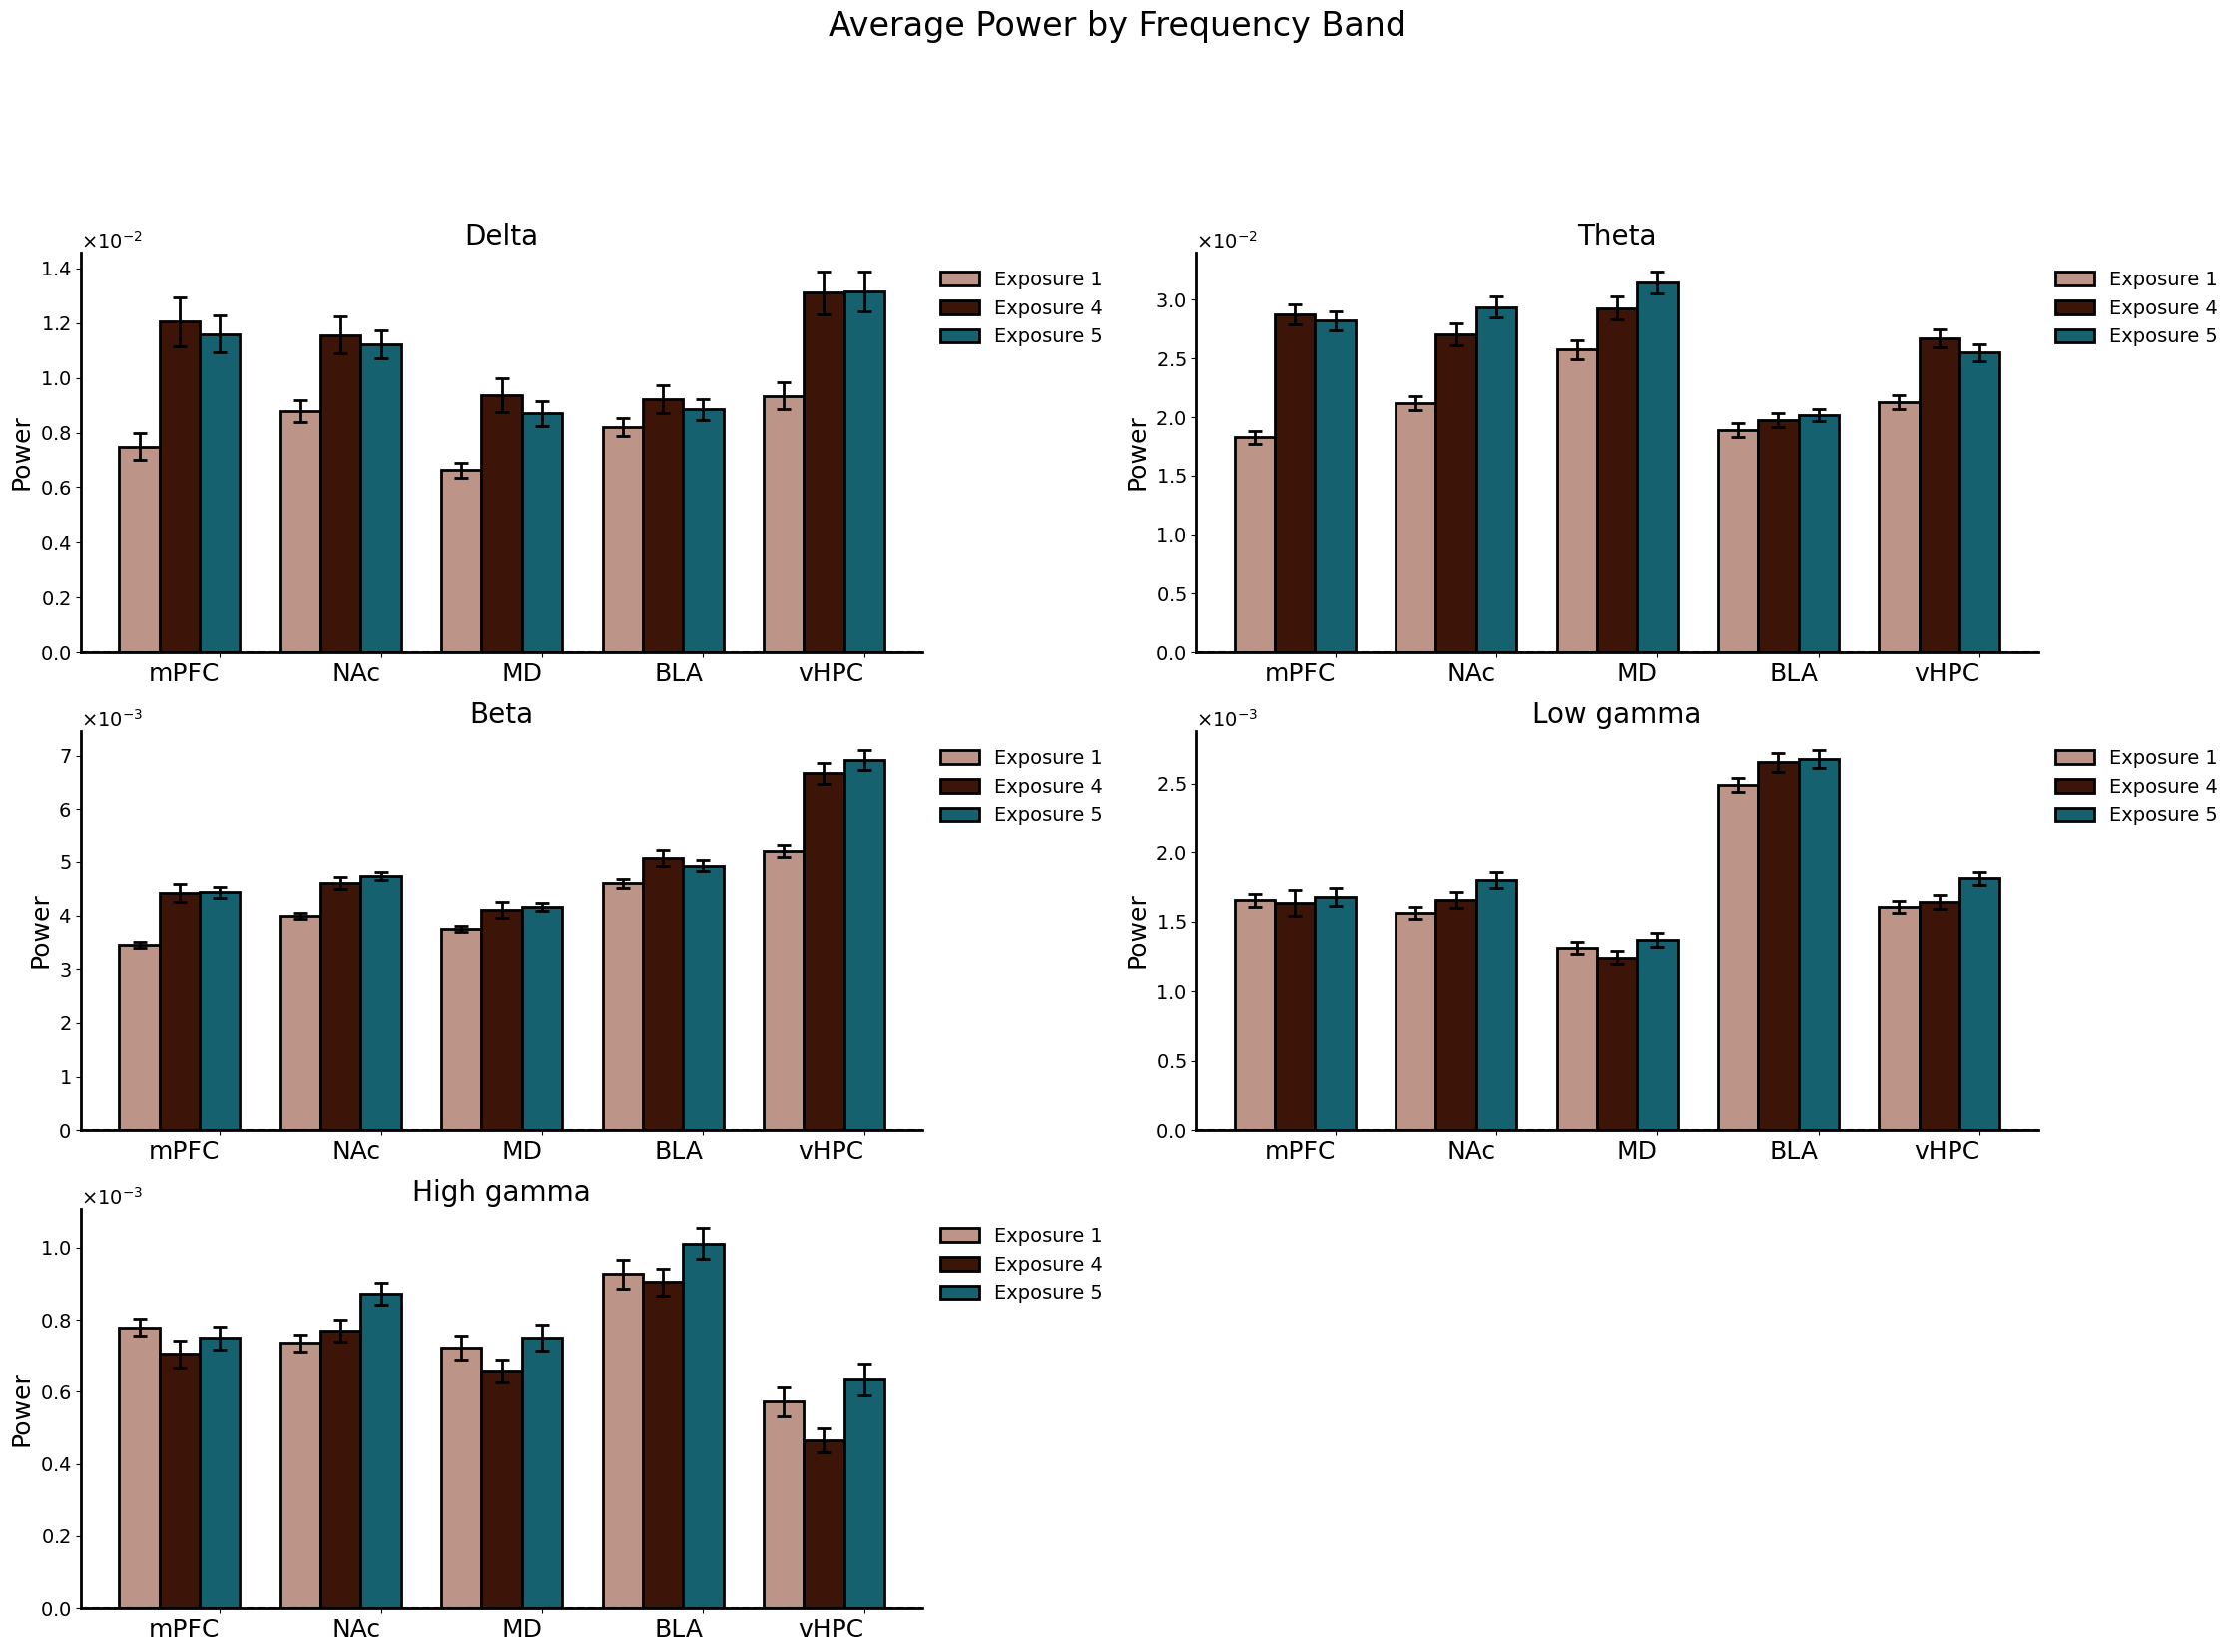

In [139]:
novel_power_1 = lfpa.average_events(novel_collection, events = ['exp1'], mode = 'power', plot = False)
novel_power_4 = lfpa.average_events(novel_collection, events = ['exp4'], mode = 'power', plot = False)
novel_power_5 = lfpa.average_events(novel_collection, events = ['exp5'], mode = 'power', plot = False)
plot_averages({'Exposure 1':novel_power_1, 'Exposure 4':novel_power_4, 'Exposure 5':novel_power_5}, novel_collection, colors = ['#bc9488','#3c1508', '#15616F'], bar_width=0.25) 

/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:126: RuntimeWarning: Mean of empty slice
  event_average = np.nanmean(event_snippet, axis=0)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:382: RuntimeWarning: Mean of empty slice
  calculations = np.array(calculations)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:383: RuntimeWarning: Mean of empty slice
  # calculations = [trials, frequencies, brain regions]
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:385: RuntimeWarning: Mean of empty slice
  theta = np.nanmean(calculations[:, 4:13, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:387: RuntimeWarning: Mean of empty slice
  beta = np.nanmean(calculations[:, 13:31, ...], axis=1)
/blue/npadill

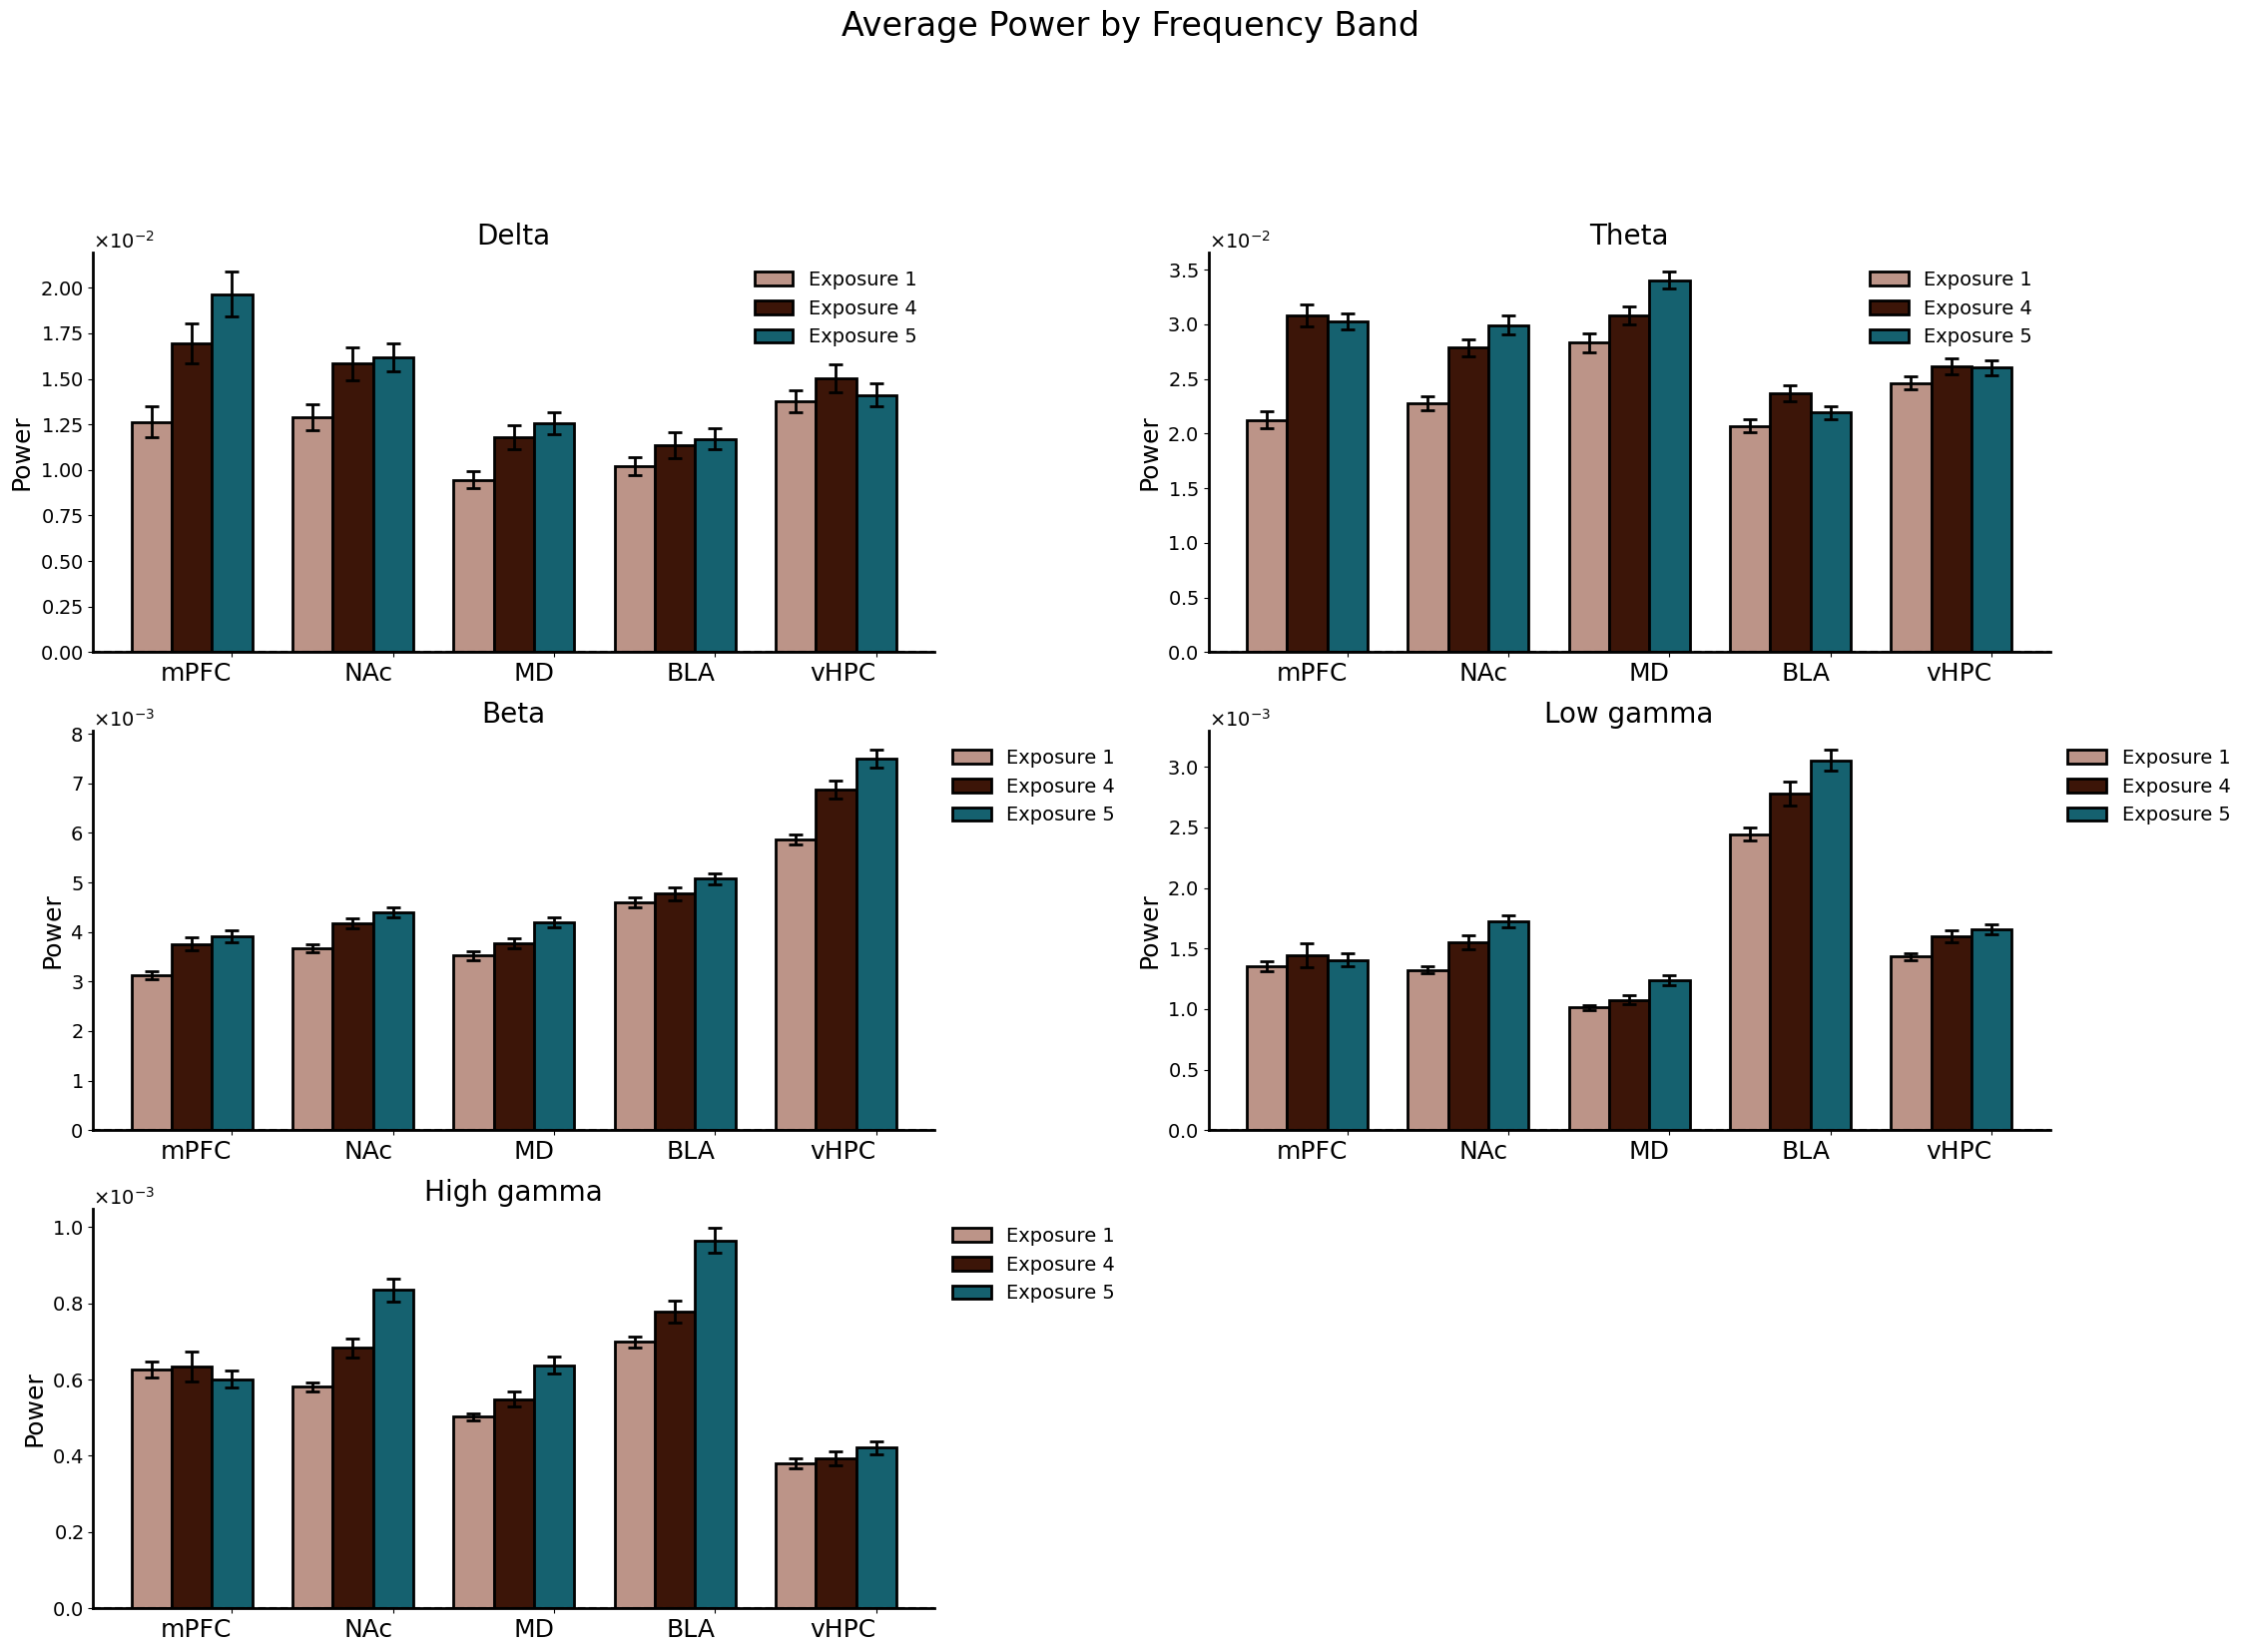

In [141]:
cagemate_power_1 = lfpa.average_events(cagemate_collection, events = ['exp1'], mode = 'power', plot = False)
cagemate_power_4 = lfpa.average_events(cagemate_collection, events = ['exp4'], mode = 'power', plot = False)
cagemate_power_5 =lfpa.average_events(cagemate_collection, events = ['exp5'], mode = 'power', plot = False)
plot_averages({'Exposure 1':cagemate_power_1, 'Exposure 4':cagemate_power_4, 'Exposure 5':cagemate_power_5}, cagemate_collection, colors = ['#bc9488','#3c1508', '#15616F'], bar_width=.25) 

/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:382: RuntimeWarning: Mean of empty slice
  calculations = np.array(calculations)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:383: RuntimeWarning: Mean of empty slice
  # calculations = [trials, frequencies, brain regions]
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:385: RuntimeWarning: Mean of empty slice
  theta = np.nanmean(calculations[:, 4:13, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:387: RuntimeWarning: Mean of empty slice
  beta = np.nanmean(calculations[:, 13:31, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:389: RuntimeWarning: Mean of empty slice
  low_gamma = np.nanmean(calculations[:, 31:71, ...], axis=1)


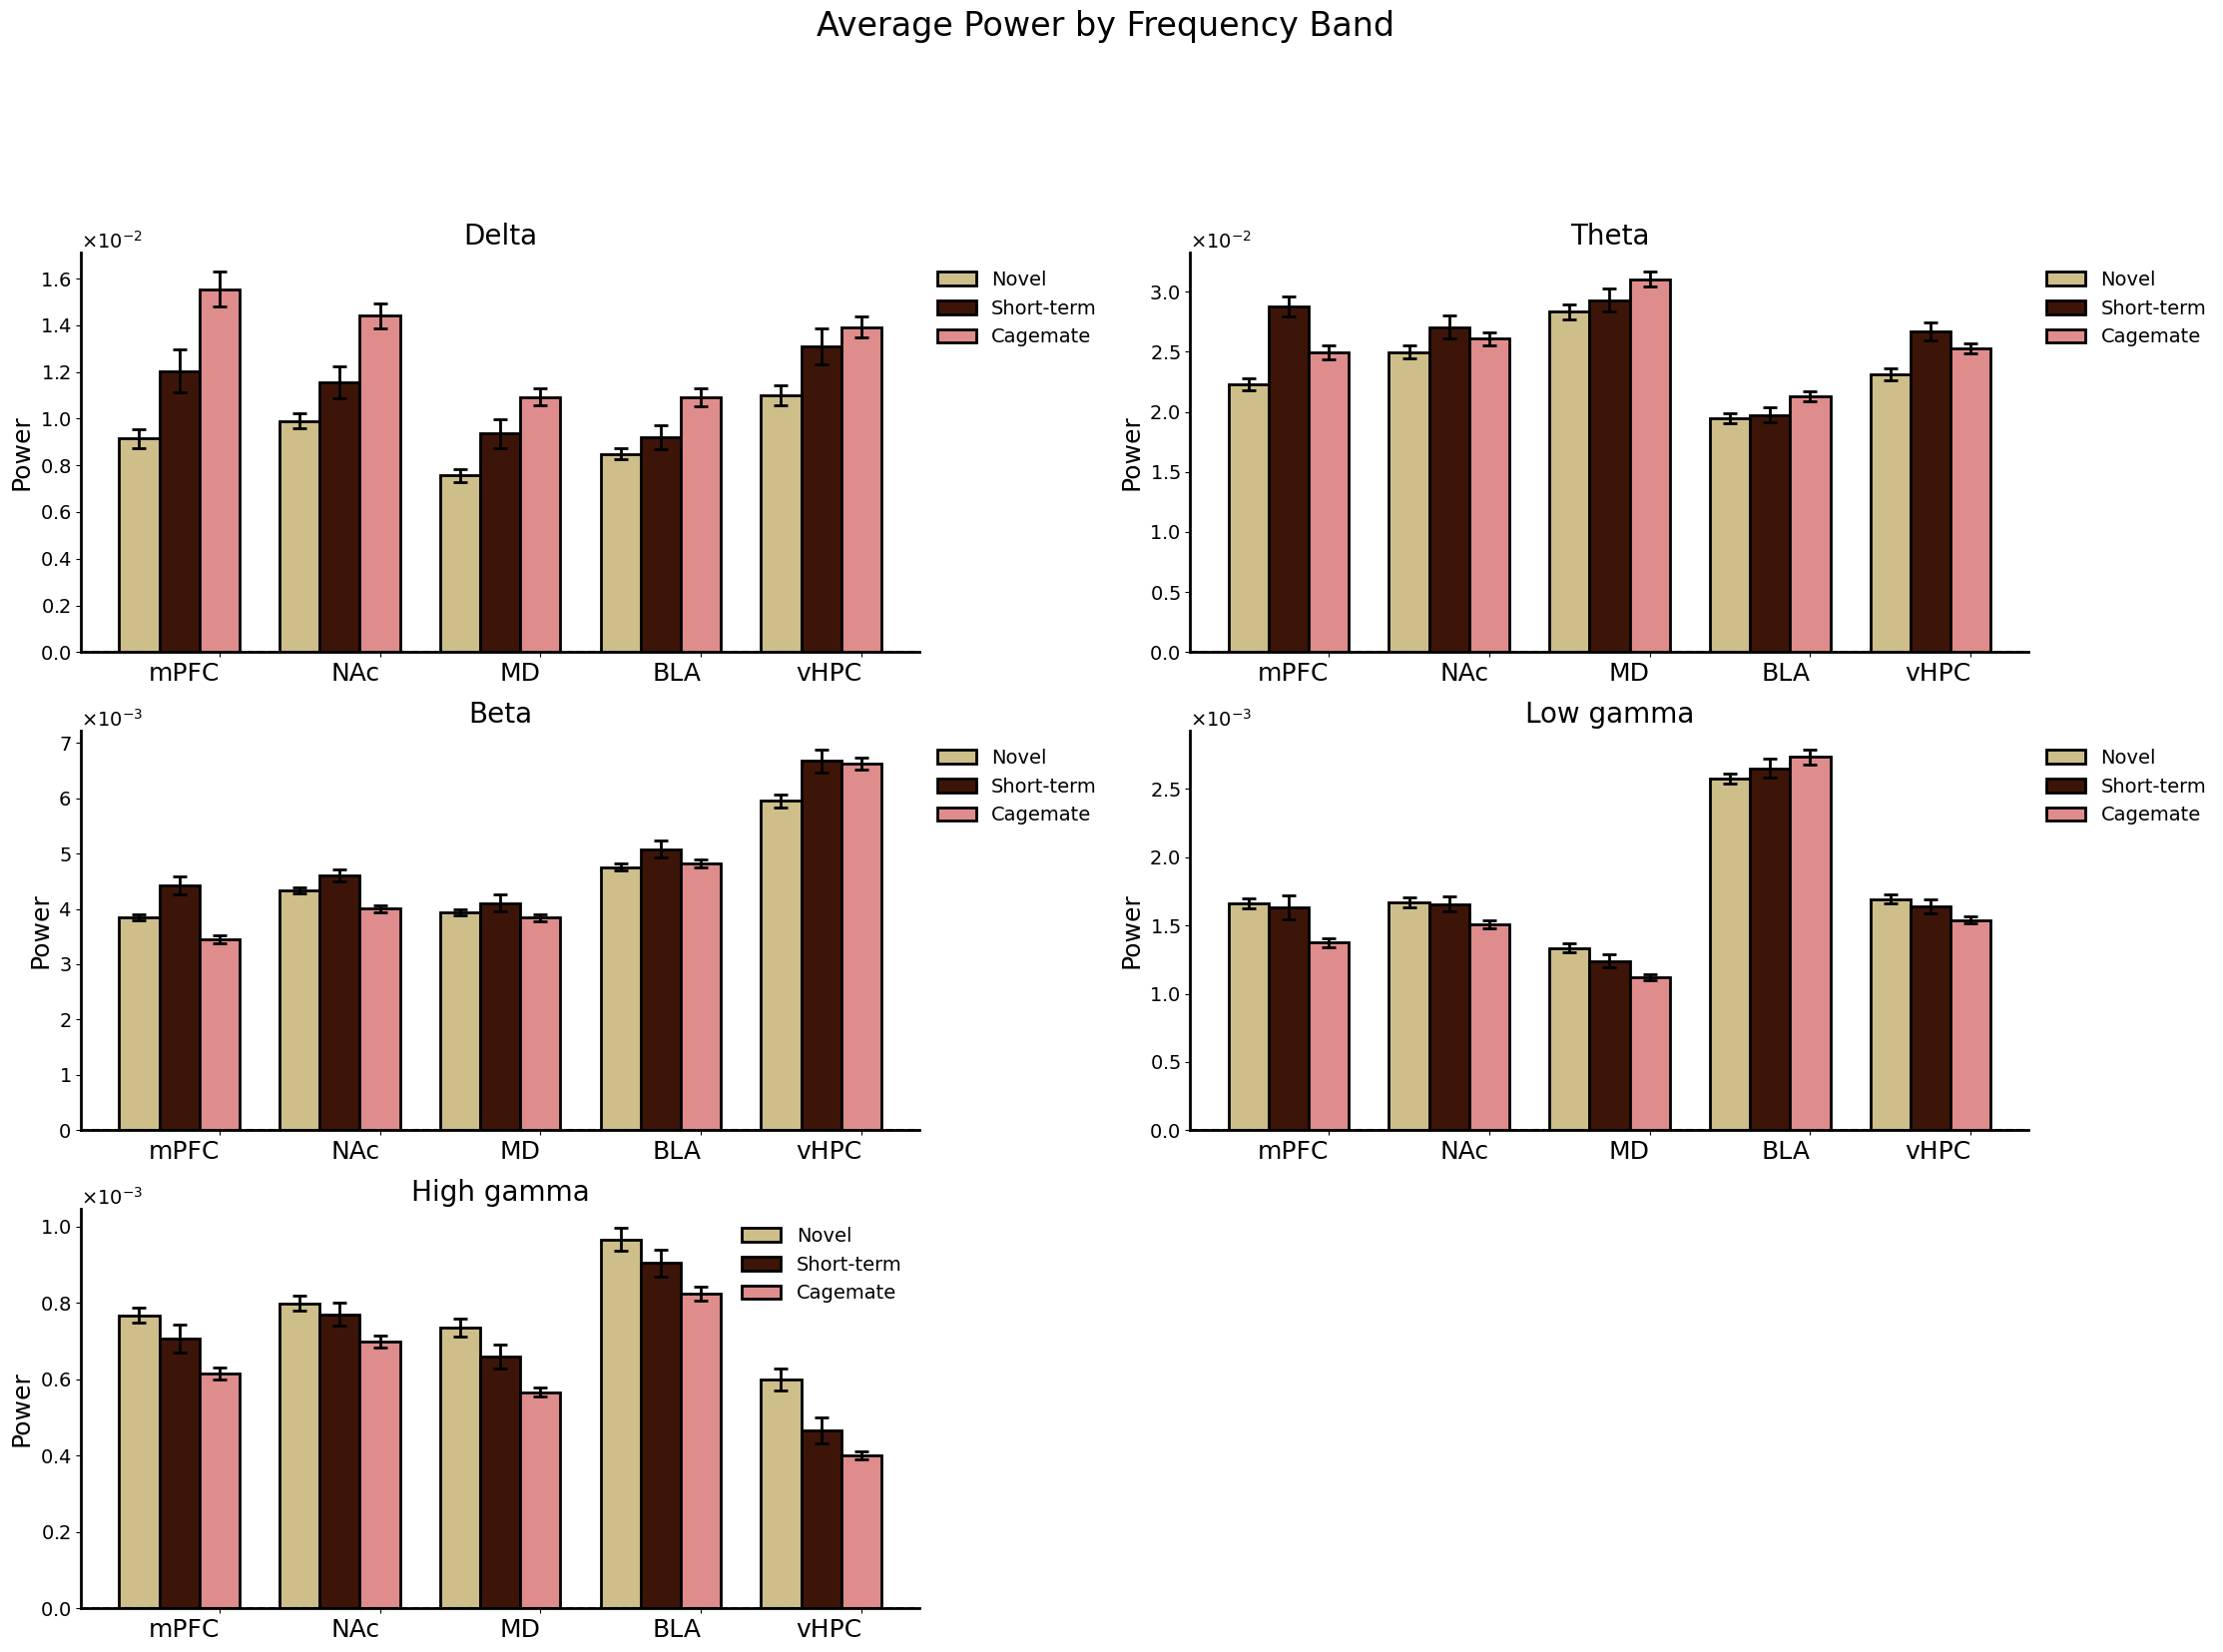

In [135]:
low_v_high = {'Novel': novel_power_averages,
    'Short-term': novel_power_4,
    'Cagemate': cagemate_power_averages}

colors = ['#CDBE8A','#3c1508', '#DF8C8C']
plot_averages(low_v_high, cagemate_collection, colors = colors, bar_width = 0.25) 

/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:126: RuntimeWarning: Mean of empty slice
  event_average = np.nanmean(event_snippet, axis=0)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:382: RuntimeWarning: Mean of empty slice
  calculations = np.array(calculations)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:383: RuntimeWarning: Mean of empty slice
  # calculations = [trials, frequencies, brain regions]
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:385: RuntimeWarning: Mean of empty slice
  theta = np.nanmean(calculations[:, 4:13, ...], axis=1)
/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys/lfp/lfp_analysis/LFP_analysis.py:387: RuntimeWarning: Mean of empty slice
  beta = np.nanmean(calculations[:, 13:31, ...], axis=1)
/blue/npadill

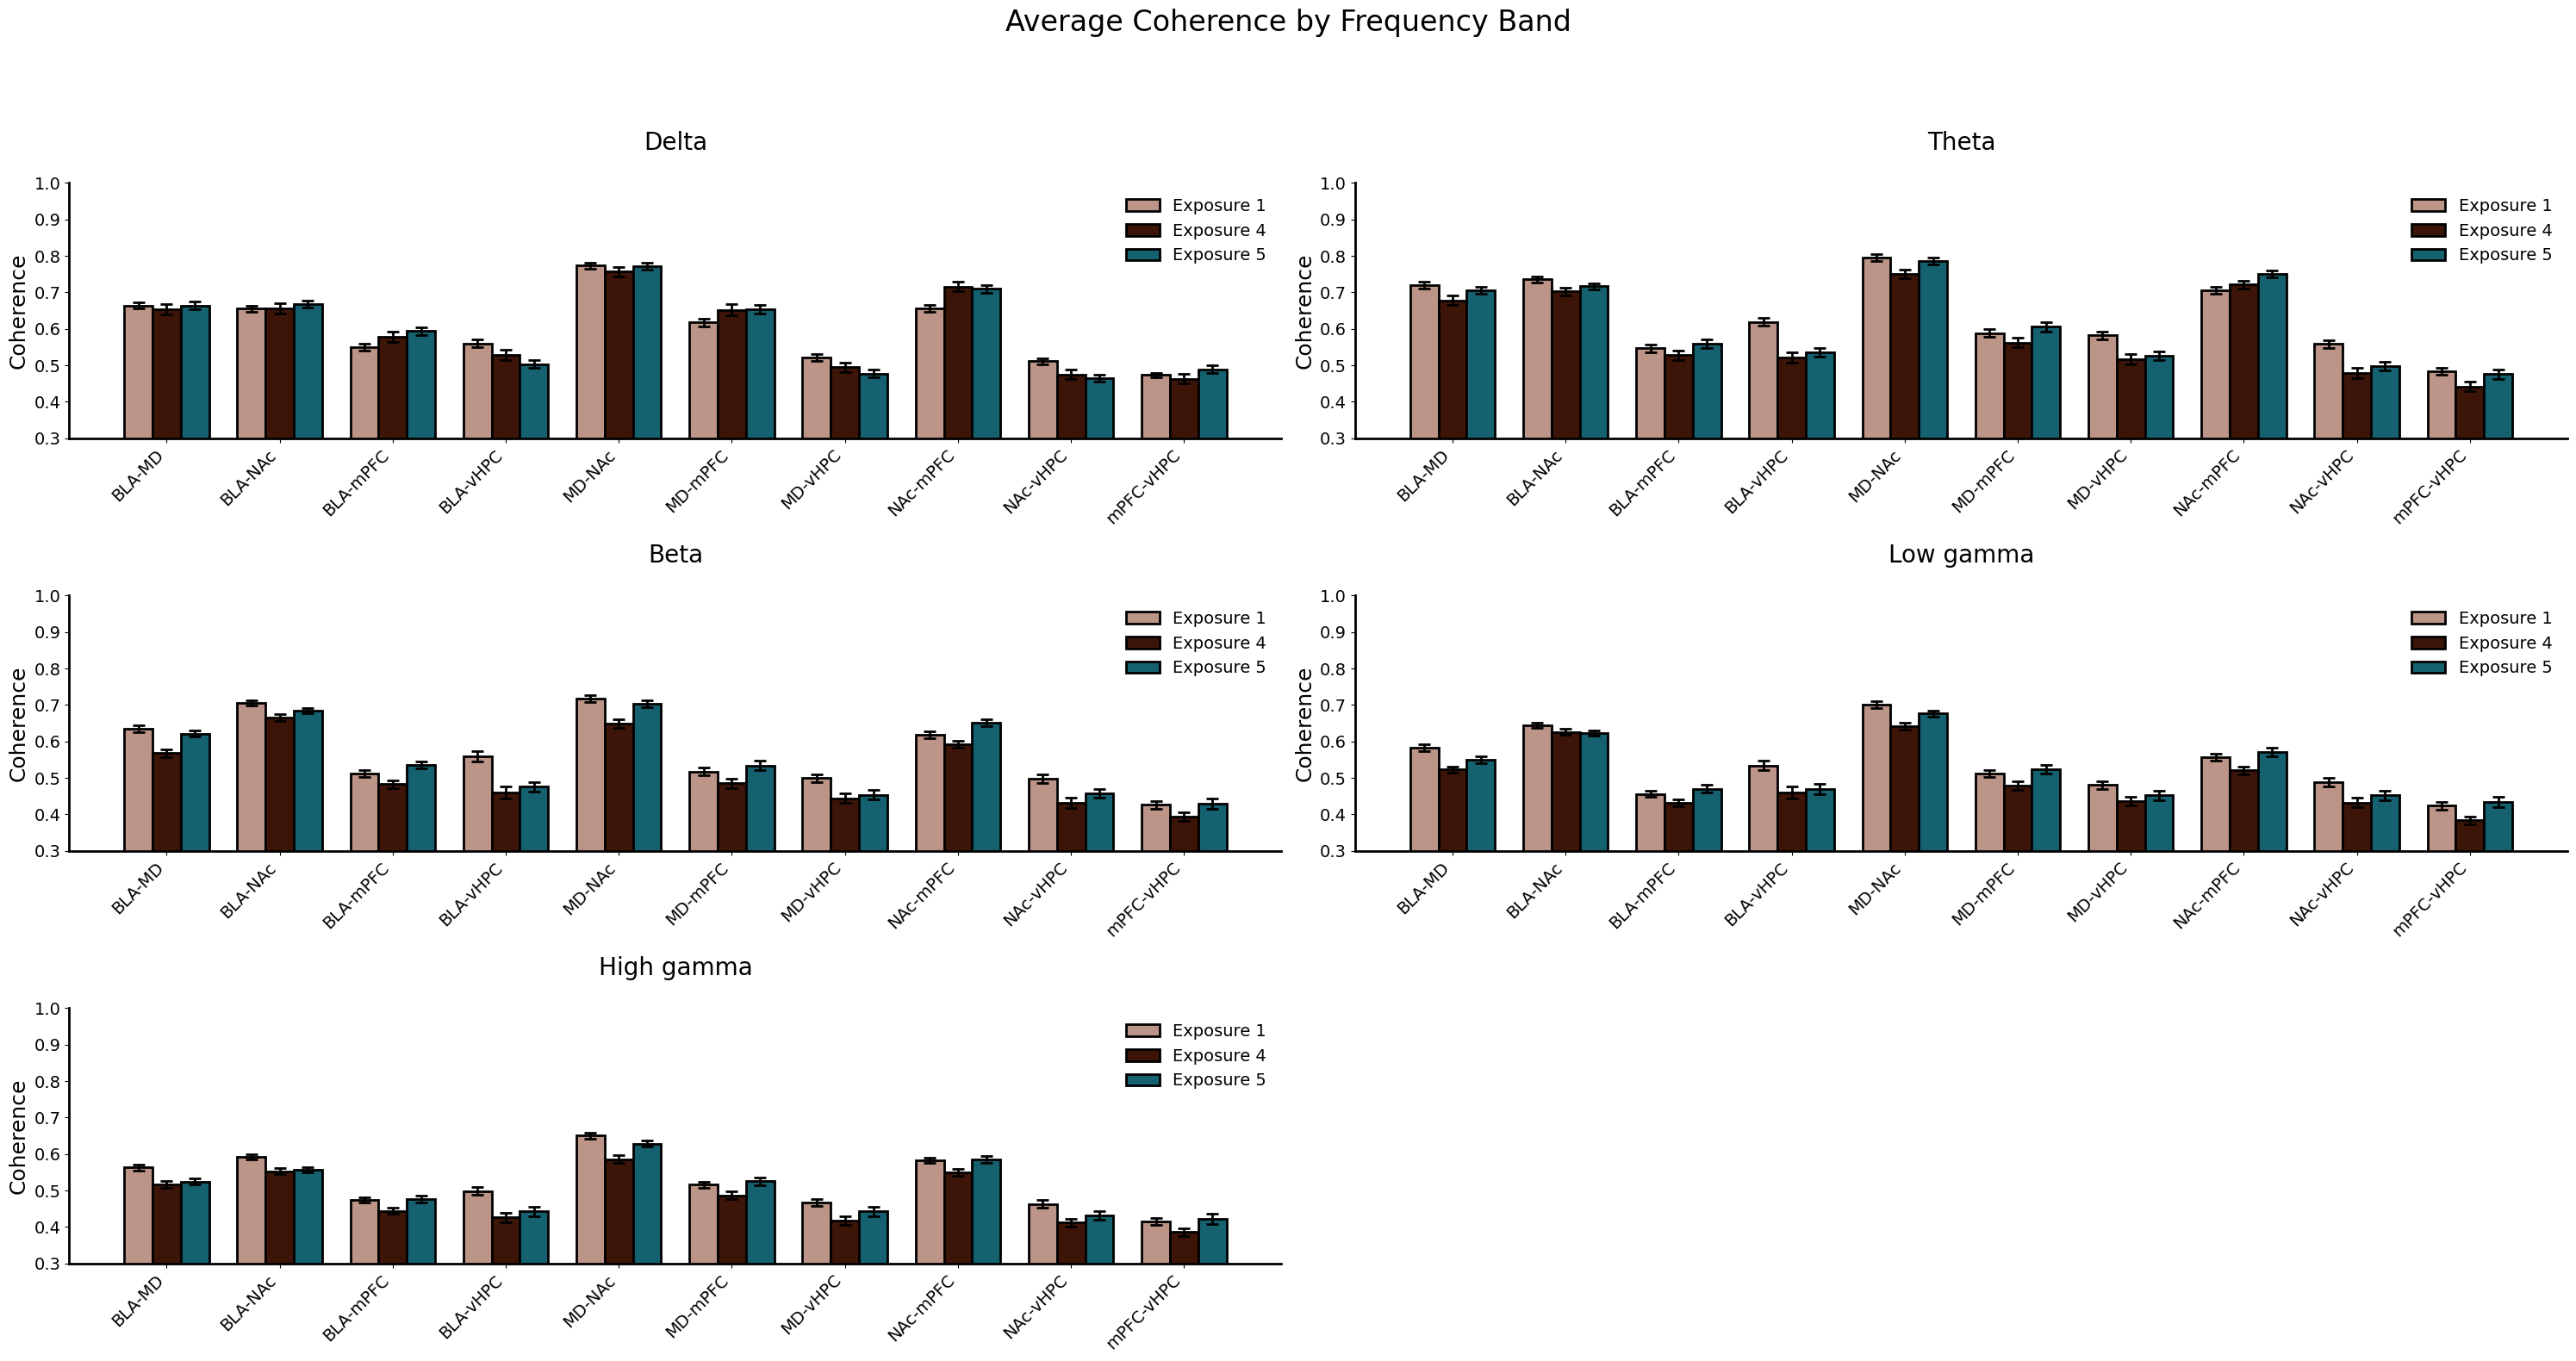

In [159]:
novel_coherence_1 = lfpa.average_events(novel_collection, events = ['exp1'], mode = 'coherence', plot = False)
novel_coherence_4 = lfpa.average_events(novel_collection, events = ['exp4'], mode = 'coherence', plot = False)
novel_coherence_5 = lfpa.average_events(novel_collection, events = ['exp5'], mode = 'coherence', plot = False)
plot_coherence_bar({'Exposure 1':novel_coherence_1, 'Exposure 4':novel_coherence_4, 'Exposure 5':novel_coherence_5}, novel_collection, colors = ['#bc9488','#3c1508', '#15616F'], bar_width=0.25)